- 輸出檔案
    - o3_hourly_matrices_rounded.h5
    - so2_hourly_matrices_rounded.h5
    - o3_8hr_hourly_matrices_rounded.h5
    - no2_hourly_matrices_rounded.h5
    - co_8hr_hourly_matrices_rounded.h5
    - pm2.5_avg_hourly_matrices_rounded.h5
    - pm10_avg_hourly_matrices_rounded.h5
 
# 定義文件路徑
file_paths = {
    'o3': 'o3_hourly_matrices_rounded.h5',
    'so2': 'so2_hourly_matrices_rounded.h5',
    'o3_8hr': 'o3_8hr_hourly_matrices_rounded.h5',
    'no2': 'no2_hourly_matrices_rounded.h5',
    'co_8hr': 'co_8hr_hourly_matrices_rounded.h5',
    'pm2.5_avg': 'pm2.5_avg_hourly_matrices_rounded.h5',
    'pm10_avg': 'pm10_avg_hourly_matrices_rounded.h5'
}


In [1]:
import pandas as pd
import h5py
import numpy as np

# 定義文件路徑
file_paths = {
    'o3': 'o3_hourly_matrices_rounded.h5',
    'so2': 'so2_hourly_matrices_rounded.h5',
    'o3_8hr': 'o3_8hr_hourly_matrices_rounded.h5',
    'no2': 'no2_hourly_matrices_rounded.h5',
    'co_8hr': 'co_8hr_hourly_matrices_rounded.h5',
    'pm2.5_avg': 'pm2.5_avg_hourly_matrices_rounded.h5',
    'pm10_avg': 'pm10_avg_hourly_matrices_rounded.h5'
}


# 定義載入數據的函數
def load_data(file_paths):
    data_dict = {key: [] for key in file_paths.keys()}
    timestamps = []

    for key, file_path in file_paths.items():
        with h5py.File(file_path, 'r') as f:
            for dataset_name in f.keys():
                timestamp = pd.to_datetime(dataset_name)
                data_dict[key].append((timestamp, f[dataset_name][:]))
                if timestamp not in timestamps:
                    timestamps.append(timestamp)
    
    # 確保每個時間點的矩陣數據都存在
    for key in data_dict.keys():
        data_dict[key] = sorted(data_dict[key], key=lambda x: x[0])

    return data_dict, sorted(timestamps)

# 載入數據
data_dict, timestamps = load_data(file_paths)

# 顯示數據結構
for key, data in data_dict.items():
    print(f"Key: {key}")
    for timestamp, matrix in data[:3]:  # 顯示前3個時間點的數據
        print(f"Timestamp: {timestamp}")
        print(matrix)
    print("\n")

# 定義函數來創建輸入和輸出數據集
def create_dataset(data_dict, timestamps, input_hours=4, output_hours=1):
    X, y = [], []
    
    for i in range(len(timestamps) - input_hours - output_hours + 1):
        input_data = []
        output_data = []
        
        for j in range(input_hours):
            hour_data = []
            for key in data_dict.keys():
                hour_data.append(data_dict[key][i + j][1])
            input_data.append(hour_data)
        
        for k in range(output_hours):
            hour_data = []
            for key in data_dict.keys():
                hour_data.append(data_dict[key][i + input_hours + k][1])
            output_data.append(hour_data)
        
        X.append(input_data)
        y.append(output_data)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# 創建數據集
X, y = create_dataset(data_dict, timestamps)

# 顯示數據形狀
print("X shape:", X.shape)
print("y shape:", y.shape)

# 調整數據形狀
# X 的形狀: (17516, 4, 7, 5, 5) => (17516, 4, 5, 5, 7)
# y 的形狀: (17516, 1, 7, 5, 5) => (17516, 1, 5, 5, 7)

X = np.transpose(X, (0, 1, 3, 4, 2))
y = np.transpose(y, (0, 1, 3, 4, 2))

print("Transposed X shape:", X.shape)
print("Transposed y shape:", y.shape)


Key: o3
Timestamp: 2022-01-01 00:00:00
[[20. 15. 20. 24. 12.]
 [23. 11.  7. 15. 13.]
 [16. 20. 25. 25. 25.]
 [36. 34. 21.  8.  8.]
 [36. 34. 21.  9.  9.]]
Timestamp: 2022-01-01 01:00:00
[[14.  8. 15. 21.  8.]
 [21.  9.  6. 12. 13.]
 [11. 15. 19. 18. 18.]
 [32. 28. 18.  8.  8.]
 [32. 28. 18.  9.  9.]]
Timestamp: 2022-01-01 02:00:00
[[16.  8.  6. 20.  5.]
 [15.  6.  6.  7. 12.]
 [ 9. 17. 21. 16. 16.]
 [29. 24. 13.  2.  2.]
 [29. 24. 13.  3.  3.]]


Key: so2
Timestamp: 2022-01-01 00:00:00
[[3. 6. 5. 5. 6.]
 [5. 4. 6. 7. 3.]
 [3. 5. 3. 5. 5.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 1. 1.]]
Timestamp: 2022-01-01 01:00:00
[[4. 6. 4. 4. 5.]
 [5. 3. 5. 6. 4.]
 [4. 5. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 2. 2.]]
Timestamp: 2022-01-01 02:00:00
[[ 5.   6.   3.   3.   3. ]
 [ 7.   6.   5.   5.   3. ]
 [ 5.   4.   2.   3.   3. ]
 [ 3.   3.   3.5  4.   4. ]
 [ 3.   3.   3.5 10.  10. ]]


Key: o3_8hr
Timestamp: 2022-01-01 00:00:00
[[21.  18.  21.  26.  19. ]
 [24.  17.  17.  17.  25. ]
 [20.  22.  23.  24.  2

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

def build_cnn_lstm_model(input_shape):
    model = Sequential()
    
    # TimeDistributed CNN layers
    model.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Flatten()))
    
    # LSTM layers
    model.add(LSTM(units=100, activation='relu', return_sequences=True))
    model.add(BatchNormalization())
    model.add(LSTM(units=100, activation='relu', return_sequences=False))
    model.add(BatchNormalization())
    
    # Fully connected layers
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=5*5*7))  # Output shape must match (1, 5, 5, 7)
    model.add(Reshape((1, 5, 5, 7)))  # Adjust the shape

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

input_shape = (4, 5, 5, 7)  # timesteps=4, rows=5, cols=5, channels=7 (pollutants)
model = build_cnn_lstm_model(input_shape)
model.summary()


/opt/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-06-16 00:21:57.269261: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-06-16 00:21:57.269277: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-16 00:21:57.269282: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-16 00:21:57.269296: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-16 00:21:57.269309: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 4, 5, 5, 32)    │         2,048 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 4, 2, 2, 32)    │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 4, 2, 2, 64)    │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 4, 1, 1, 64)    │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 4, 64)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 4, 100)         │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 175)            │        44,975 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 5, 5, 7)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,575 (931.93 KB)

 Trainable params: 238,175 (930.37 KB)

 Non-trainable params: 400 (1.56 KB)

Epoch 1/50


2024-06-16 00:21:58.467261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - loss: 392.1699 - val_loss: 301.3411
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - loss: 213.2732 - val_loss: 259.9085
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - loss: 222.2321 - val_loss: 307.3801
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - loss: 217.5045 - val_loss: 330.4365
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - loss: 228.6405 - val_loss: 477.6874
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - loss: 227.8423 - val_loss: 571.6876
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - loss: 235.2876 - val_loss: 1462.3300
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - loss: 236.8945 - val_loss: 361.6958
Epoch 9/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - loss: 238.6389 - val_loss: 440.5578
Epoch 10/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - loss: 239.4022 - val_loss: 400.9030
Epoch 11/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - loss: 240.3367 - val_loss: 311.9

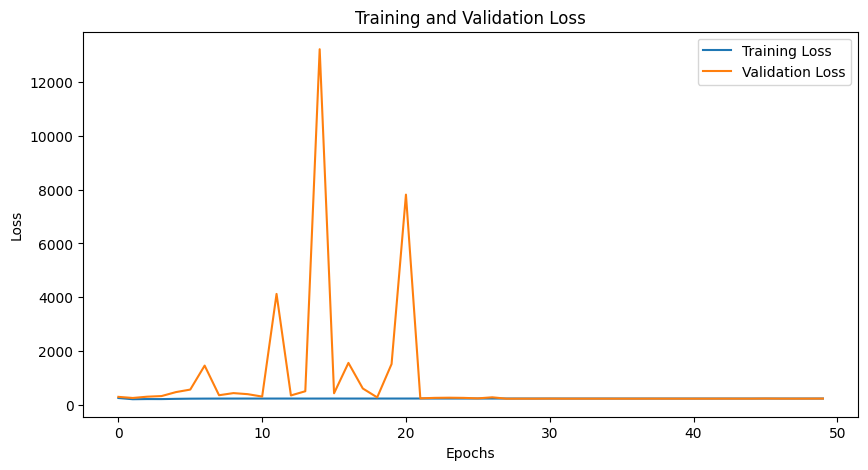

Model saved to saved_models/1_cnn_lstm_model.h5


In [3]:
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

import os
model_dir = 'saved_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
model_path = os.path.join(model_dir, '1_cnn_lstm_model.h5')
model.save(model_path)
print(f"Model saved to {model_path}")


548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
Site 25.0 o3 MSE: 882.3830830942213


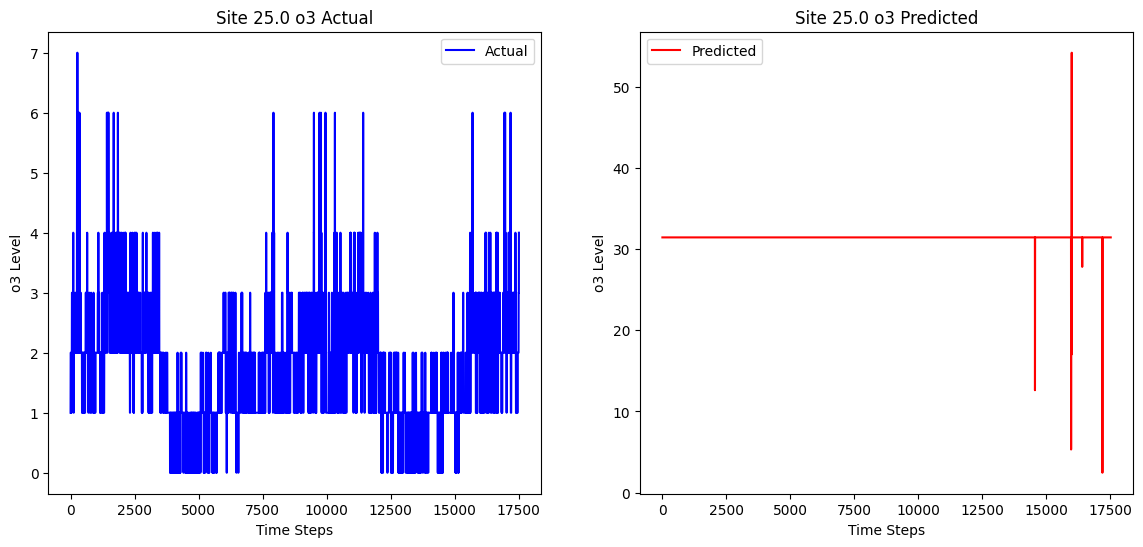

Site 26.0 o3 MSE: 502.7408484182417


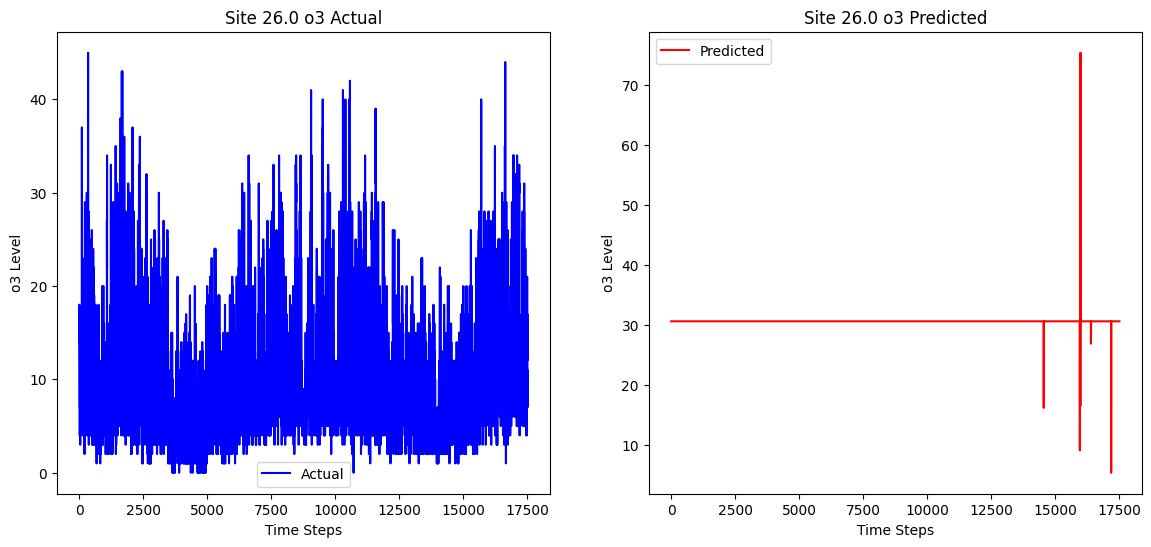

Site 27.0 o3 MSE: 239.89950017030506


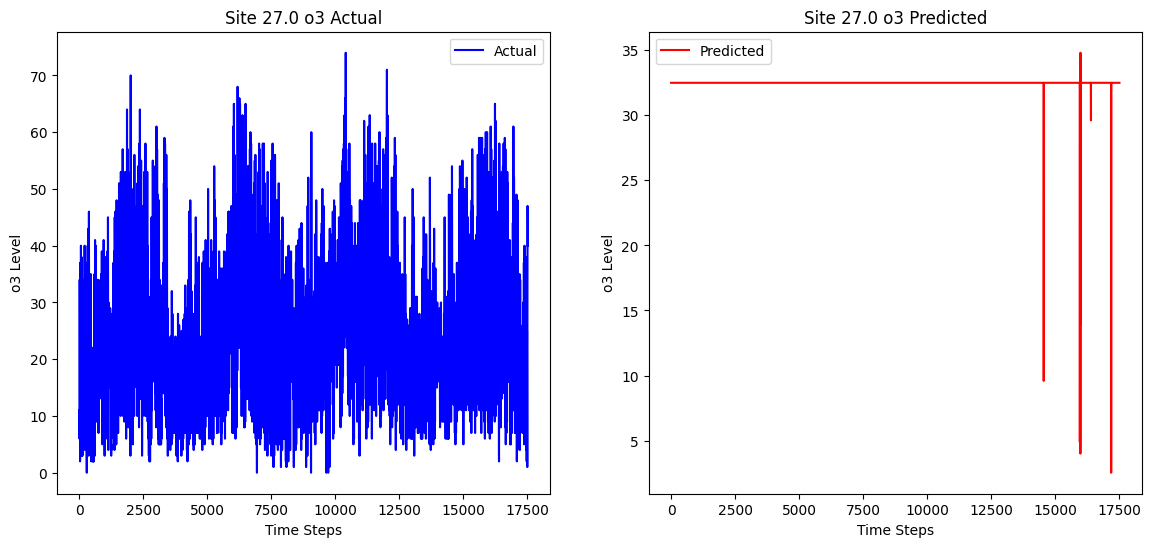

Site 28.0 o3 MSE: 449.6444596164202


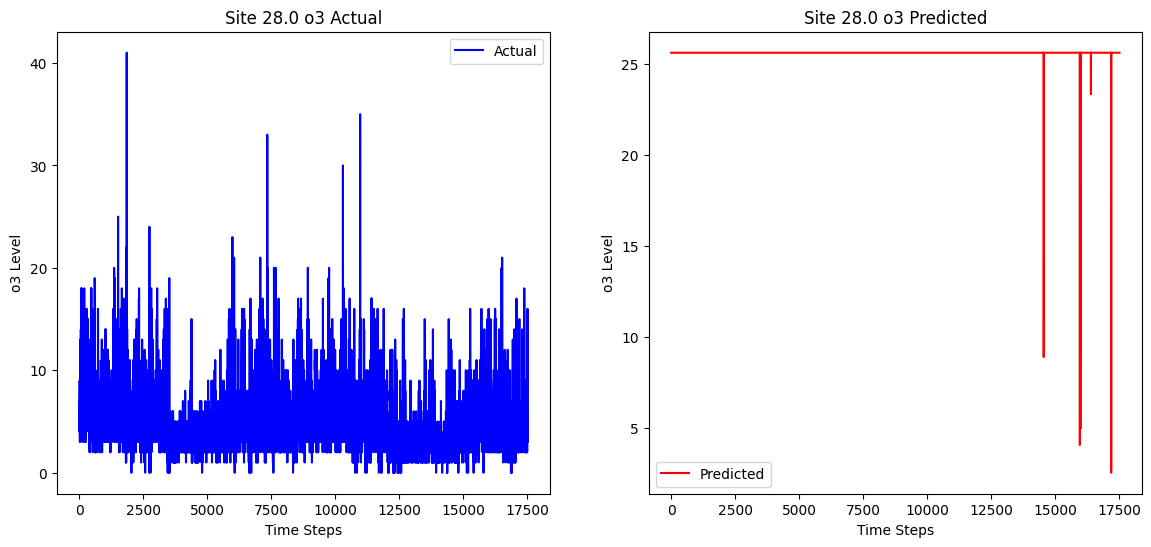

Site 29.0 o3 MSE: 167.2635864772037


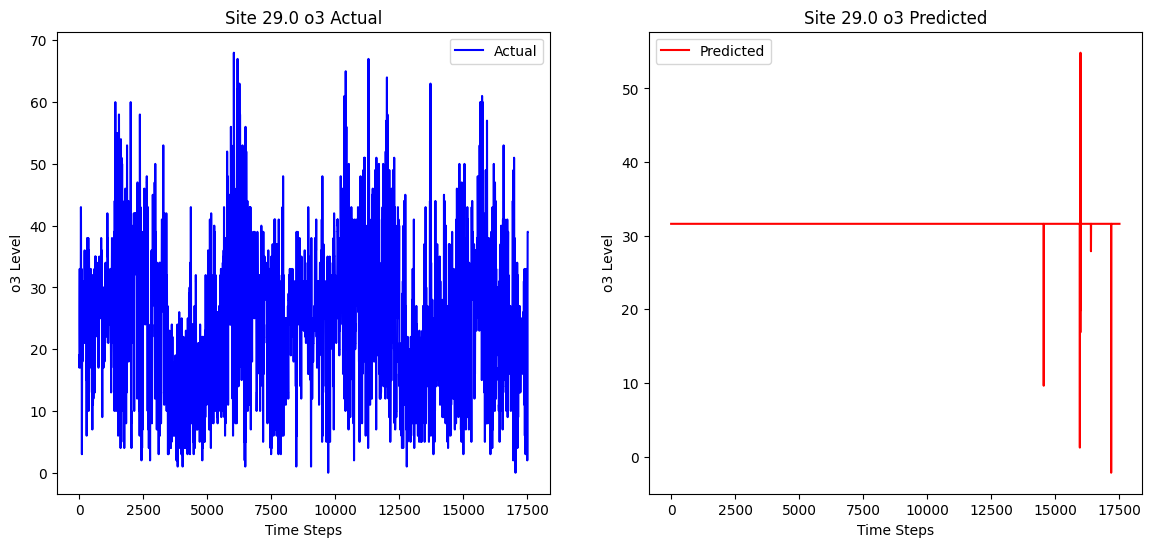

Site 30.0 o3 MSE: 623.240417397355


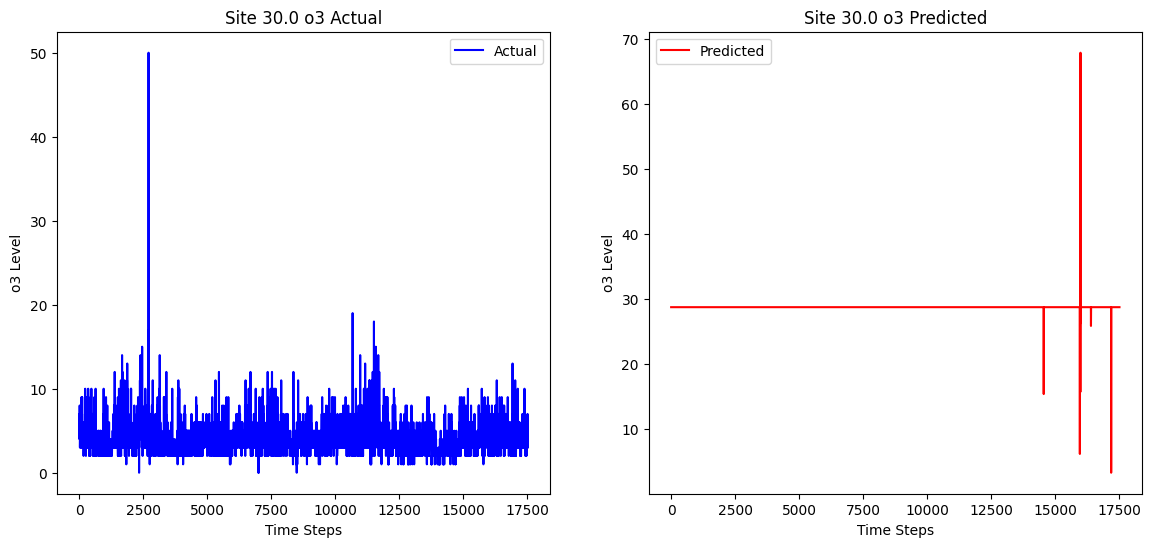

Site 31.0 o3 MSE: 354.27225464903756


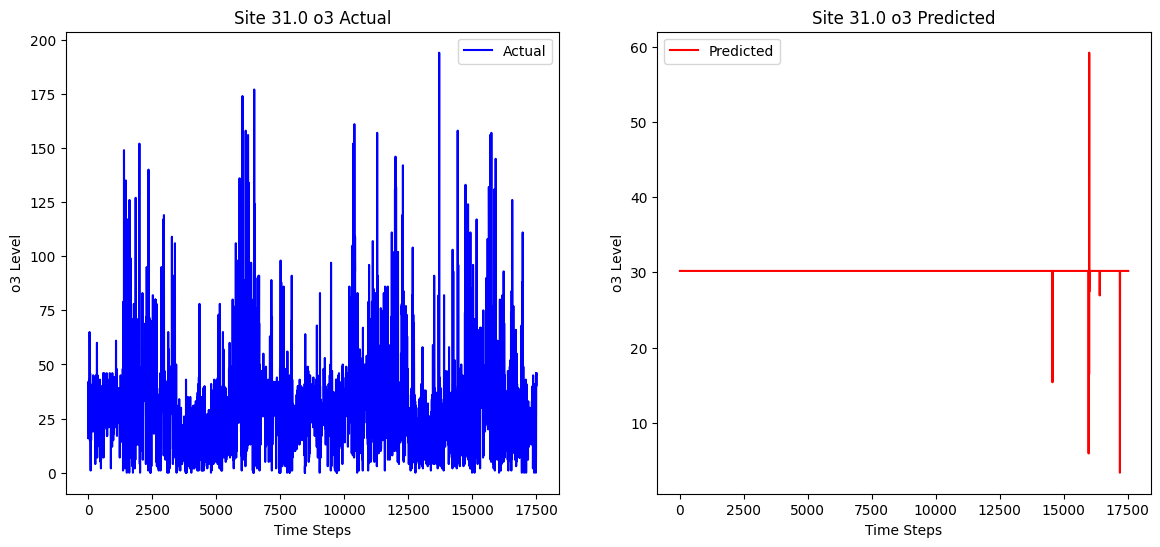

Site 32.0 o3 MSE: 776.5169568171136


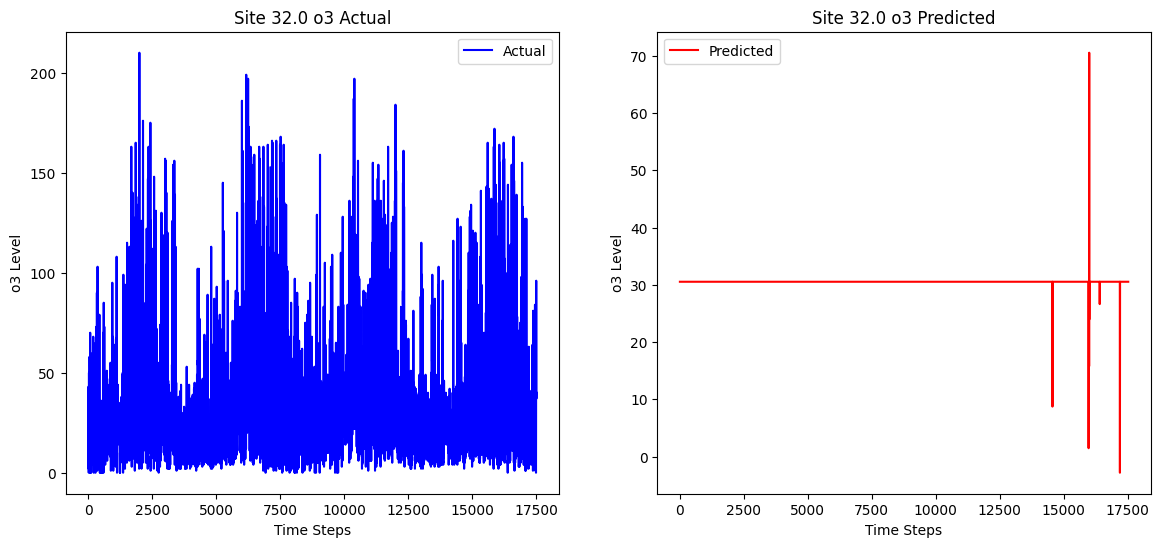

Site 33.0 o3 MSE: 439.3024568381083


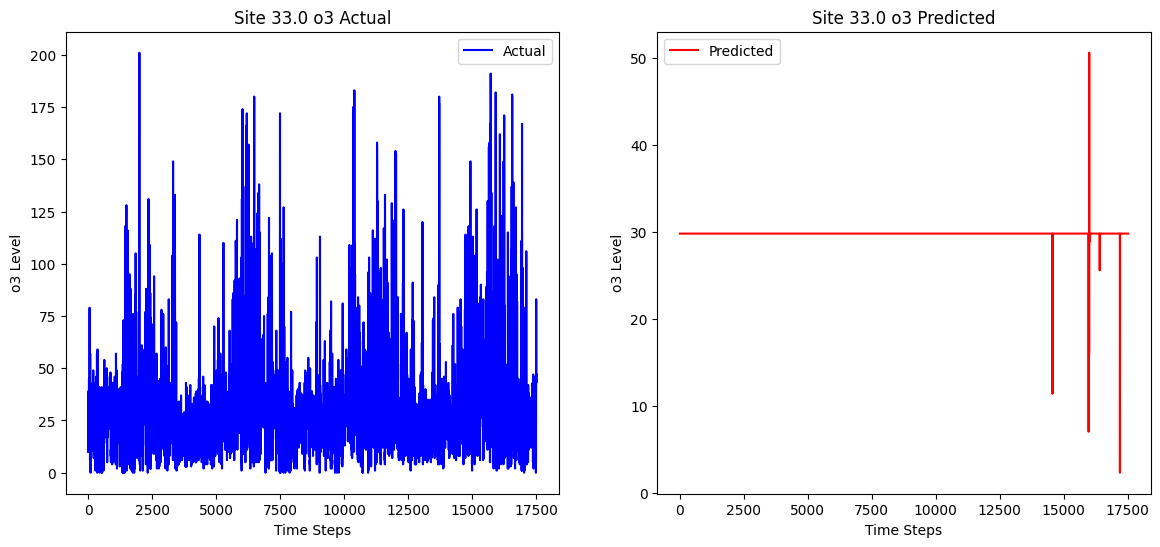

Site 34.0 o3 MSE: 771.4463670698982


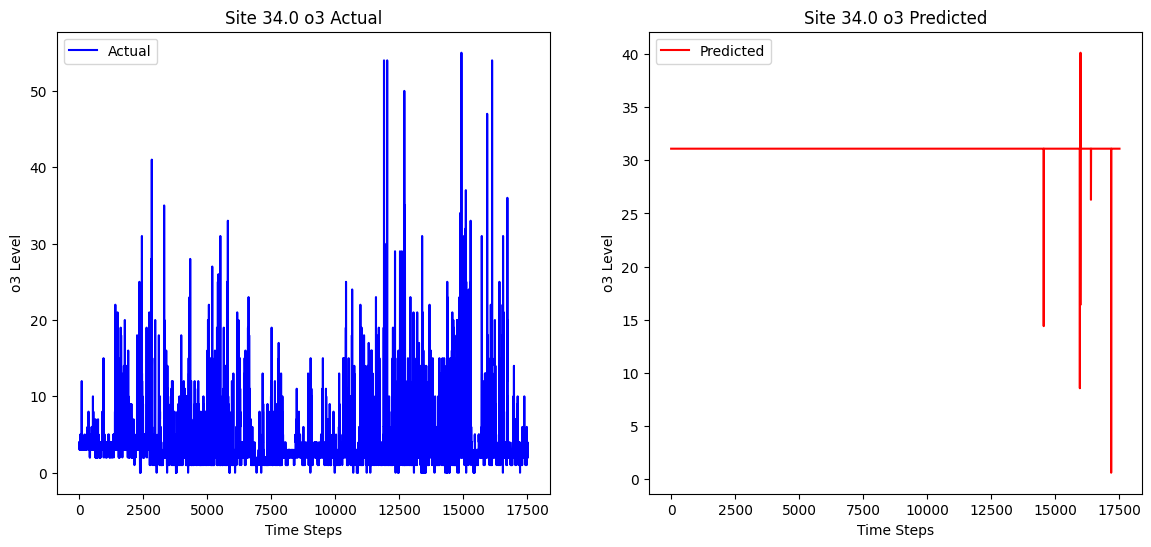

Site 35.0 o3 MSE: 439.8600457183377


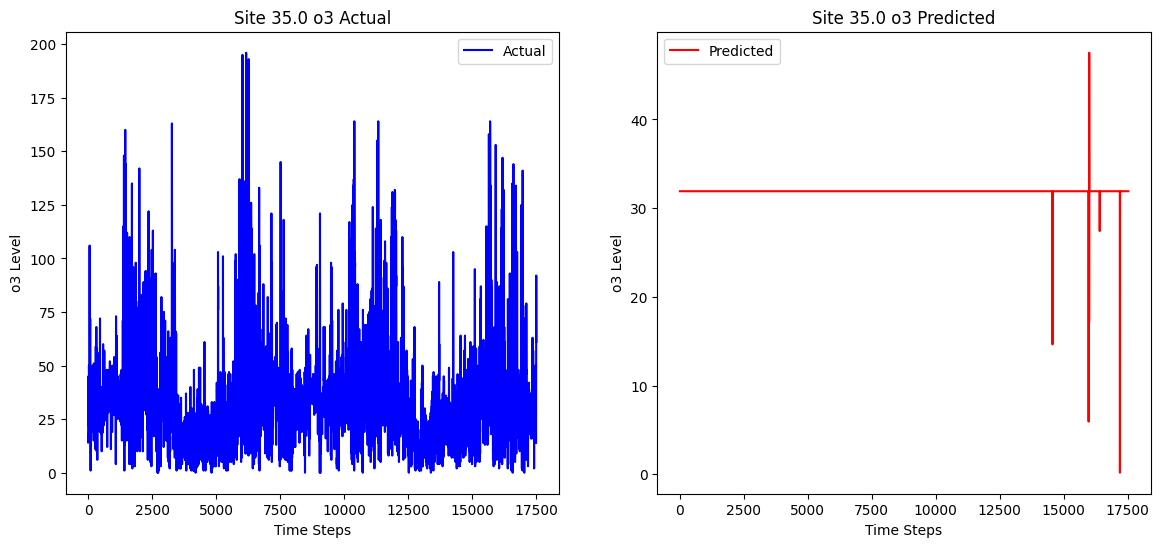

Site 36.0 o3 MSE: 658.0916827998674


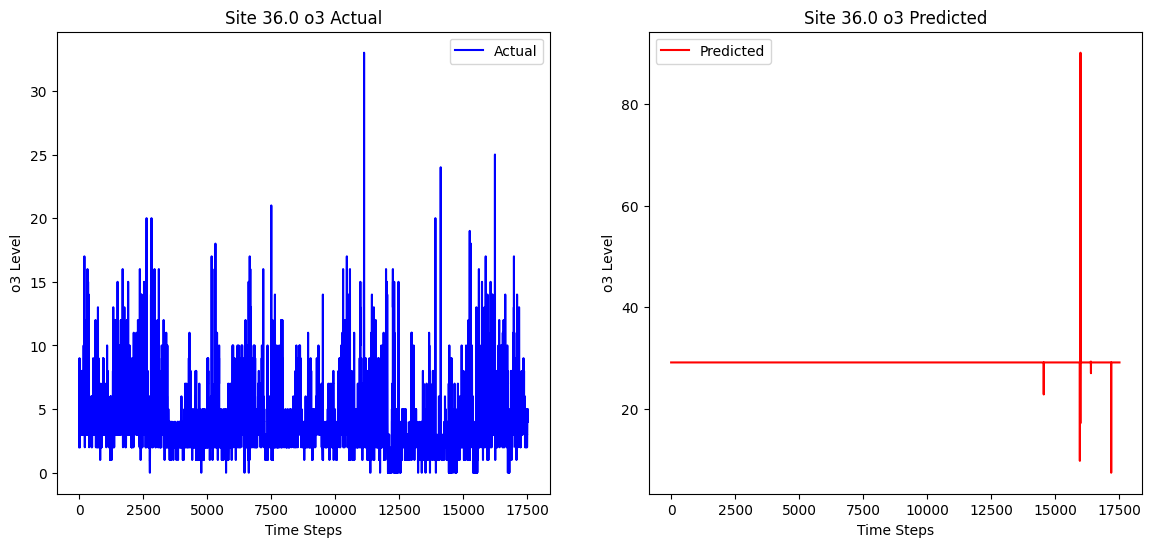

Site 37.0 o3 MSE: 201.72529635780805


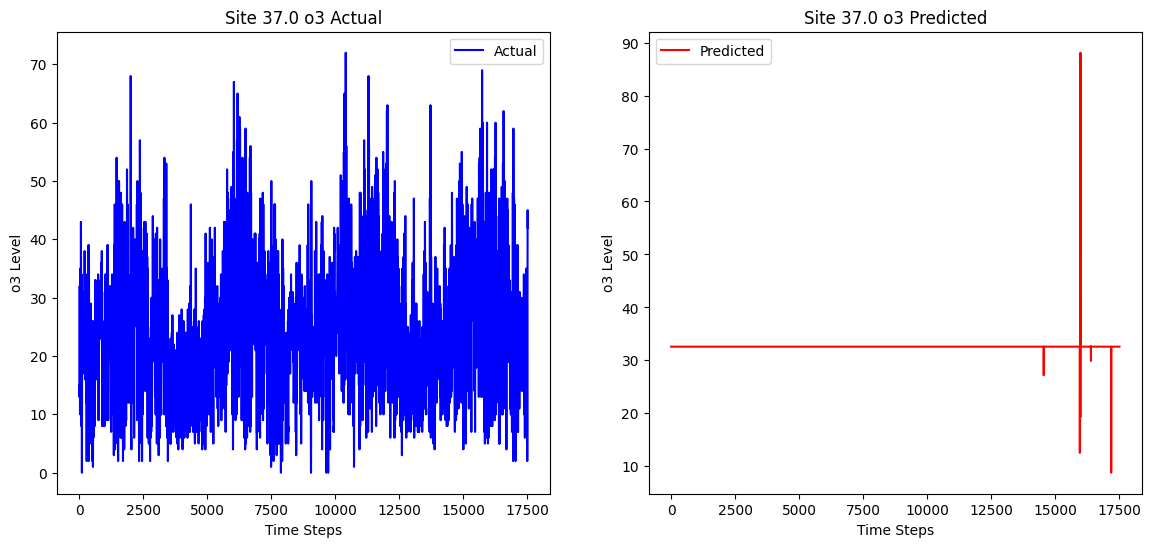

Site 38.0 o3 MSE: 142.13522817457928


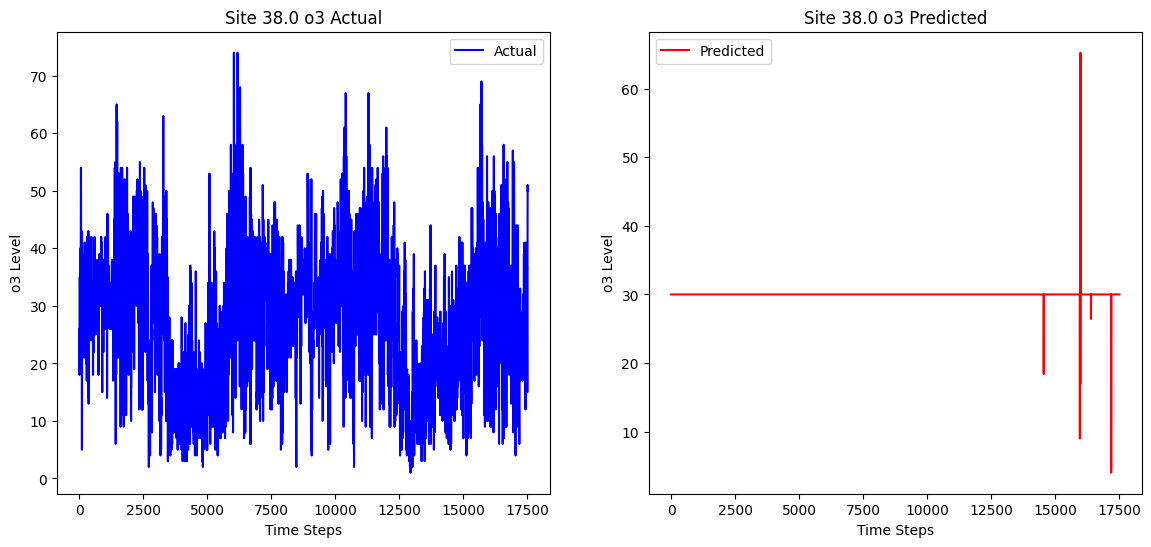

Site 41.0 o3 MSE: 420.2034998871146


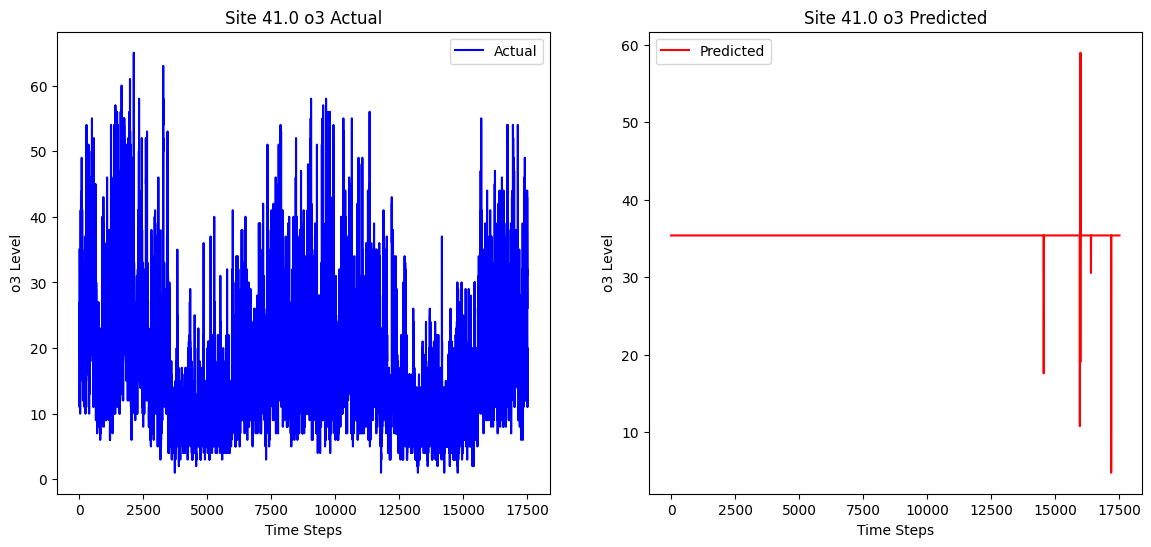

Site 69.0 o3 MSE: 439.6458873073106


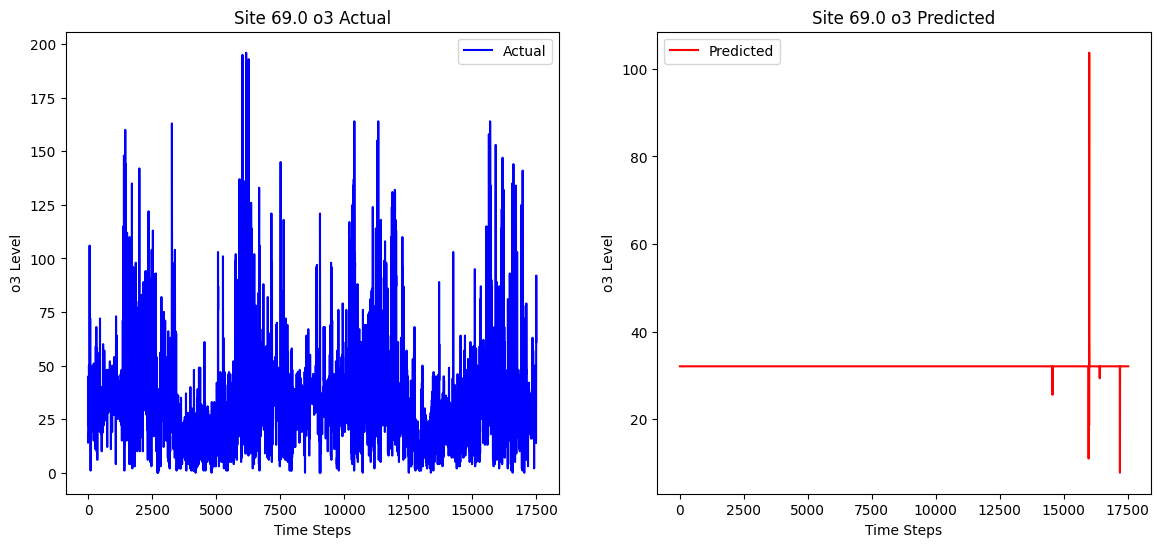

Site 72.0 o3 MSE: 784.2727567414812


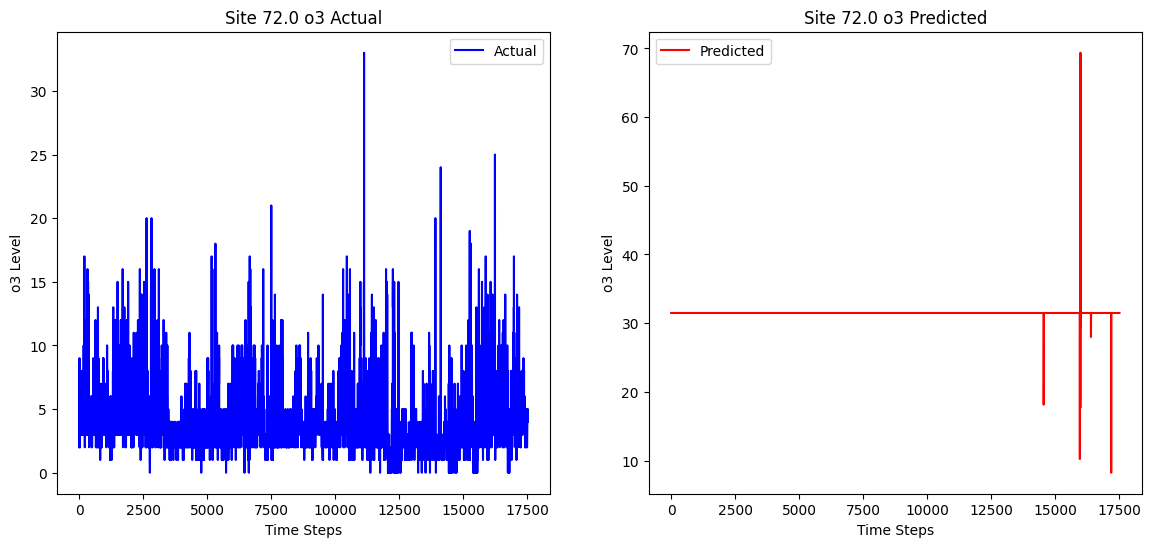

Site 83.0 o3 MSE: 546.8286172586634


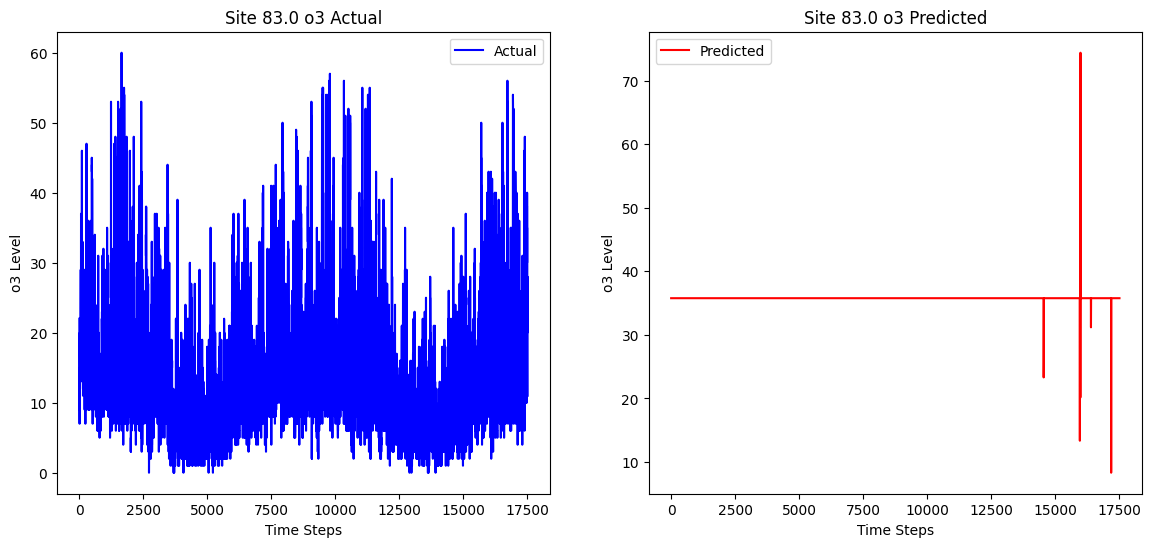

Site 25.0 so2 MSE: 9.95043605793131


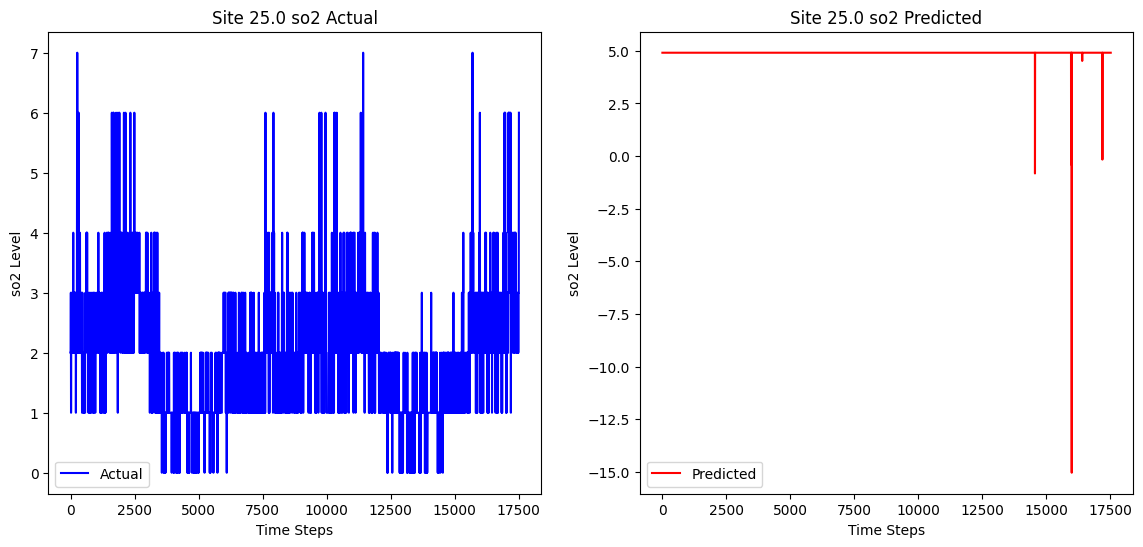

Site 26.0 so2 MSE: 69.48252338323621


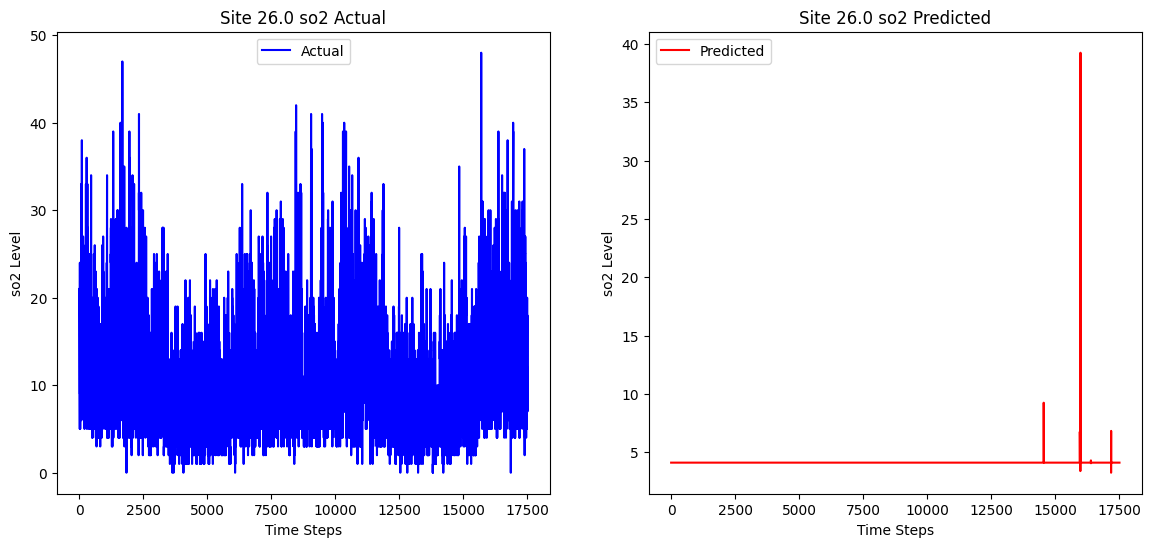

Site 27.0 so2 MSE: 625.8703310764604


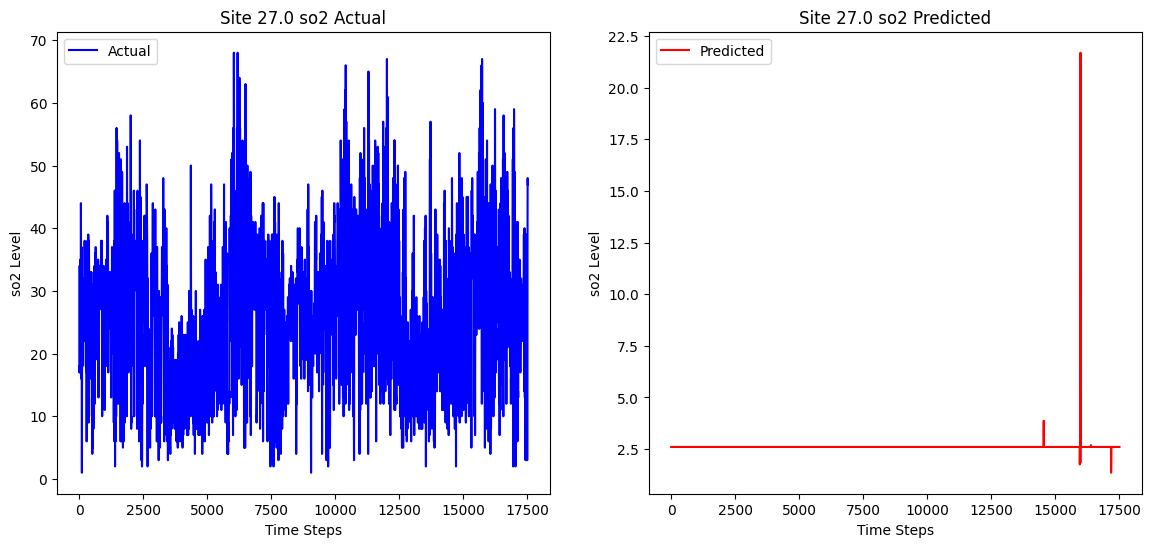

Site 28.0 so2 MSE: 3.989997245276099


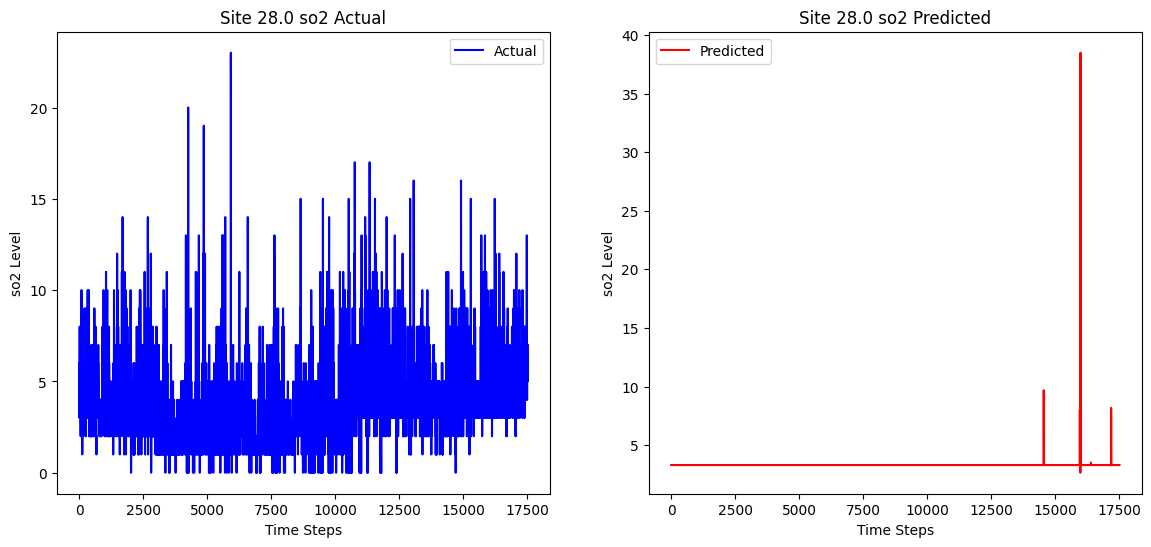

Site 29.0 so2 MSE: 434.11269935915783


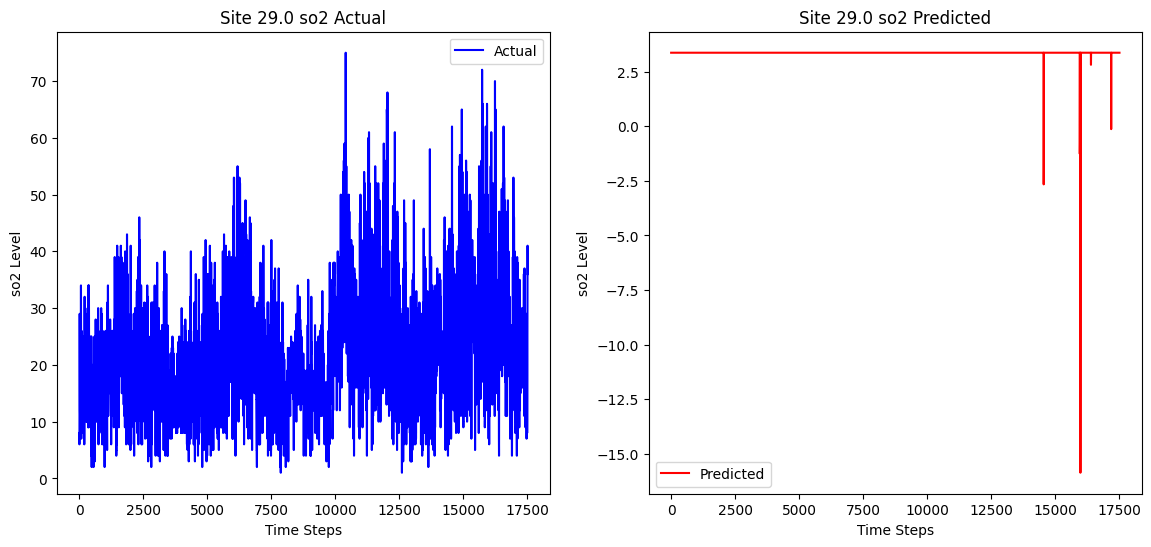

Site 30.0 so2 MSE: 5.960160945817089


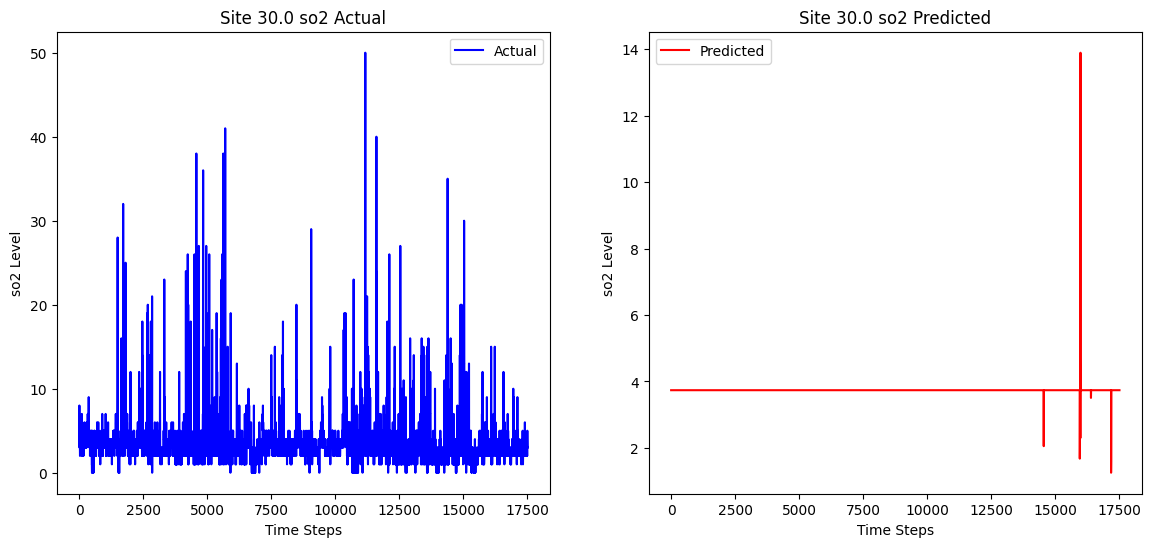

Site 31.0 so2 MSE: 900.9902718025642


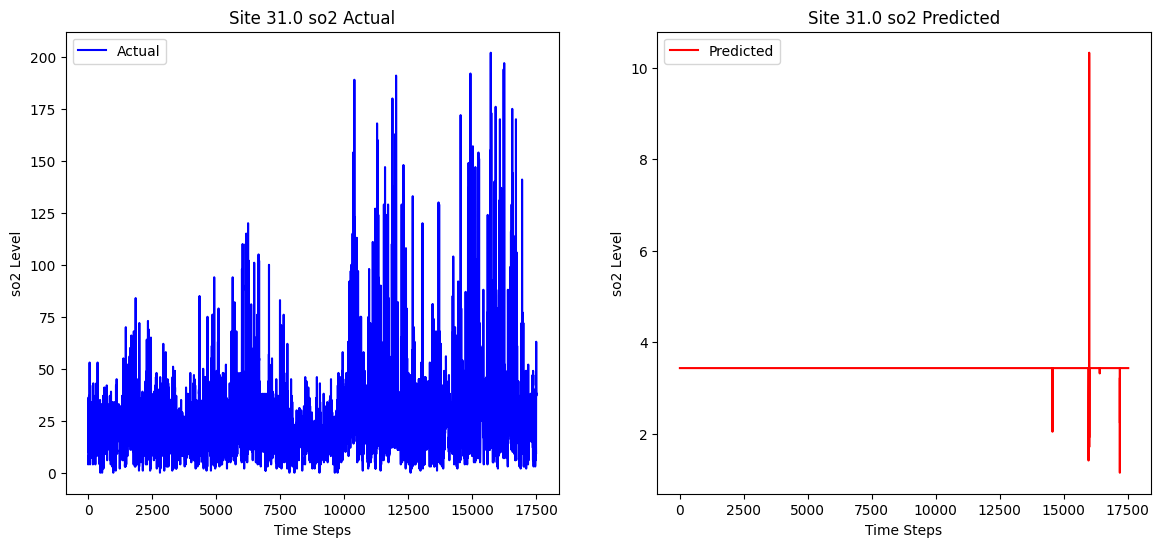

Site 32.0 so2 MSE: 1163.8286980257242


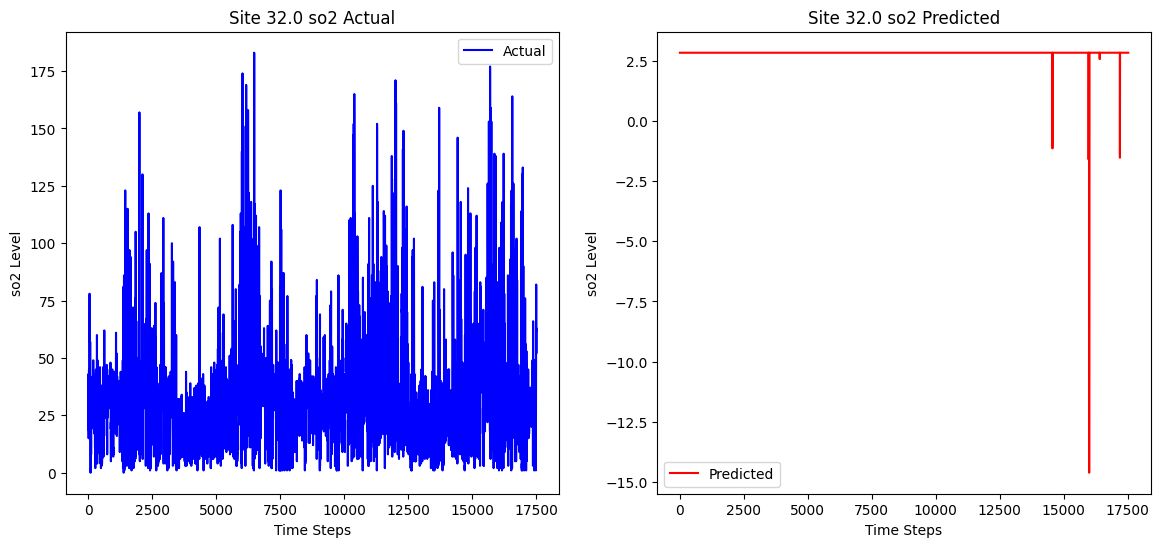

Site 33.0 so2 MSE: 1154.3371900080153


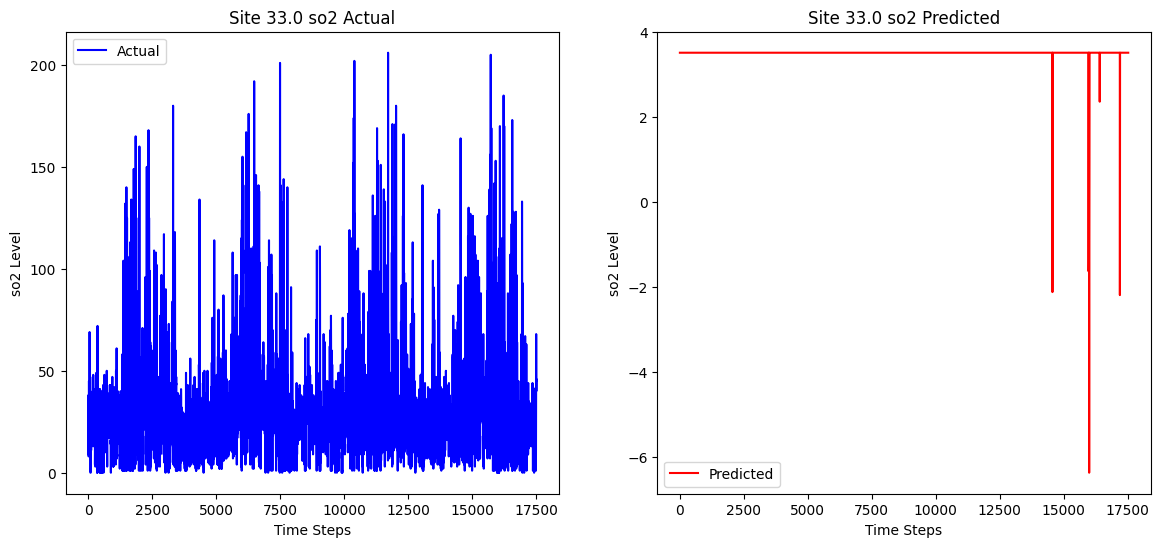

Site 34.0 so2 MSE: 6.4023410561068905


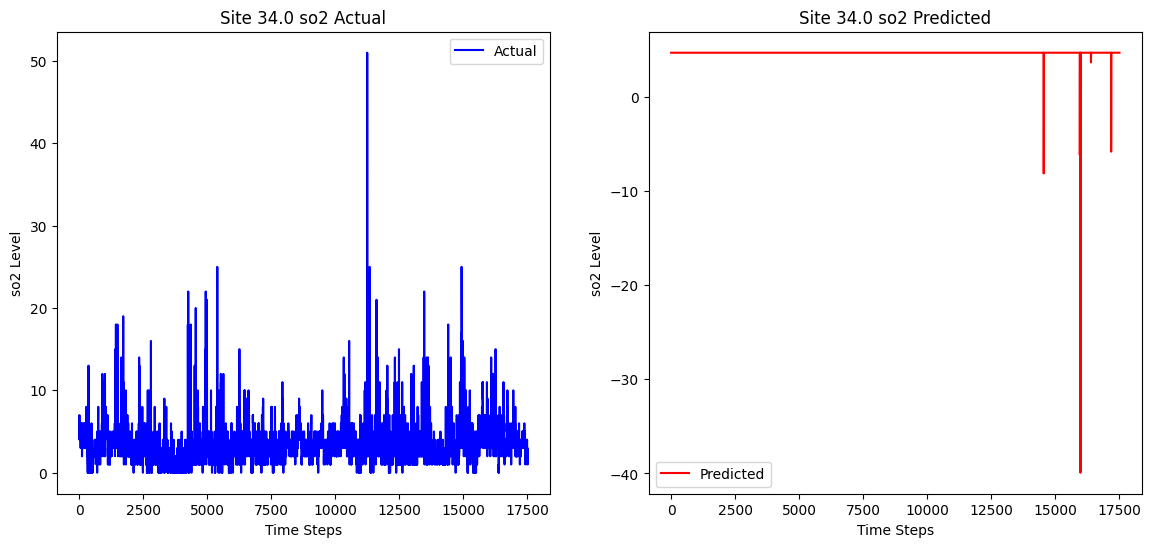

Site 35.0 so2 MSE: 1360.1117498546798


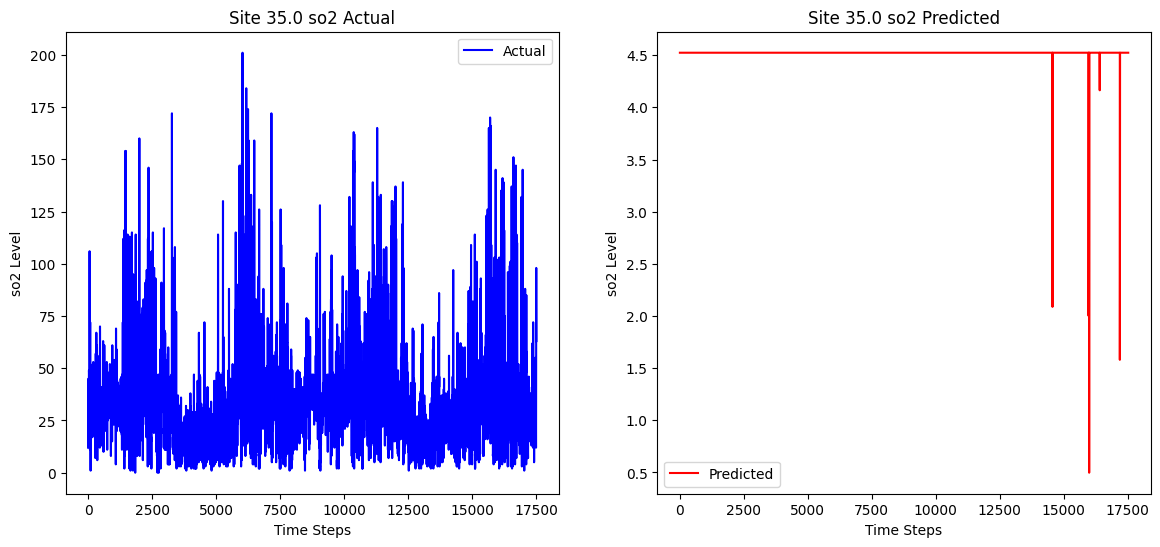

Site 36.0 so2 MSE: 4.7263683396829315


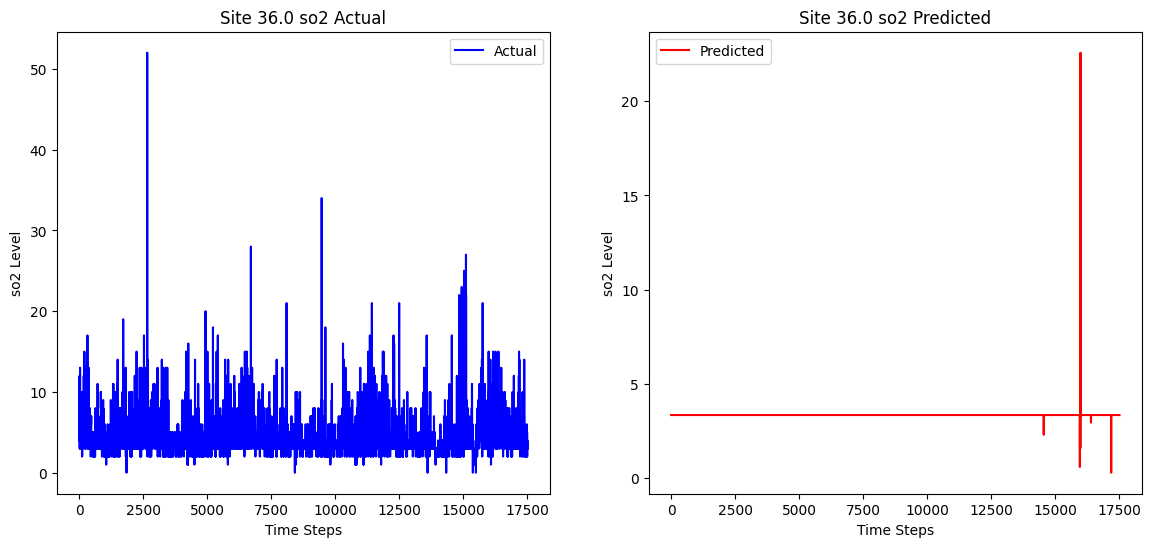

Site 37.0 so2 MSE: 502.2823161352012


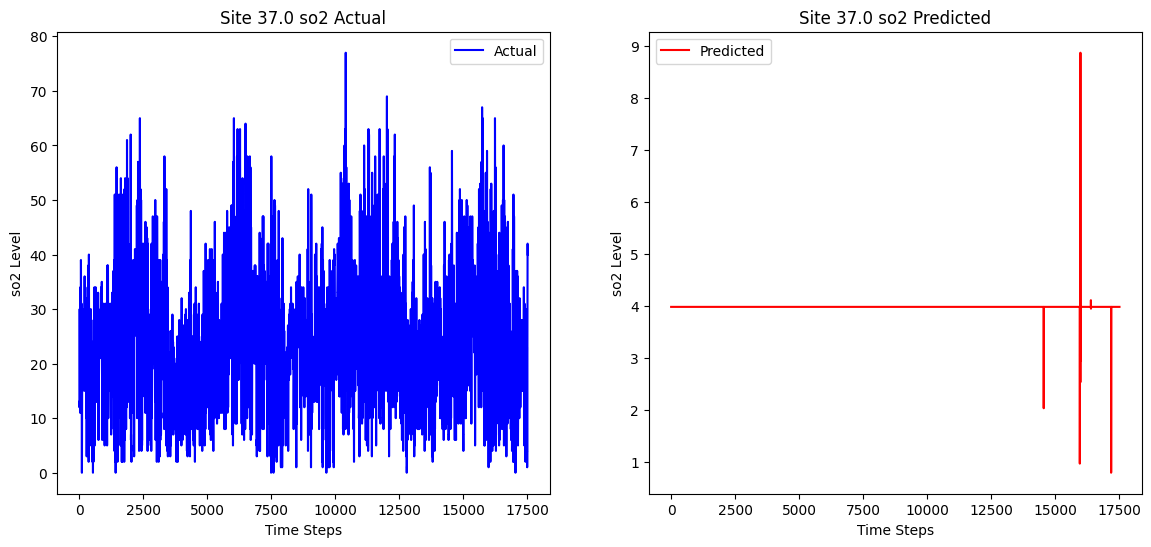

Site 38.0 so2 MSE: 711.7829137516951


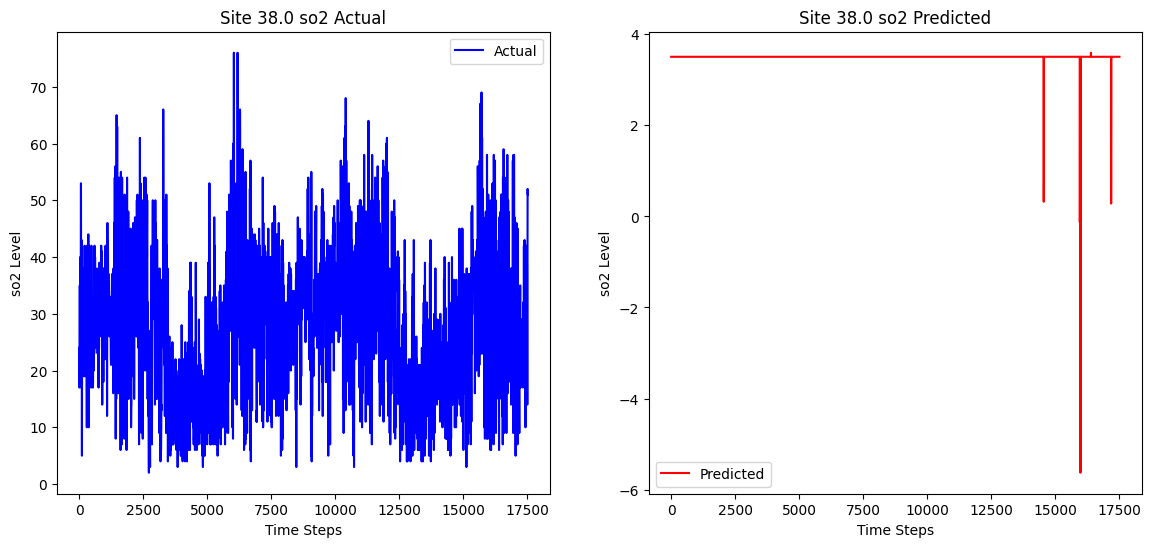

Site 41.0 so2 MSE: 412.1291681923635


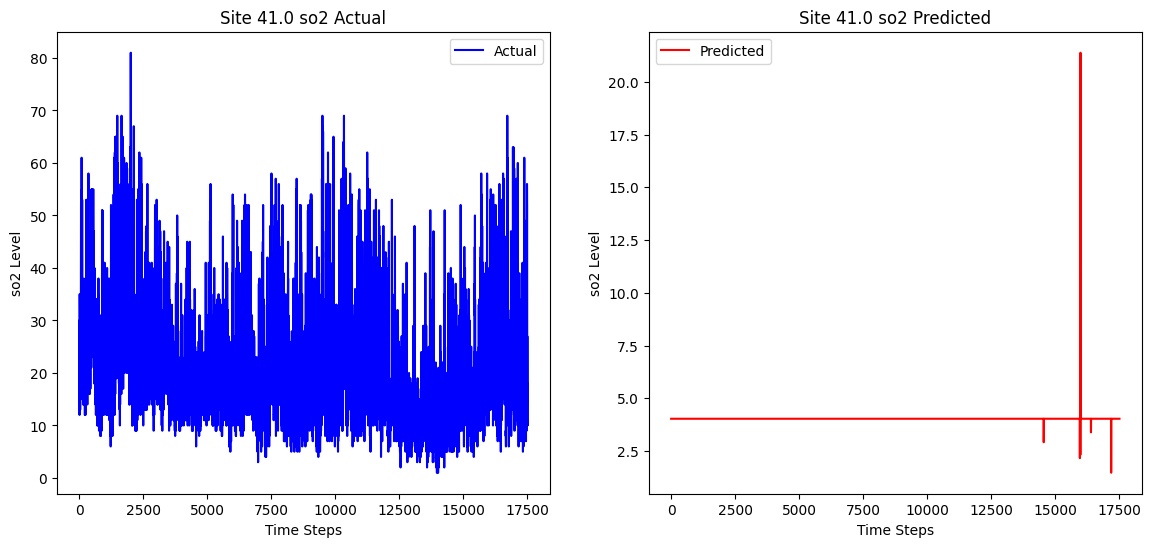

Site 69.0 so2 MSE: 1464.385641762863


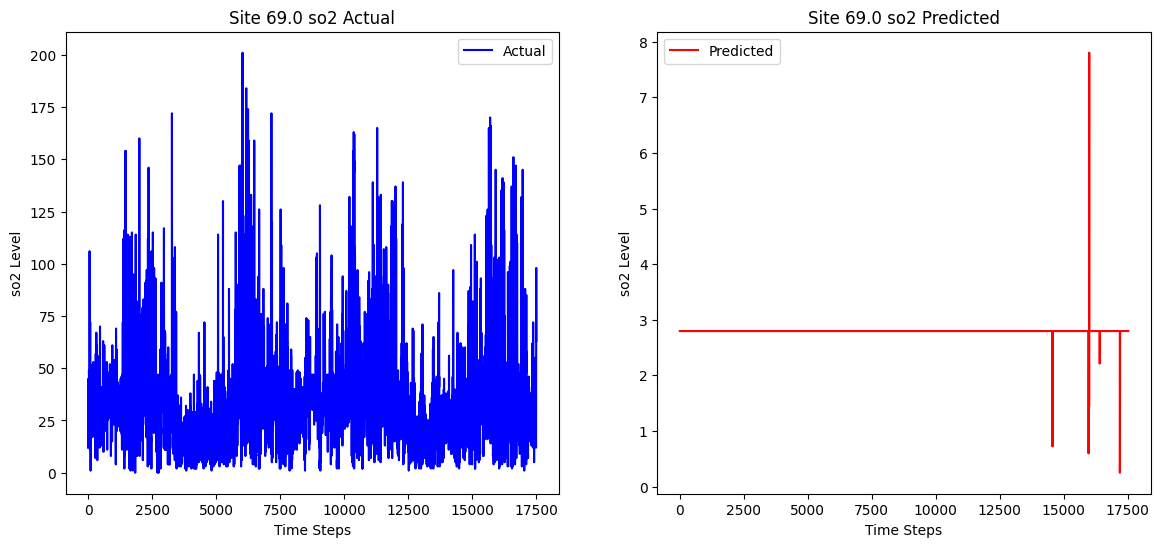

Site 72.0 so2 MSE: 5.657389316347783


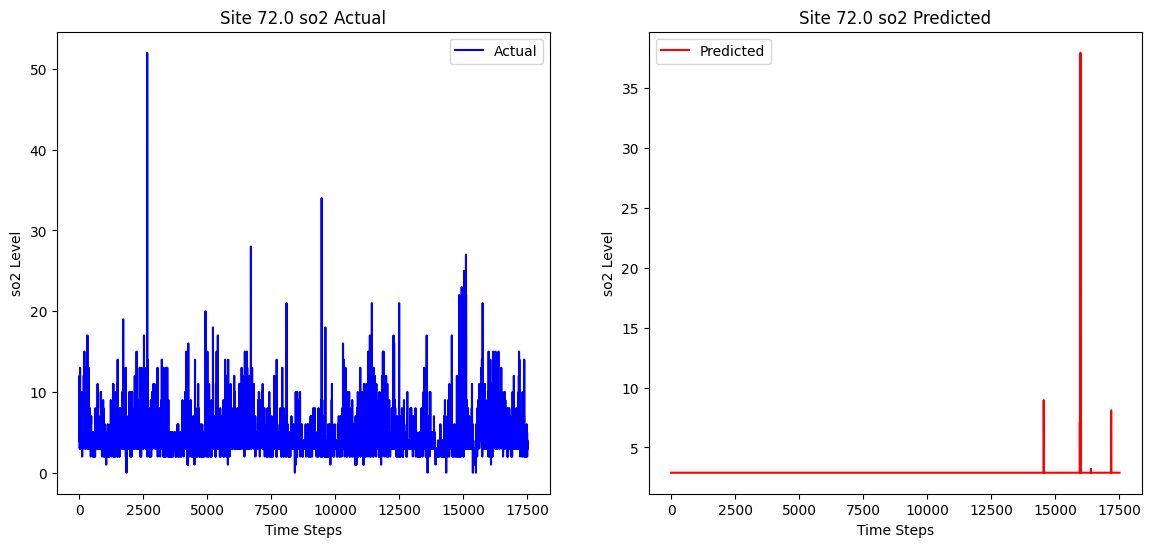

Site 83.0 so2 MSE: 85.82558969155357


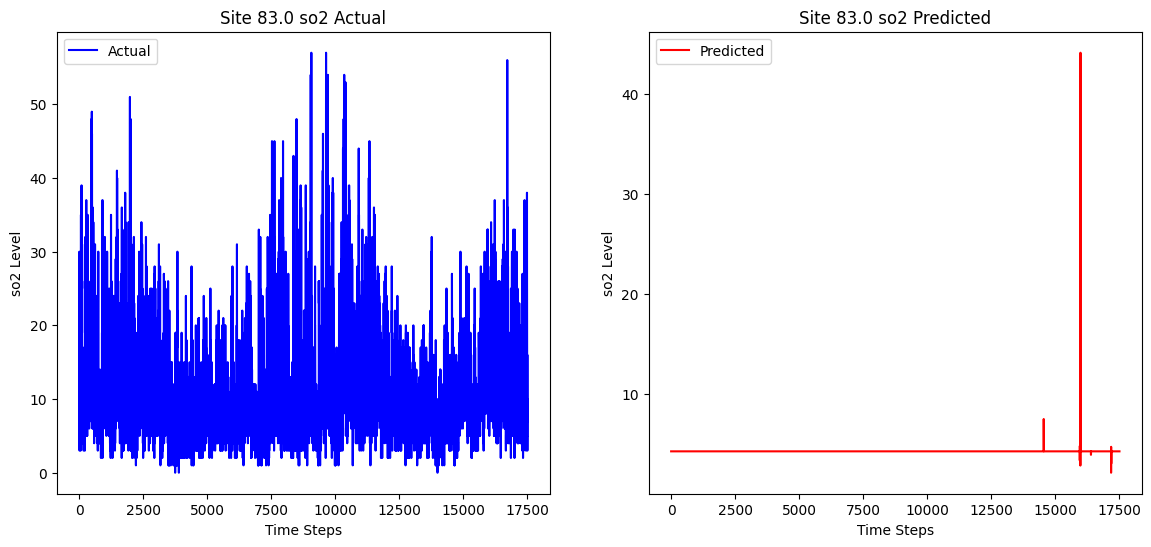

Site 25.0 o3_8hr MSE: 547.8901070886595


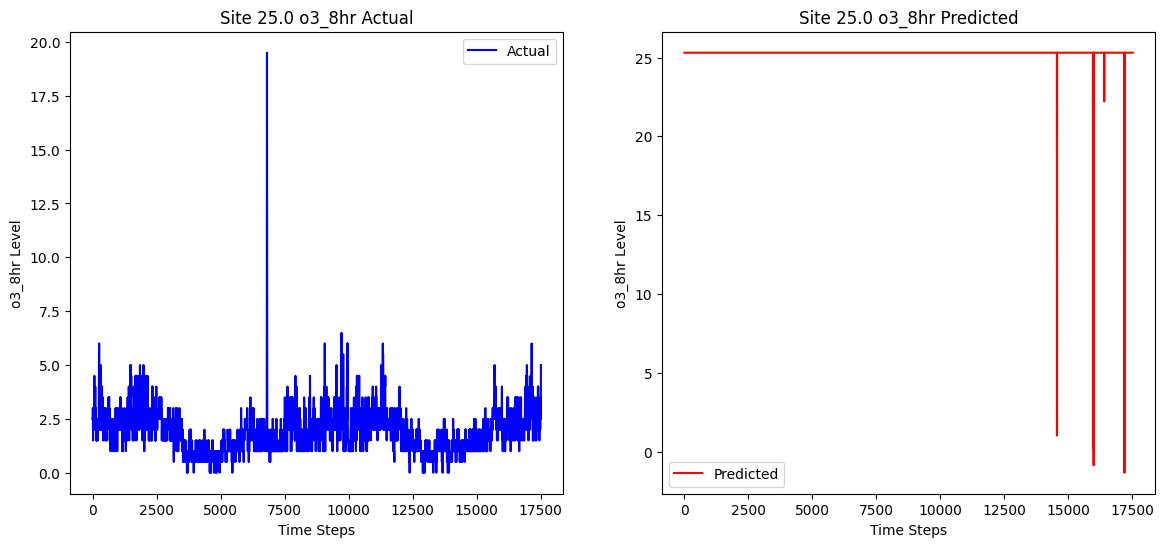

Site 26.0 o3_8hr MSE: 205.3369998732618


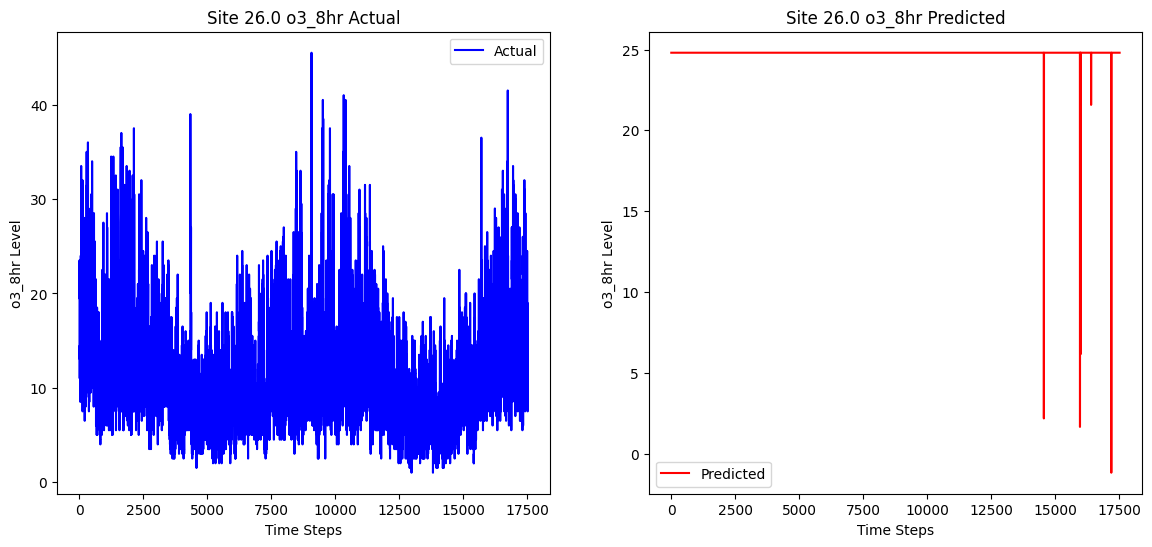

Site 27.0 o3_8hr MSE: 117.1396518288091


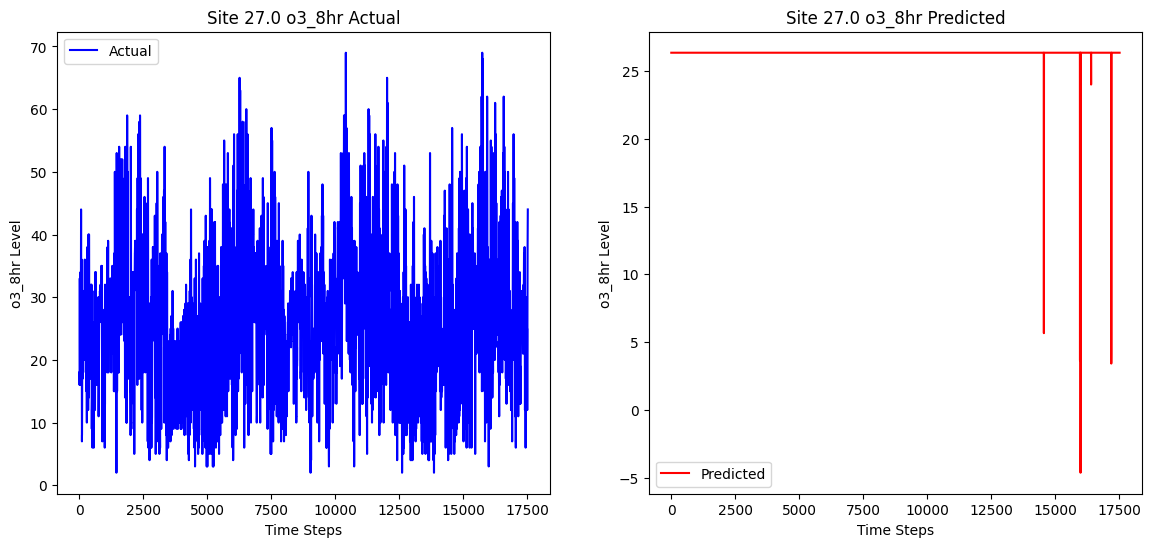

Site 28.0 o3_8hr MSE: 309.8273279616253


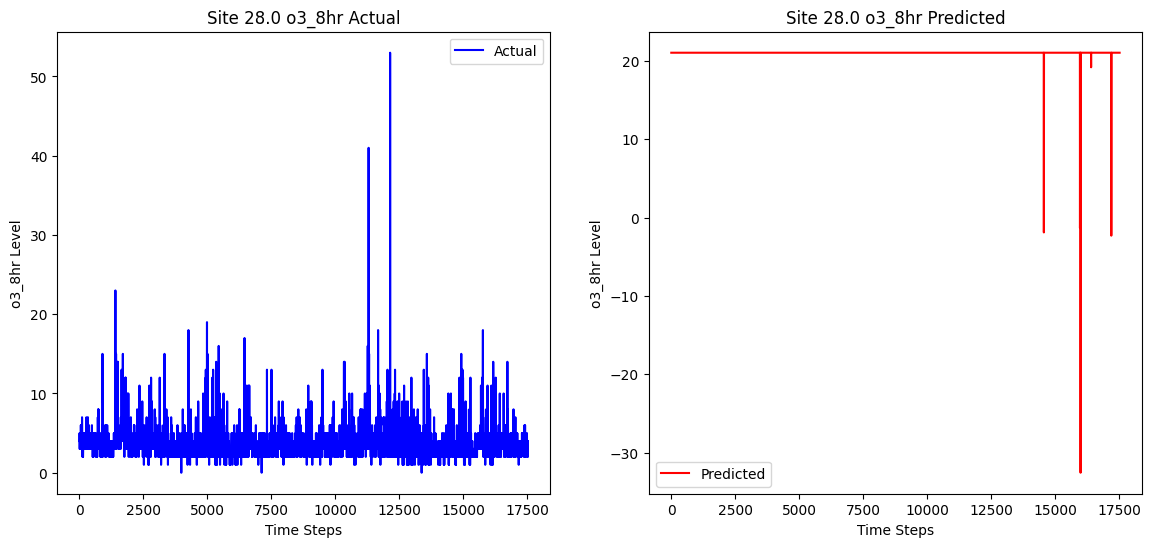

Site 29.0 o3_8hr MSE: 167.68609431942076


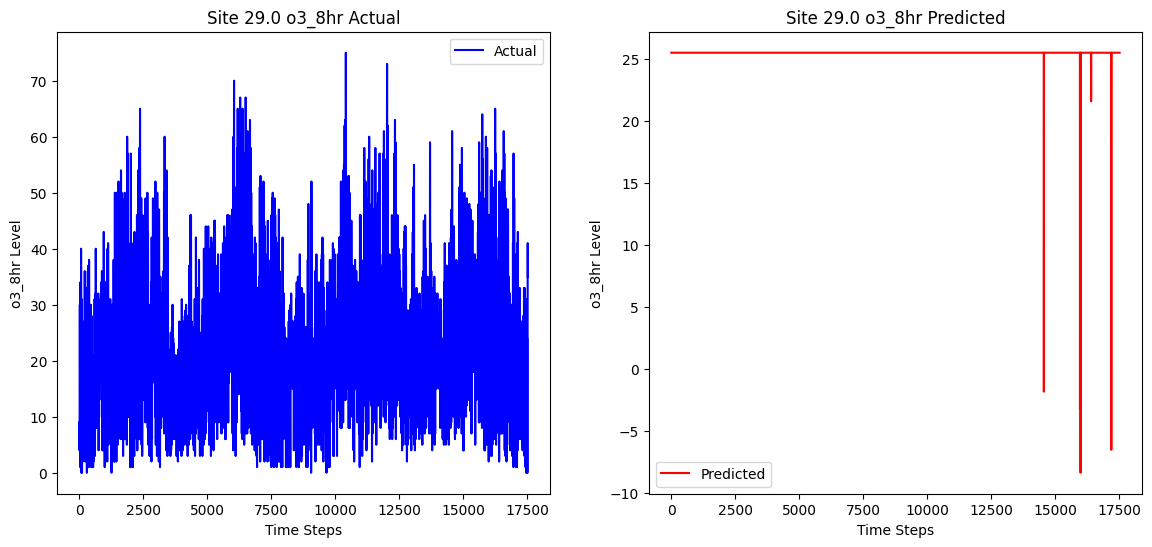

Site 30.0 o3_8hr MSE: 384.8568642514765


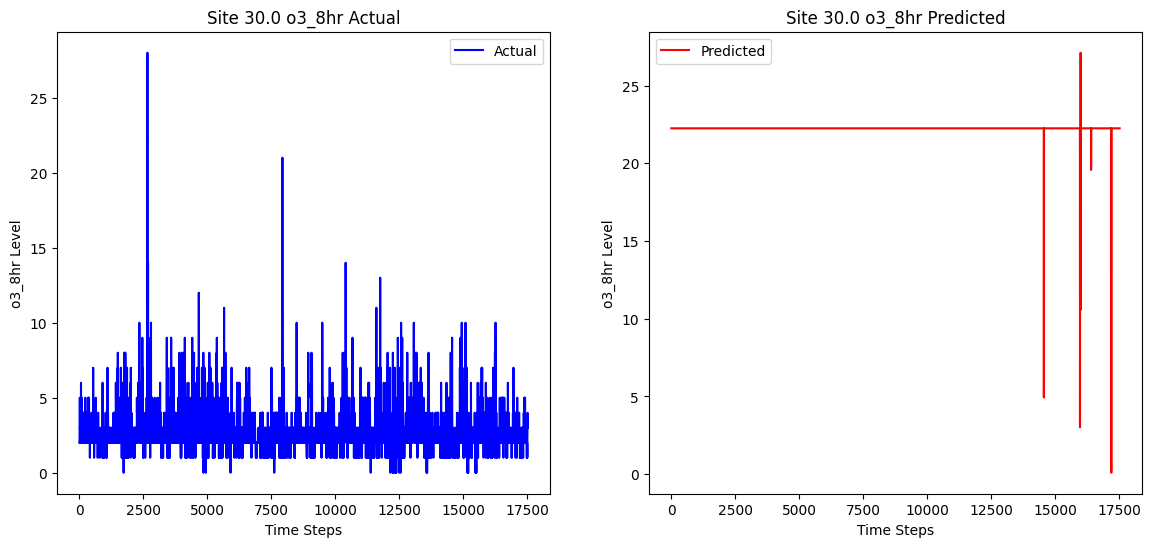

Site 31.0 o3_8hr MSE: 659.6312911752234


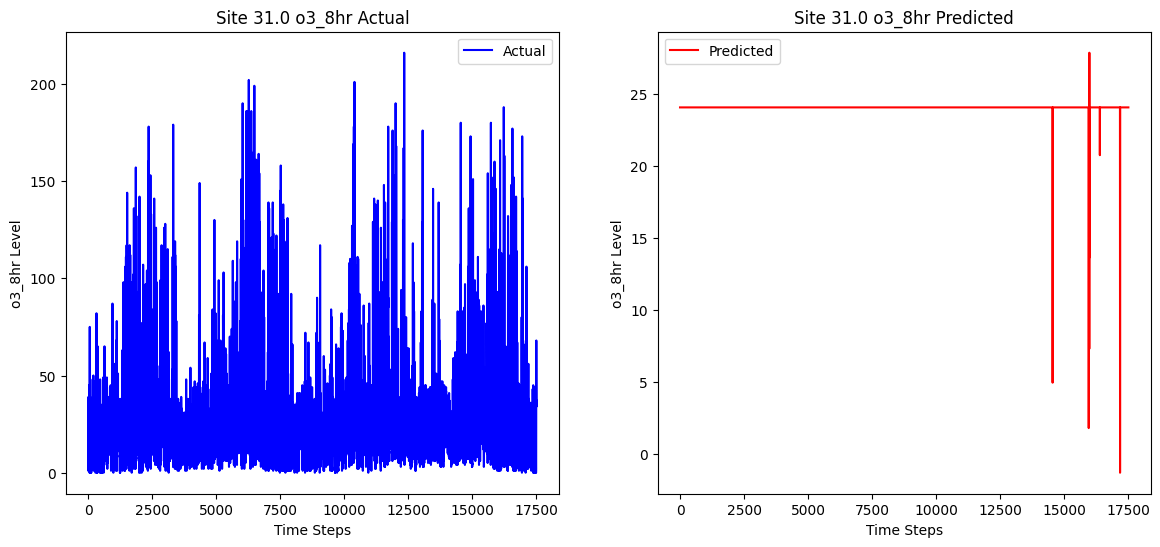

Site 32.0 o3_8hr MSE: 462.0957729854287


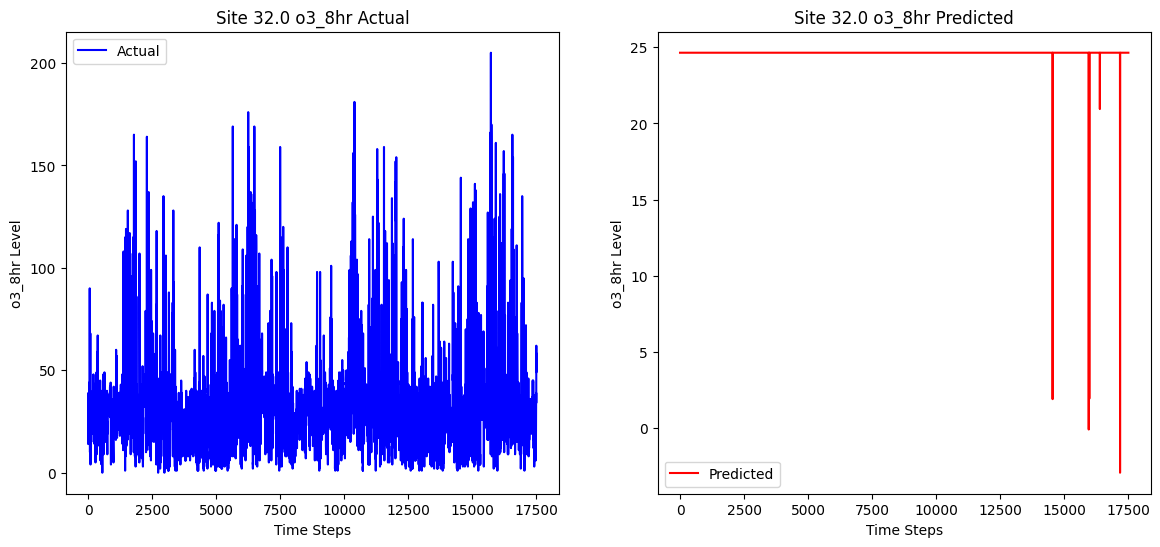

Site 33.0 o3_8hr MSE: 507.59264210550447


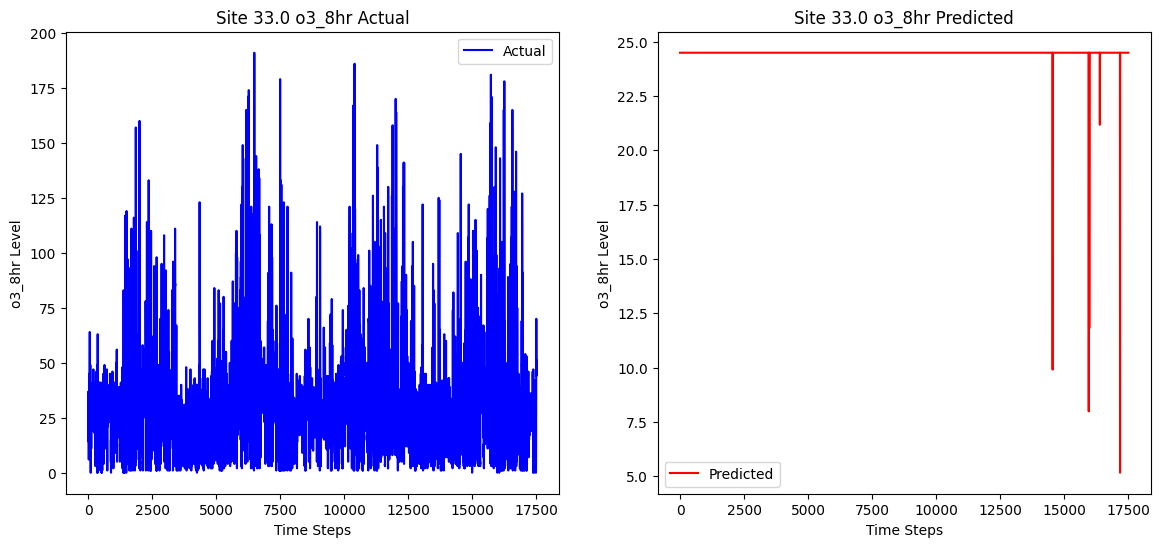

Site 34.0 o3_8hr MSE: 532.8302436240969


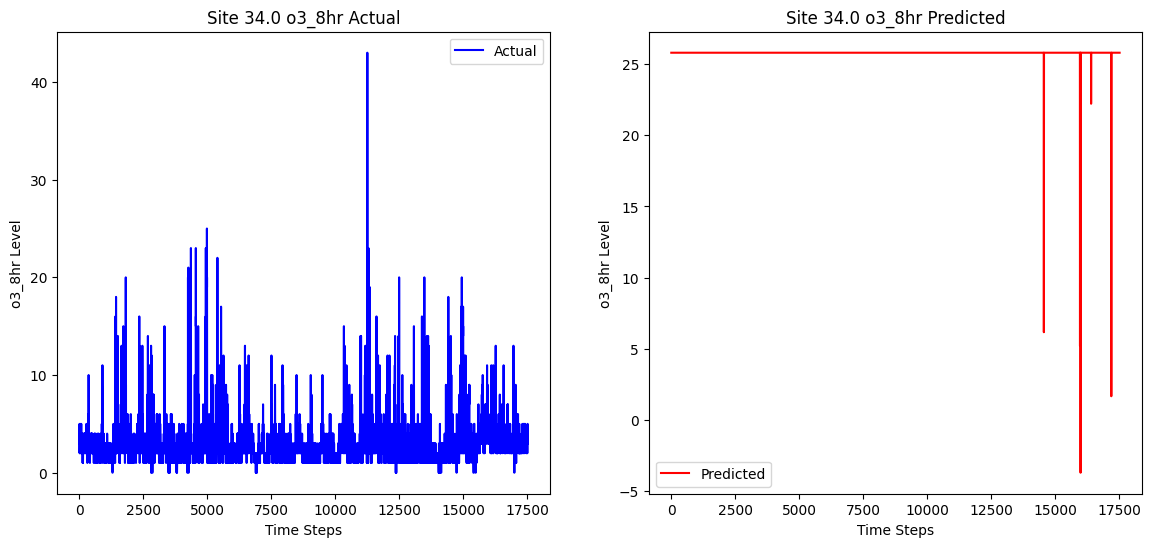

Site 35.0 o3_8hr MSE: 407.730864518457


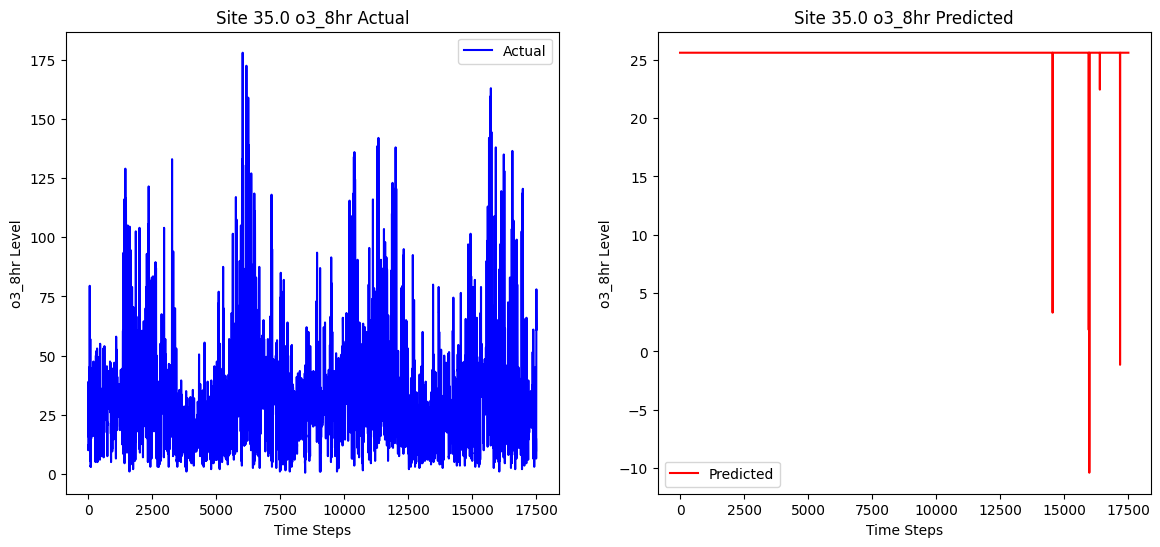

Site 36.0 o3_8hr MSE: 331.01111355468674


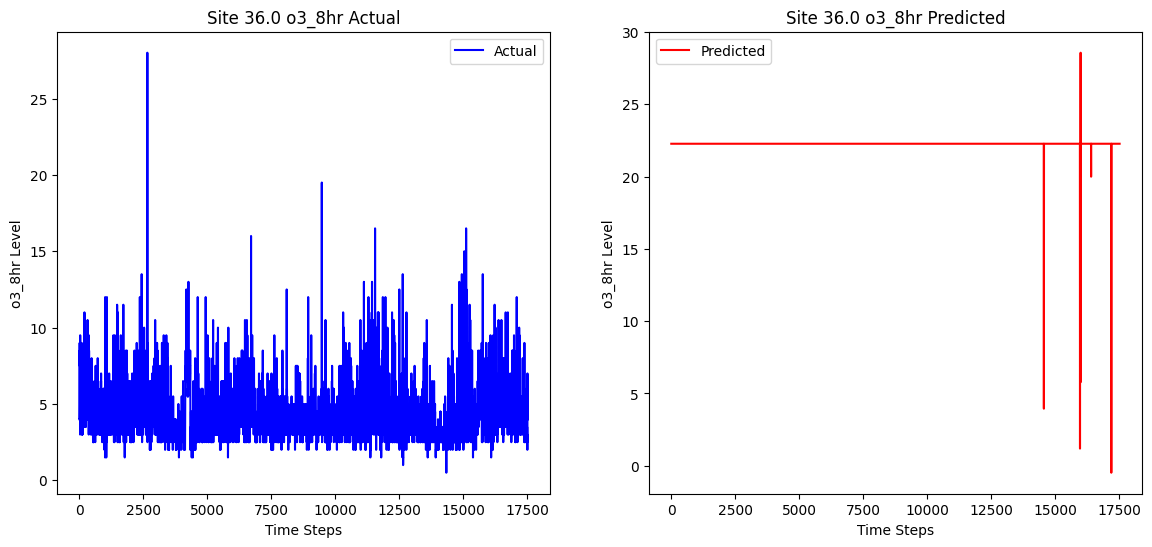

Site 37.0 o3_8hr MSE: 141.43513423702473


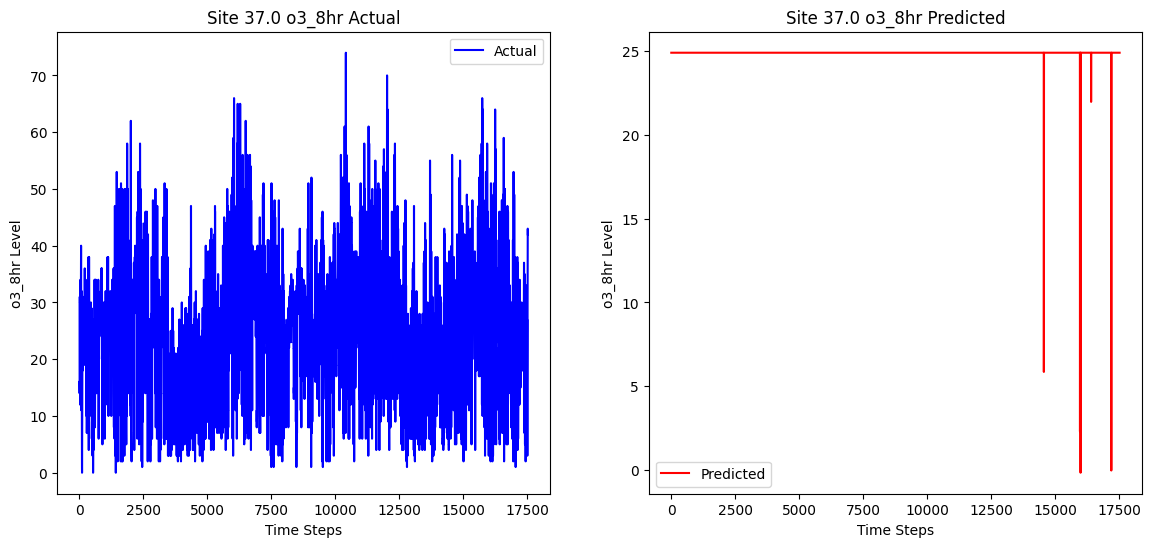

Site 38.0 o3_8hr MSE: 116.63033599923837


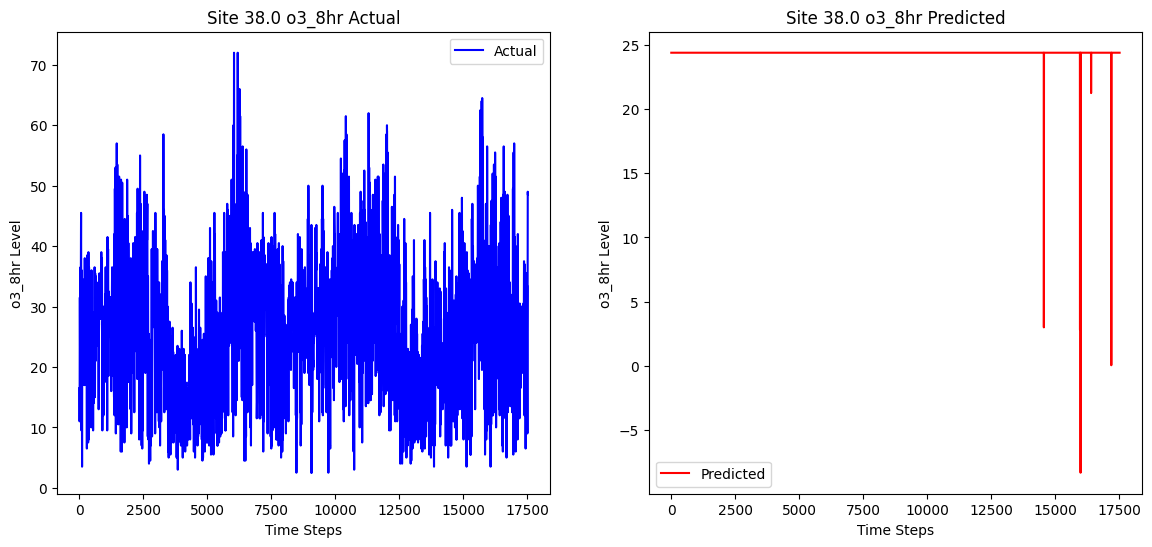

Site 41.0 o3_8hr MSE: 232.85710044510424


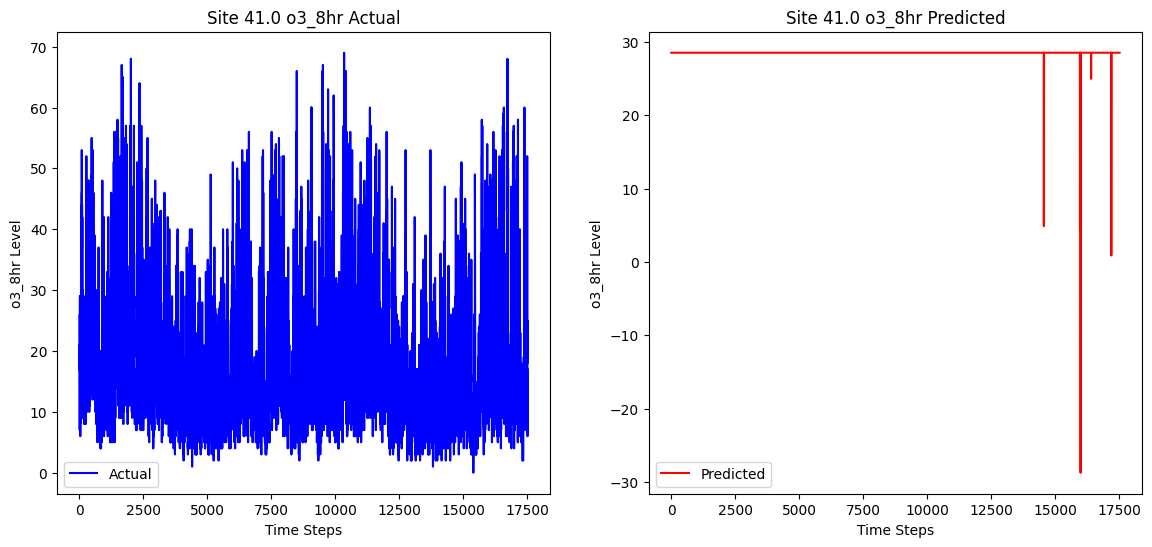

Site 69.0 o3_8hr MSE: 438.4439569004851


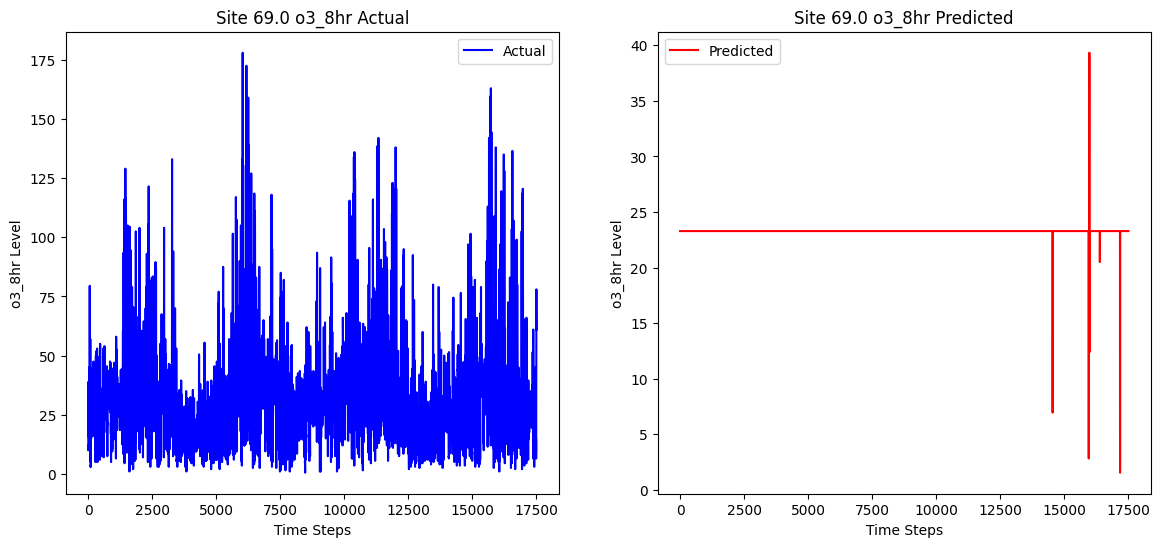

Site 72.0 o3_8hr MSE: 383.1148759588865


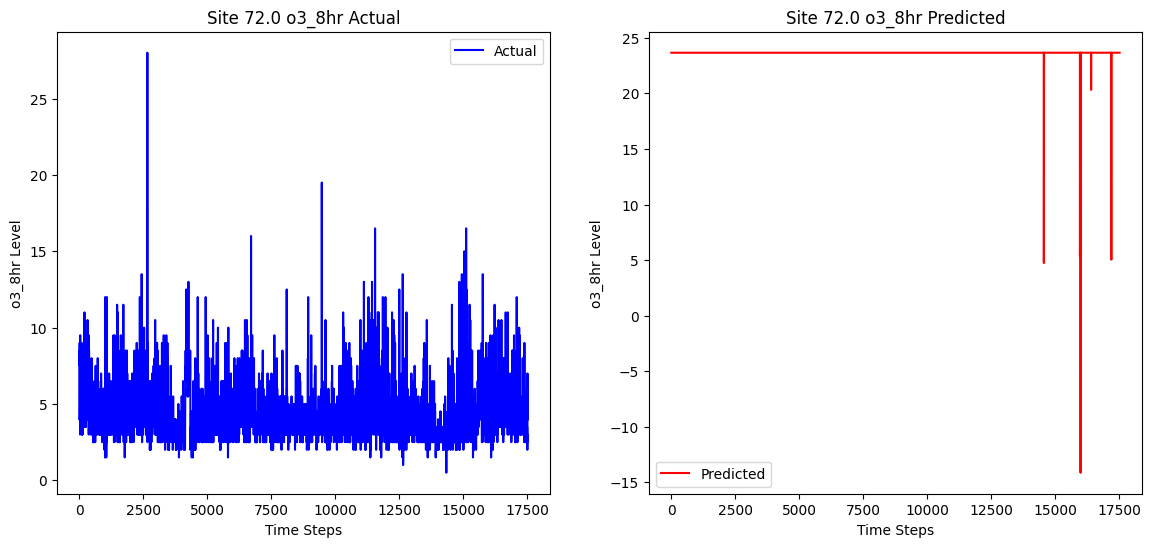

Site 83.0 o3_8hr MSE: 197.5465321837897


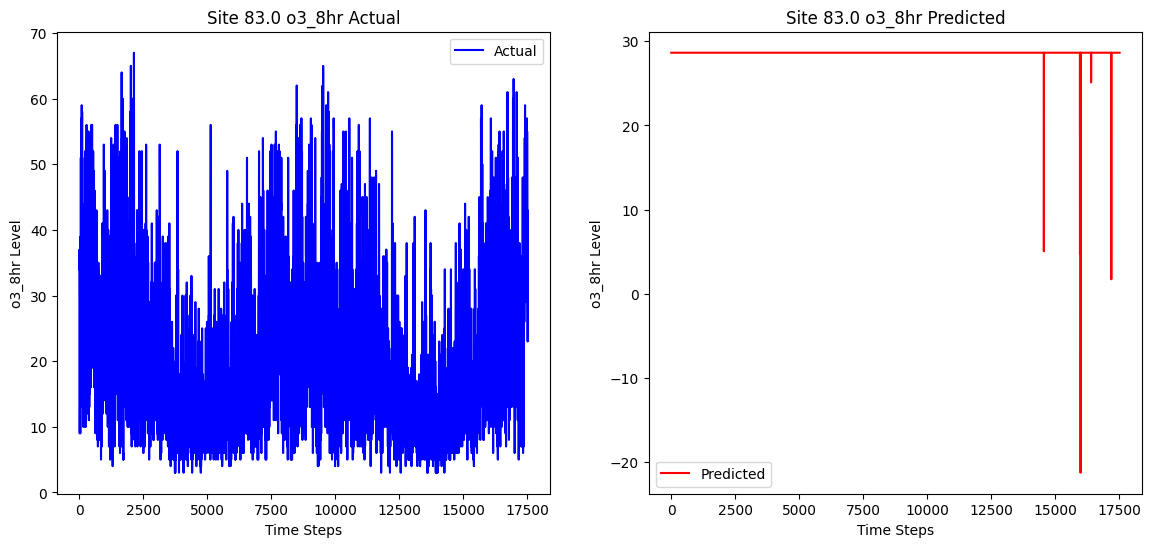

Site 25.0 no2 MSE: 161.95280530840236


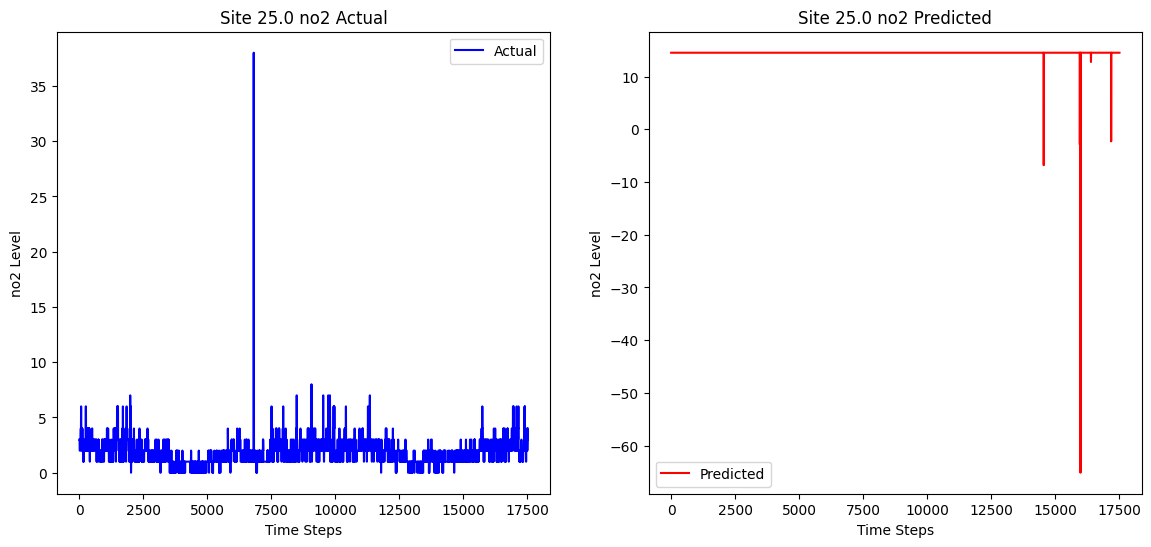

Site 26.0 no2 MSE: 63.08608021857058


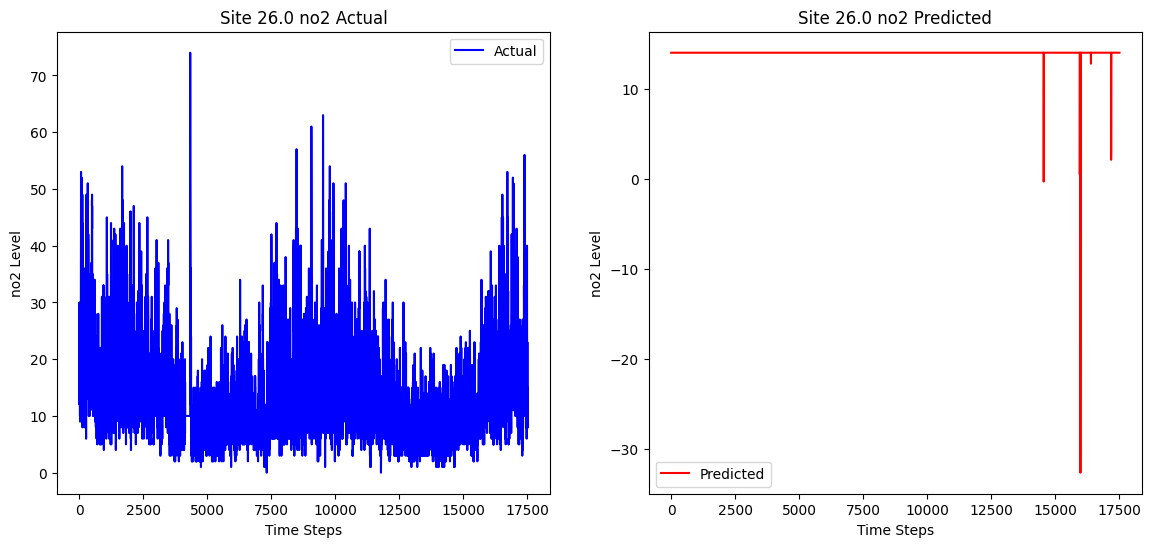

Site 27.0 no2 MSE: 331.63759953031916


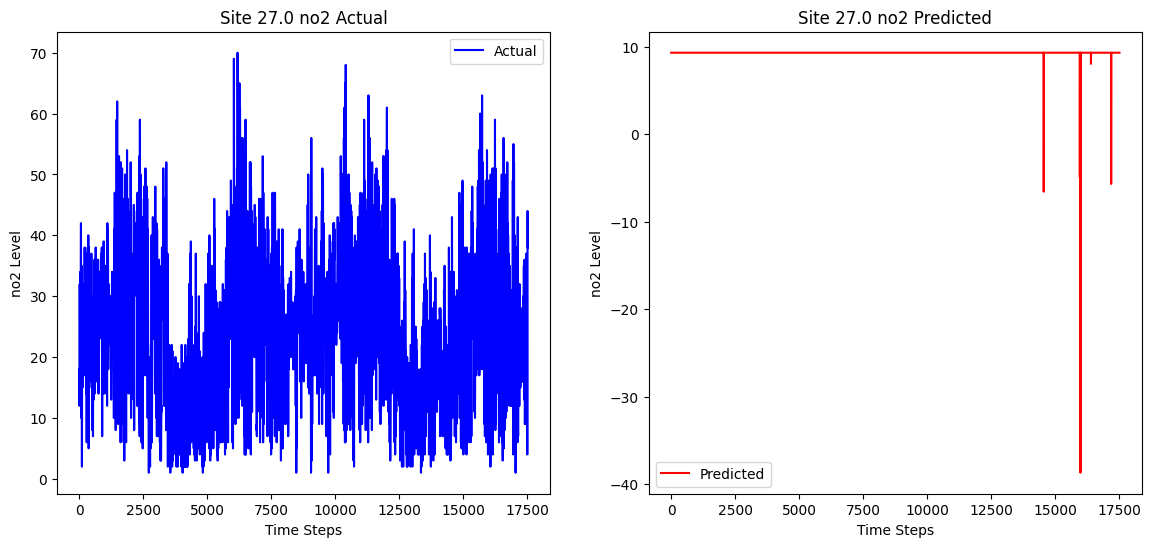

Site 28.0 no2 MSE: 73.50099354676864


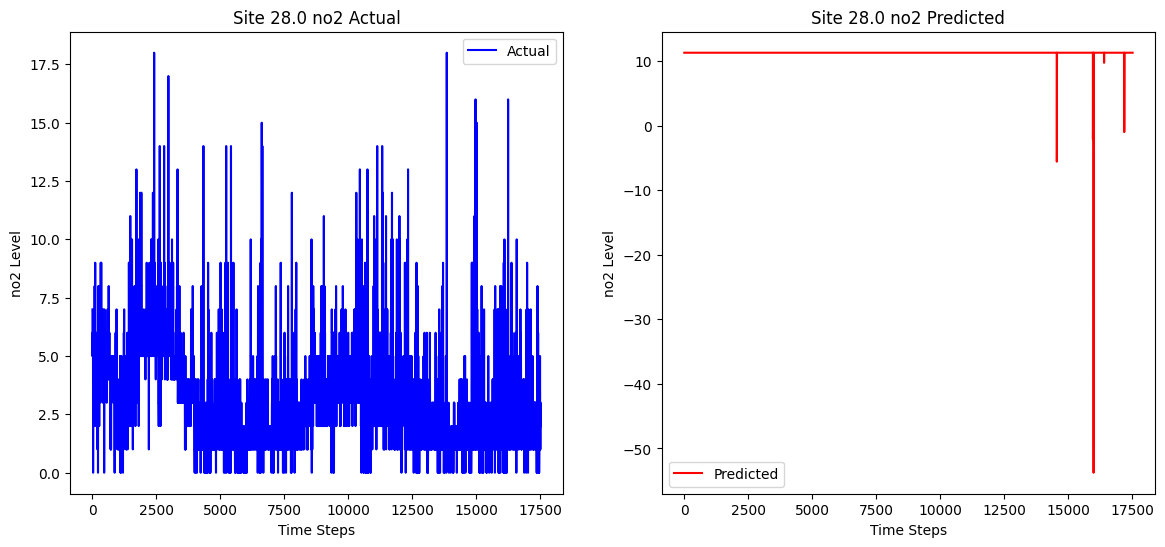

Site 29.0 no2 MSE: 204.42020392431434


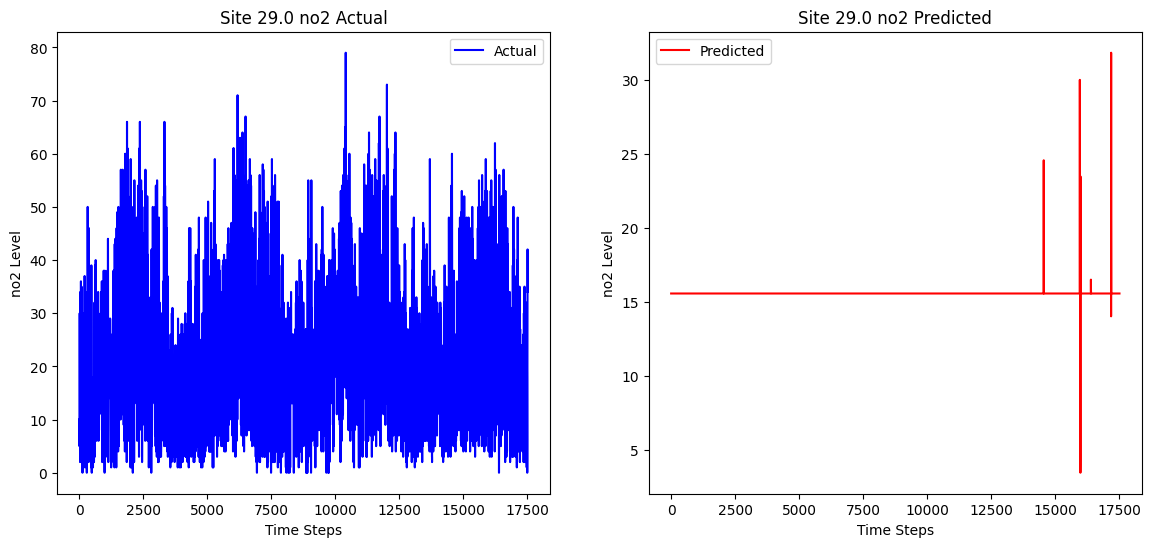

Site 30.0 no2 MSE: 287.74386475298945


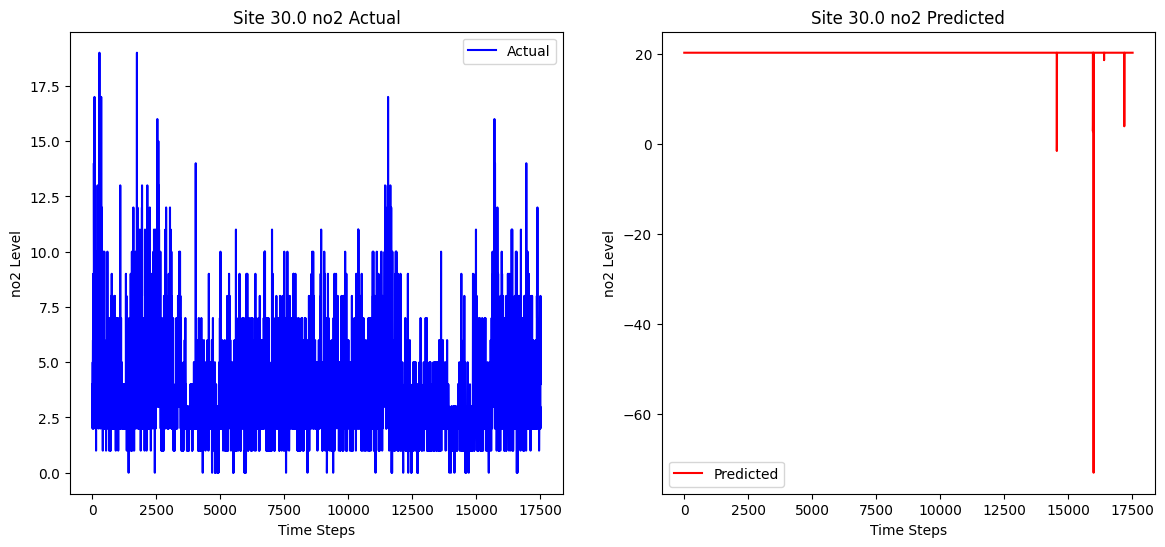

Site 31.0 no2 MSE: 812.9986186296626


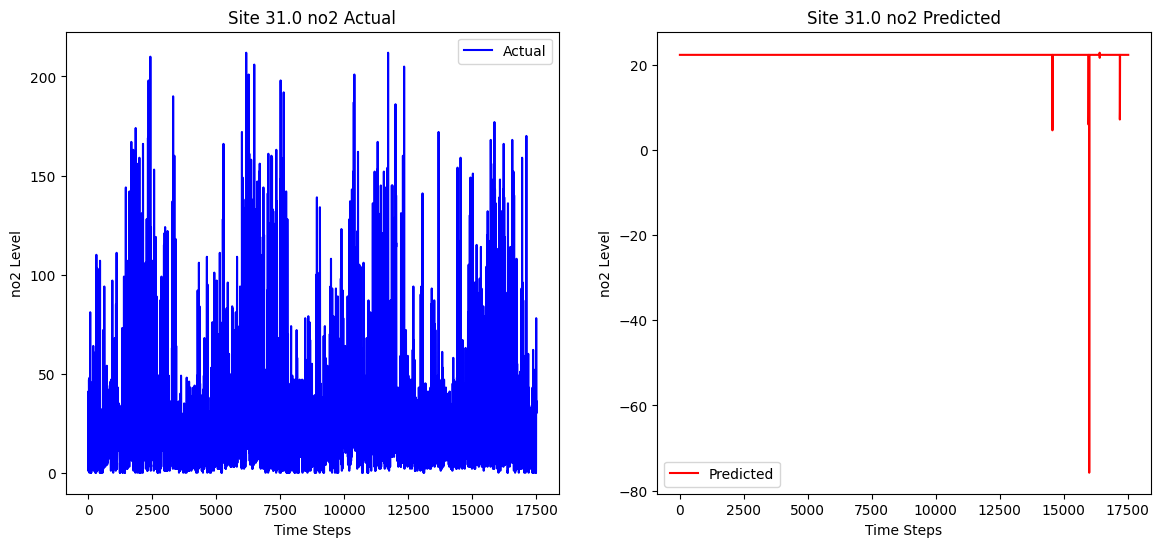

Site 32.0 no2 MSE: 522.4593265370812


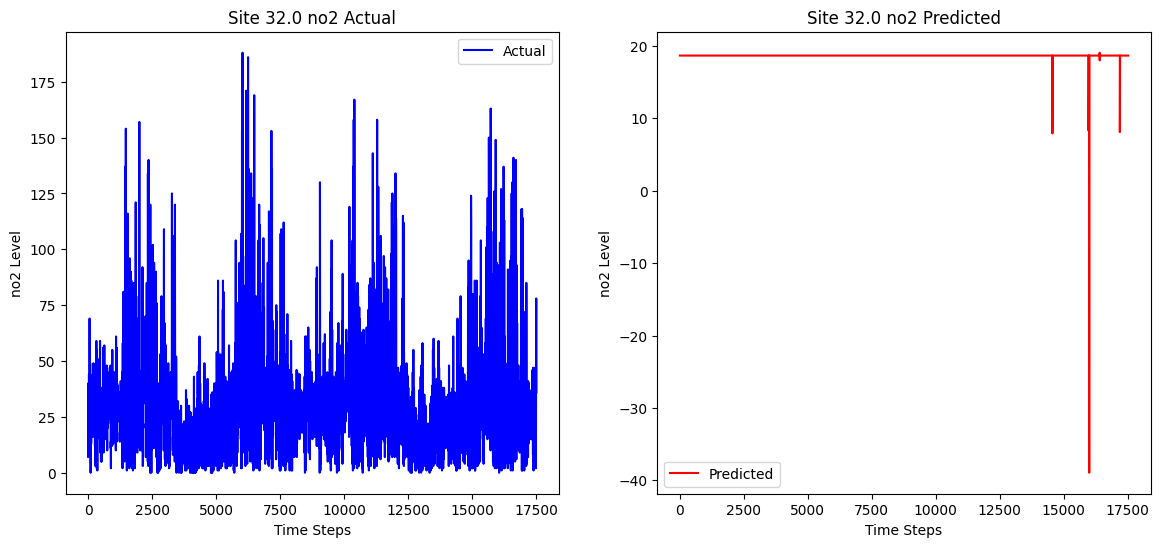

Site 33.0 no2 MSE: 612.107570329309


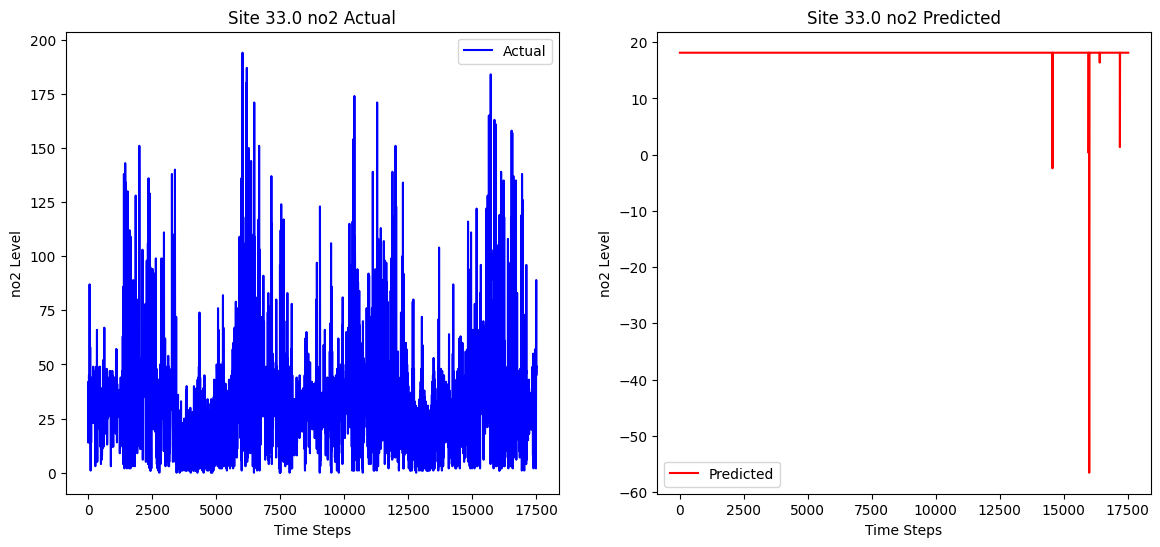

Site 34.0 no2 MSE: 110.99566127606073


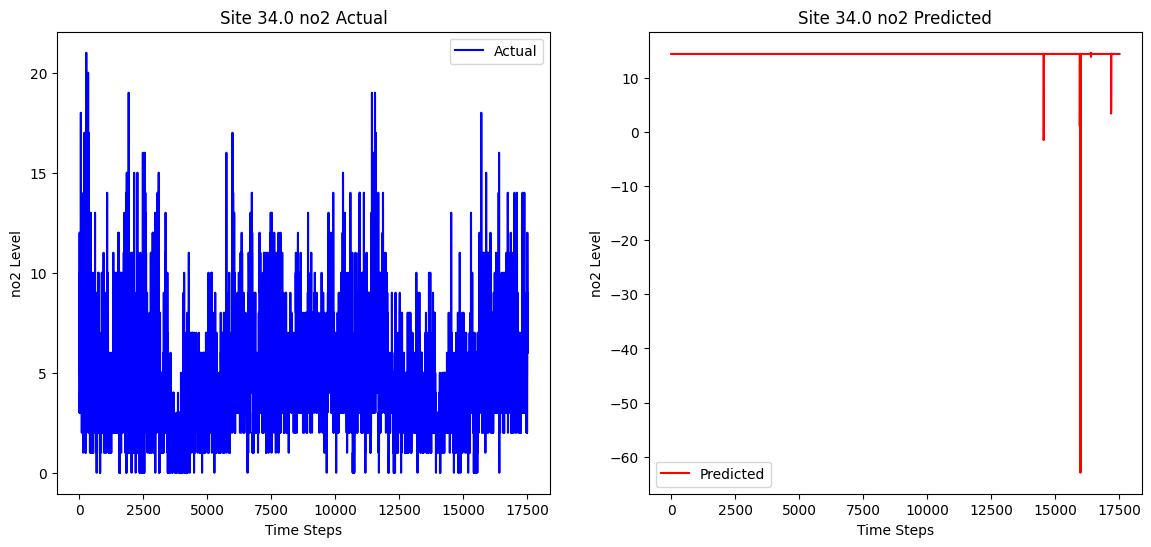

Site 35.0 no2 MSE: 662.1893693720157


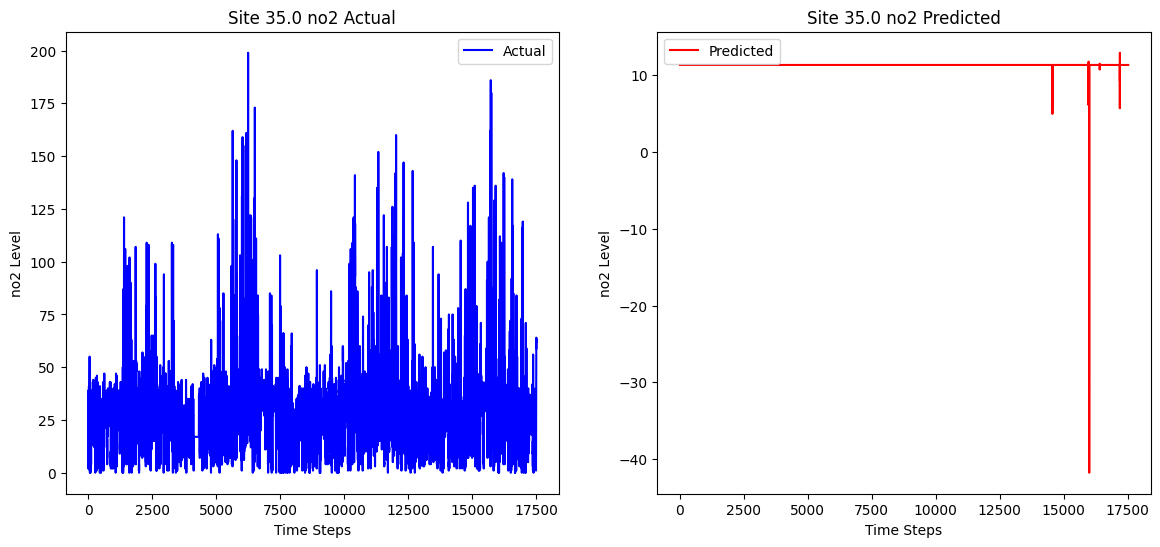

Site 36.0 no2 MSE: 160.77171139760694


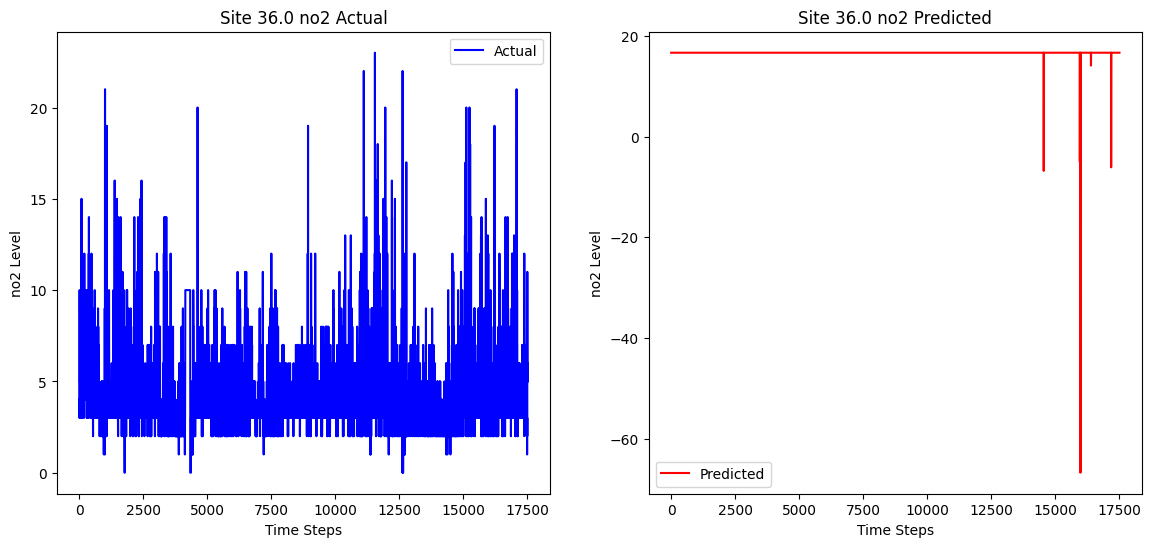

Site 37.0 no2 MSE: 271.41544397681315


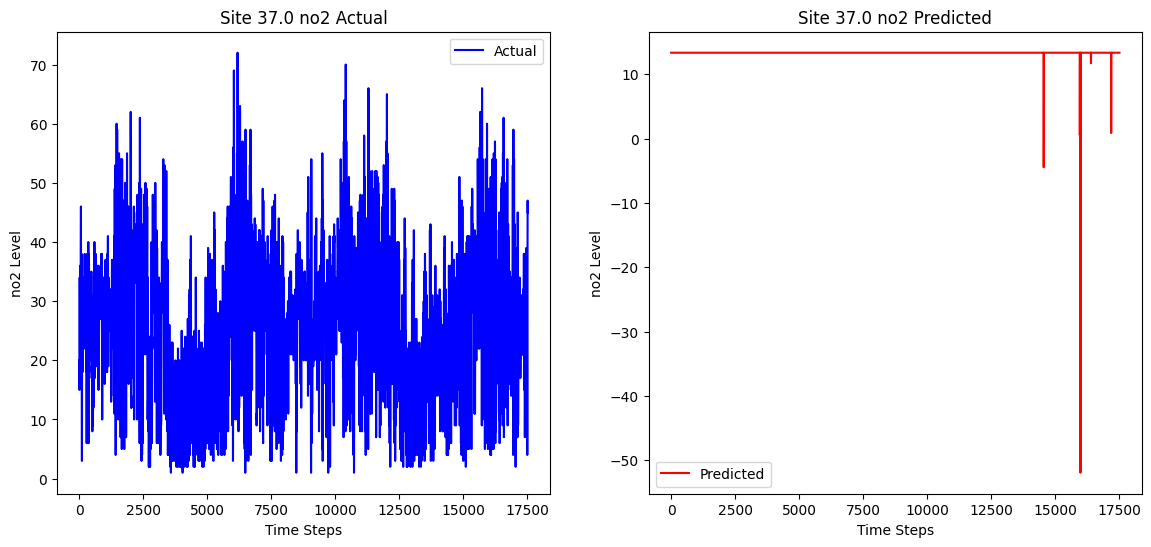

Site 38.0 no2 MSE: 288.8502535029651


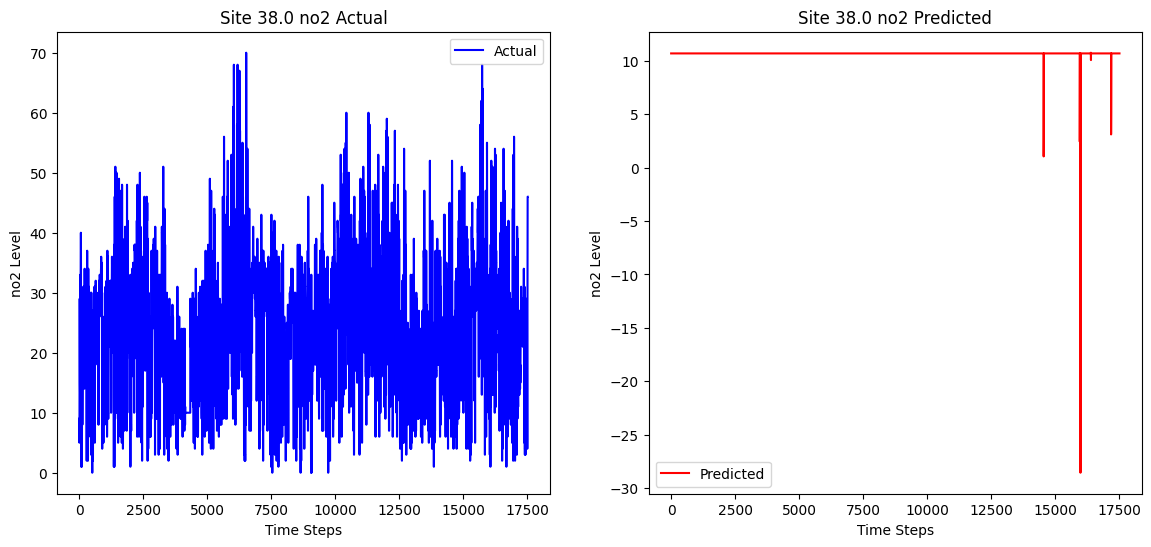

Site 41.0 no2 MSE: 46.79687764347787


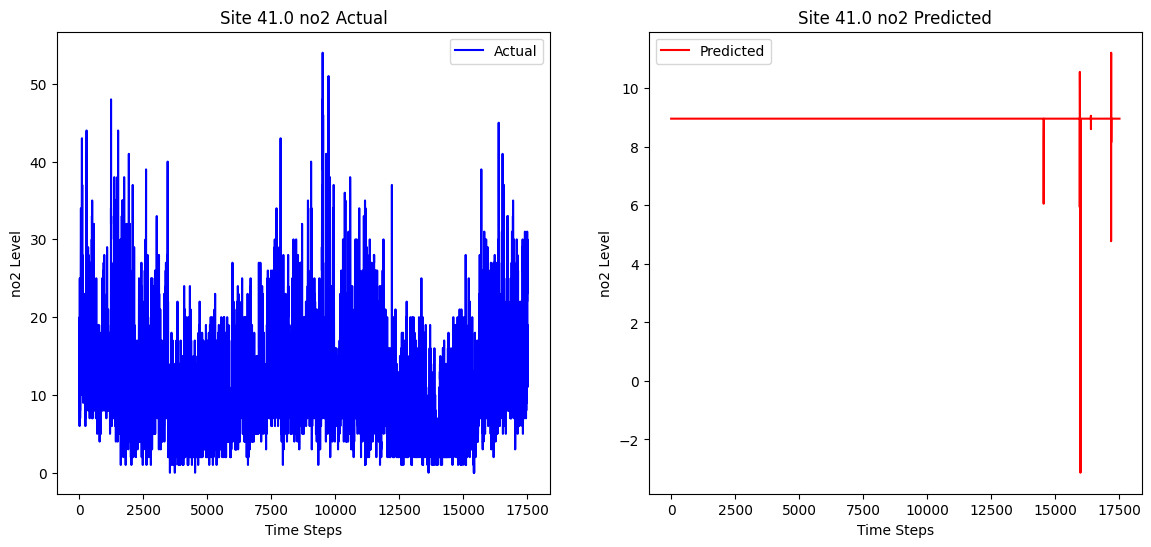

Site 69.0 no2 MSE: 633.1988038819021


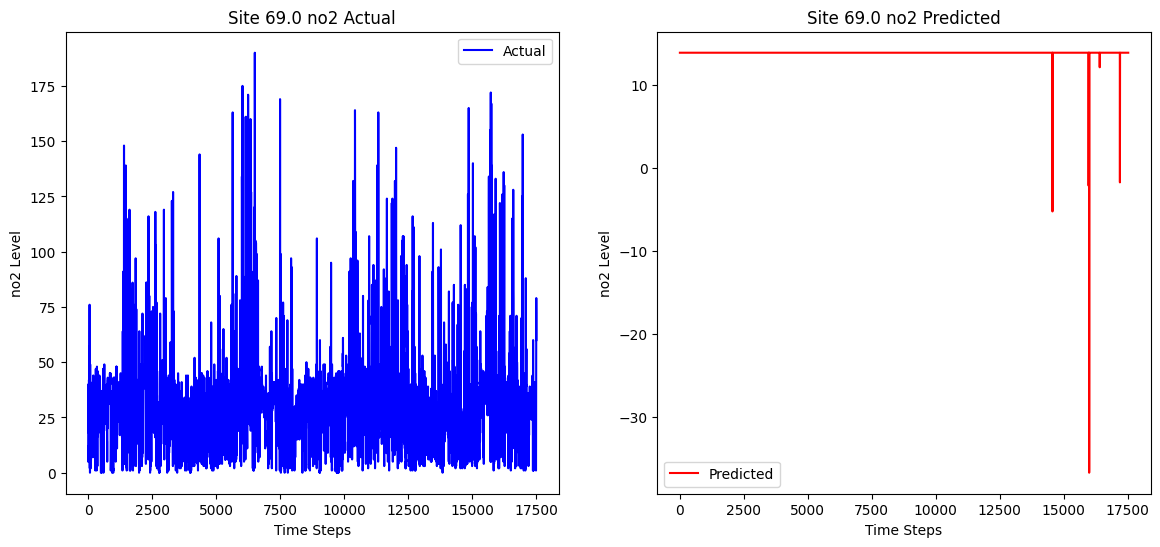

Site 72.0 no2 MSE: 104.15831254044562


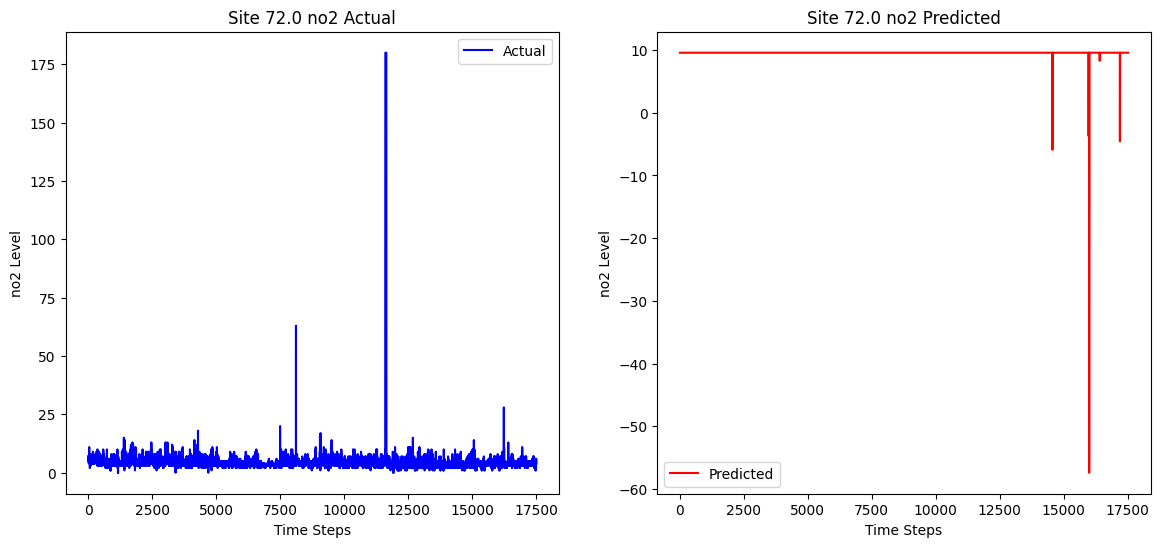

Site 83.0 no2 MSE: 126.25618241788139


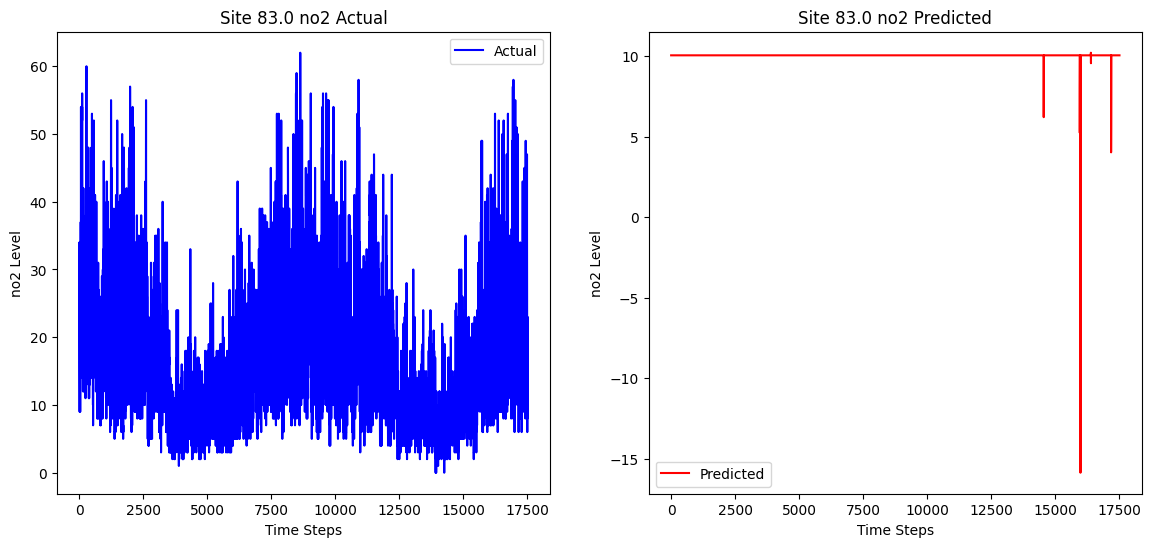

Site 25.0 co_8hr MSE: 1.6052850942110821


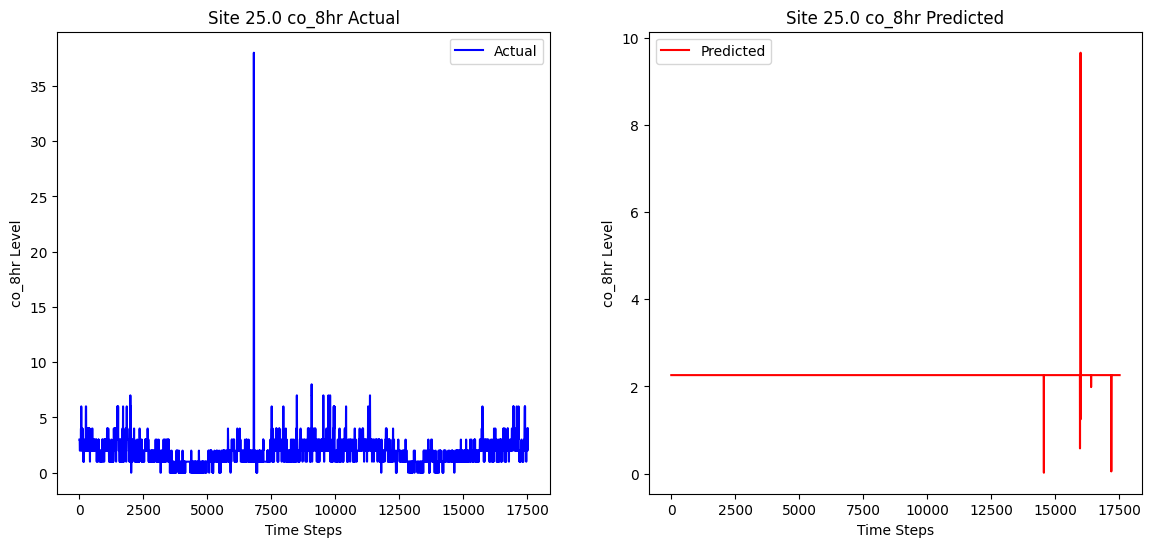

Site 26.0 co_8hr MSE: 189.4699290808519


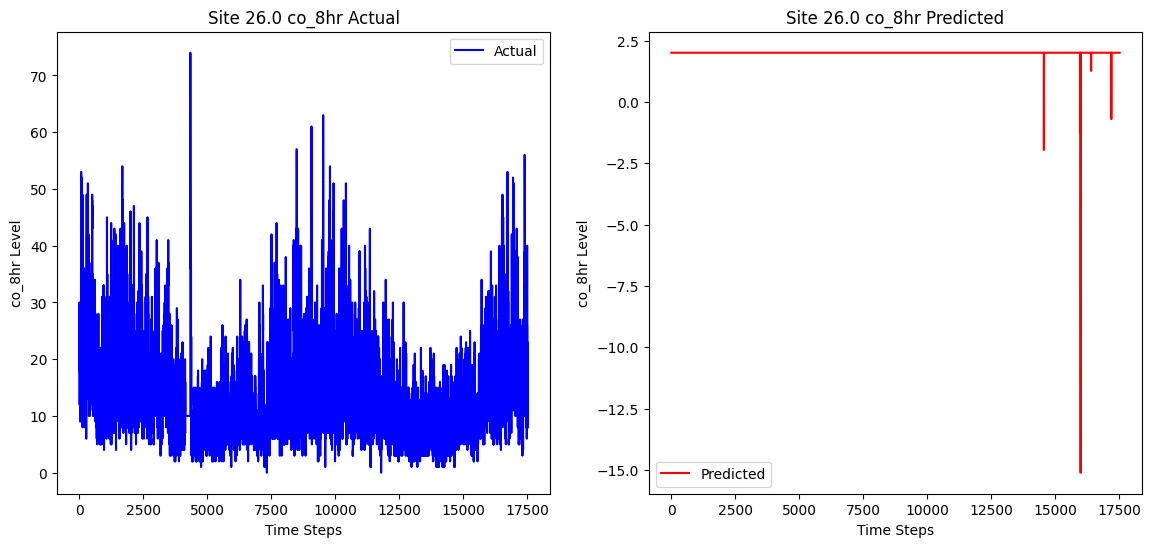

Site 27.0 co_8hr MSE: 599.4108584537995


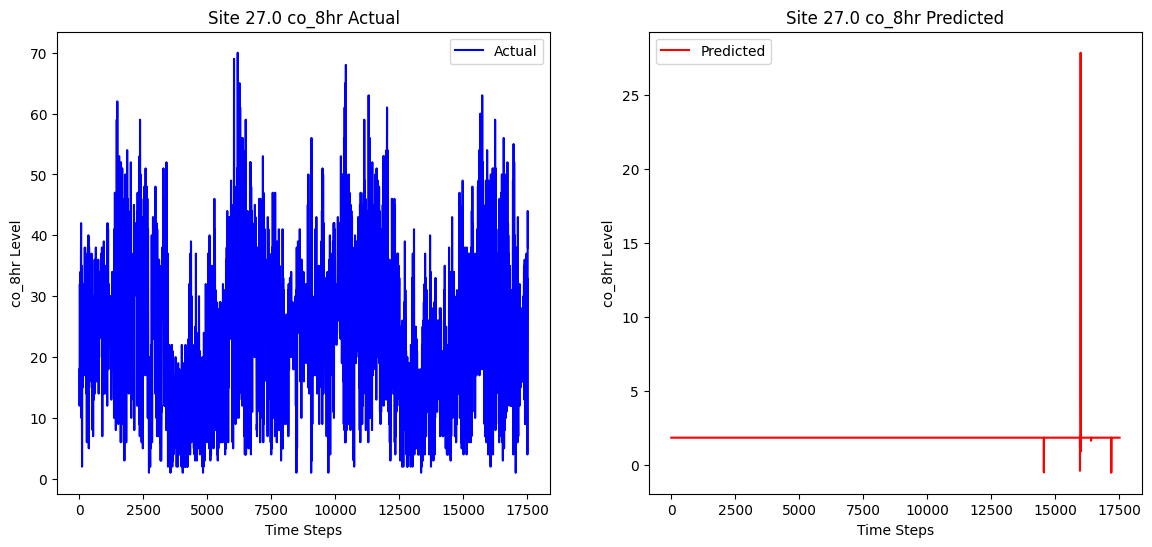

Site 28.0 co_8hr MSE: 1.2472724843499072


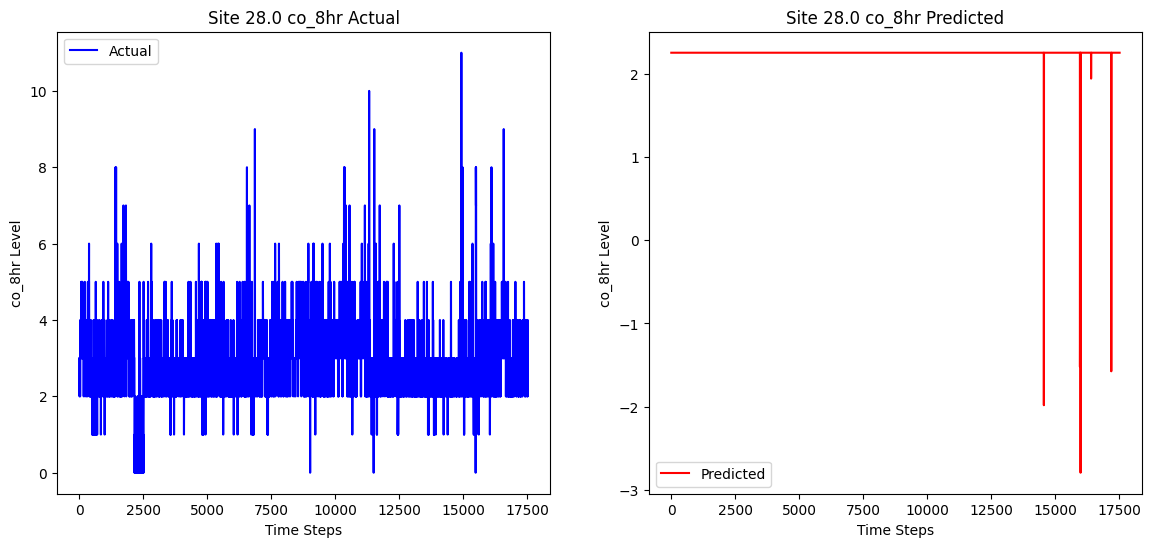

Site 29.0 co_8hr MSE: 577.6913492419498


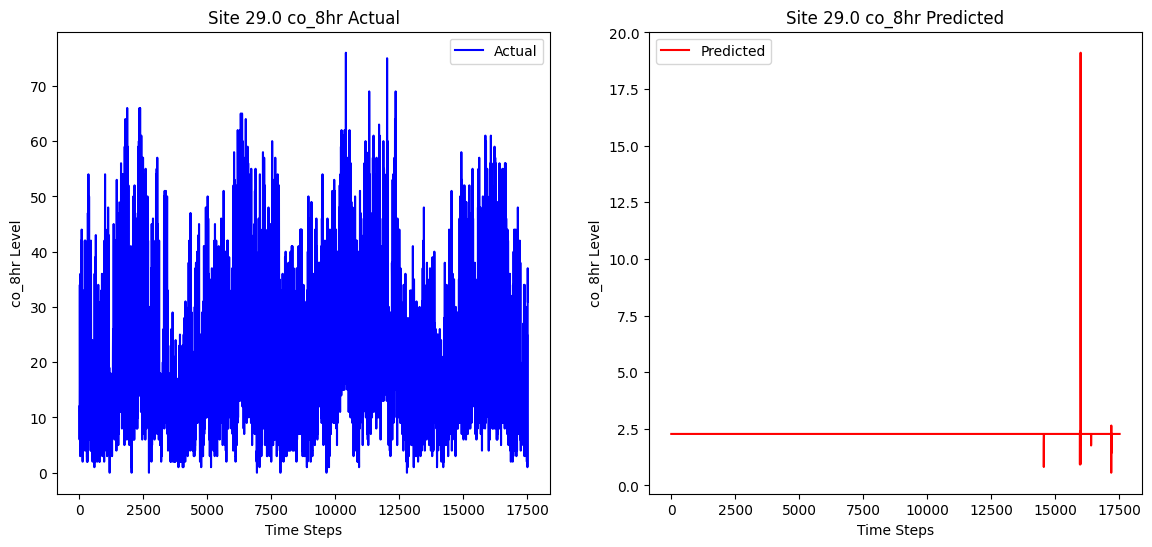

Site 30.0 co_8hr MSE: 3.7348375212220093


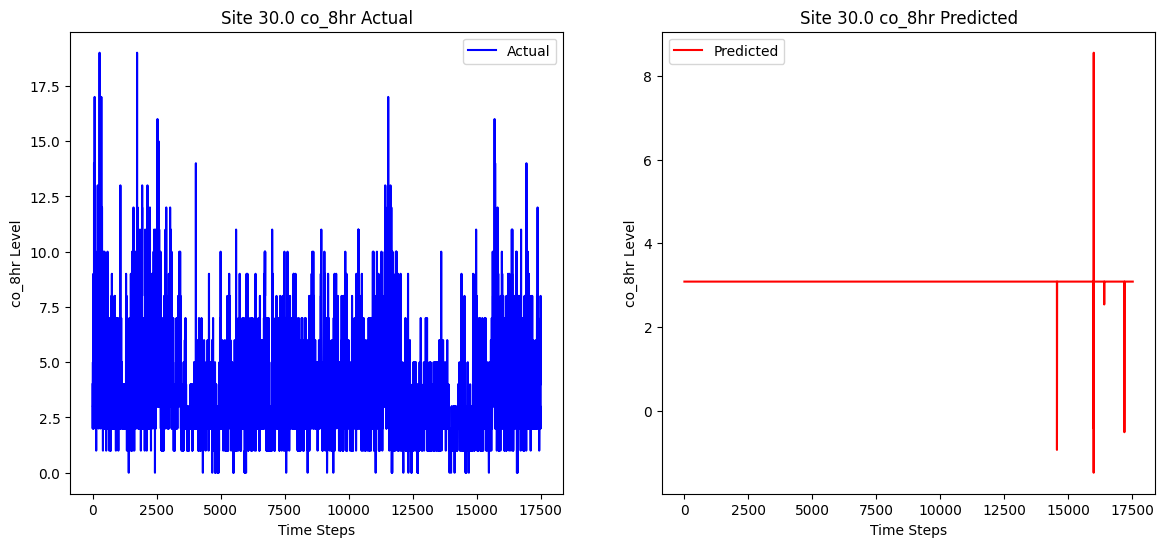

Site 31.0 co_8hr MSE: 1506.2721722041135


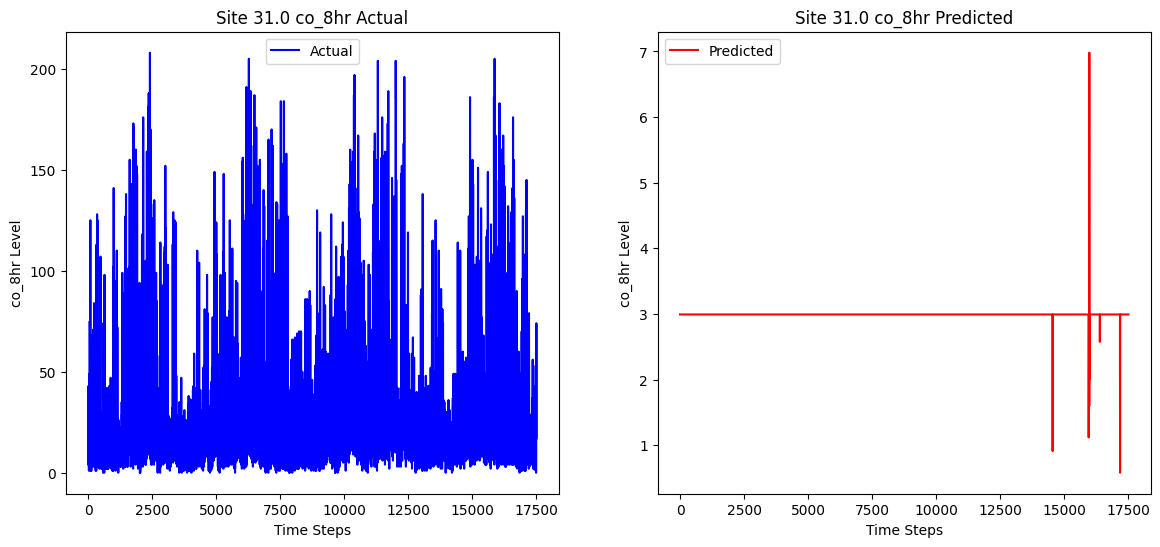

Site 32.0 co_8hr MSE: 1114.2067588117864


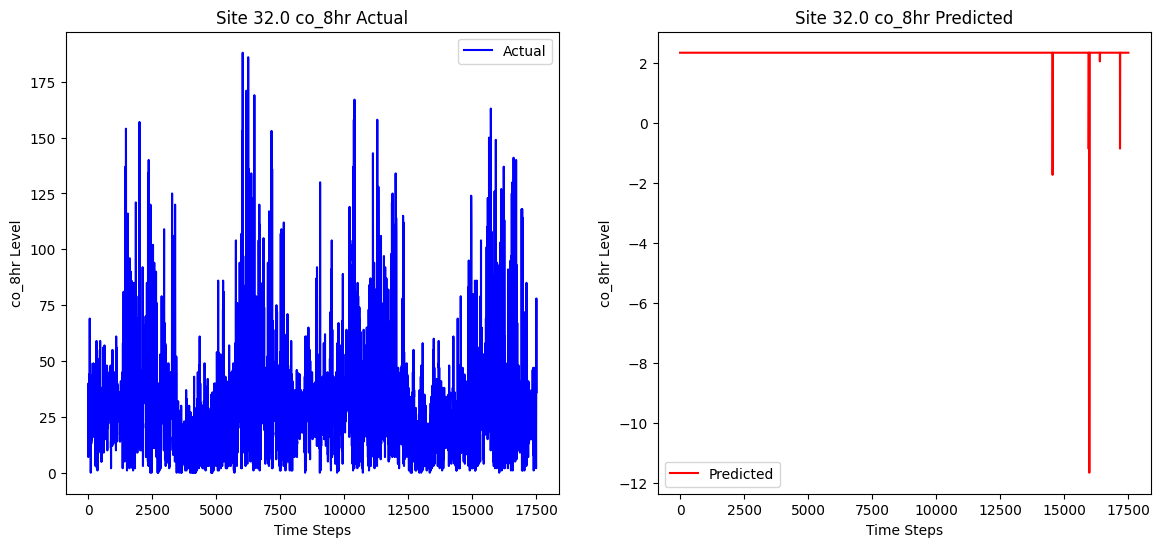

Site 33.0 co_8hr MSE: 1718.4704742045378


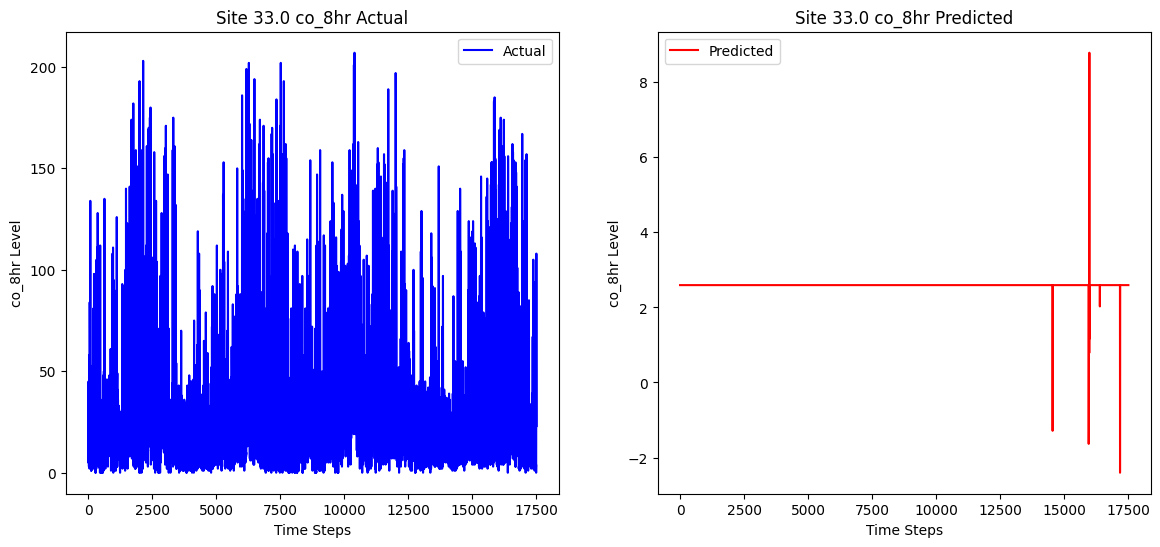

Site 34.0 co_8hr MSE: 2.783674600731415


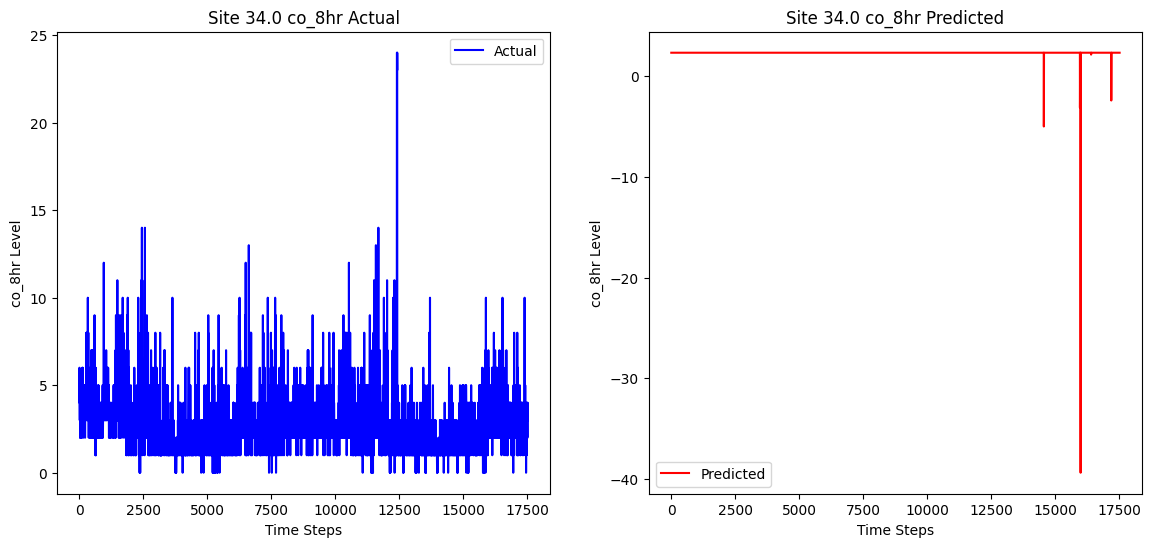

Site 35.0 co_8hr MSE: 1047.5572762376737


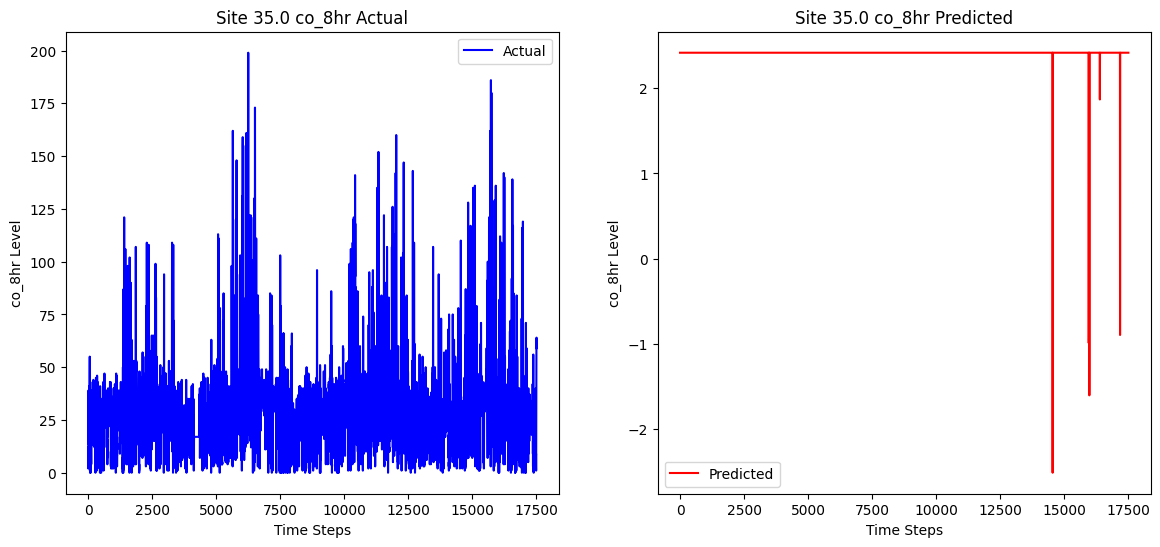

Site 36.0 co_8hr MSE: 6.104113286799695


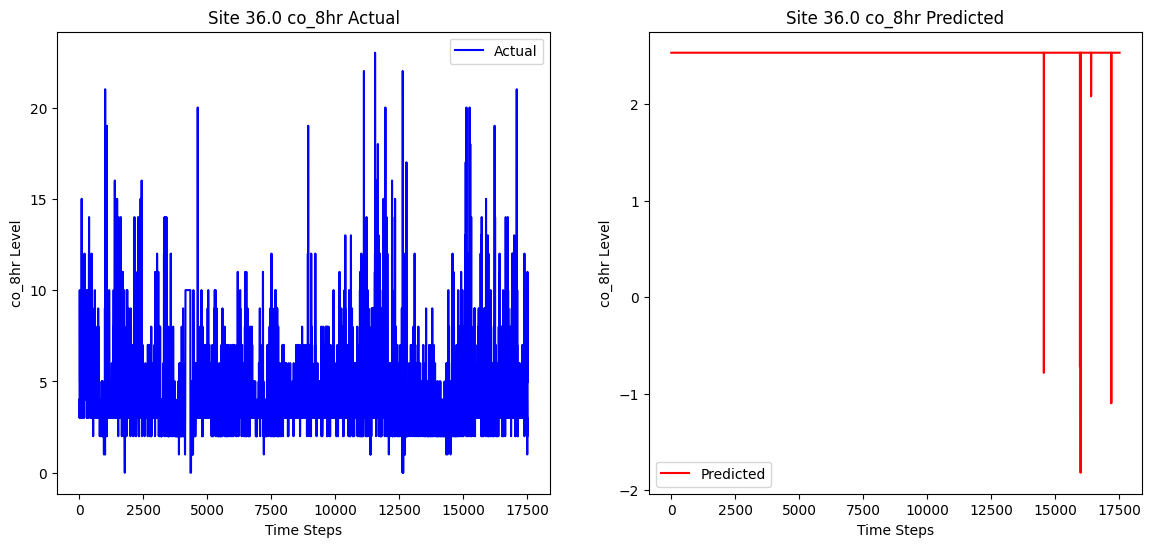

Site 37.0 co_8hr MSE: 579.3274344559275


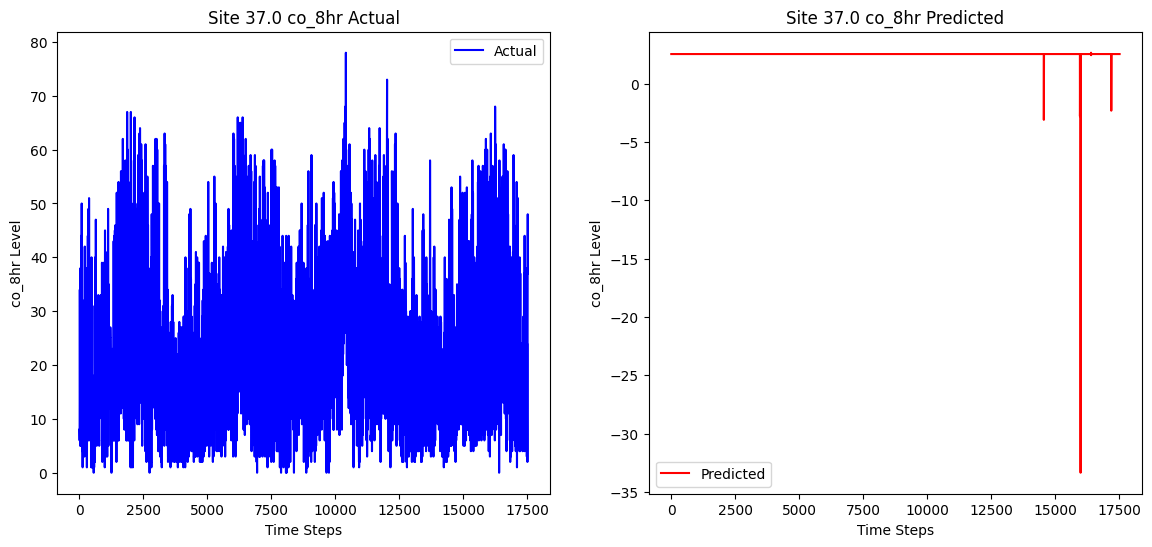

Site 38.0 co_8hr MSE: 572.2832712066668


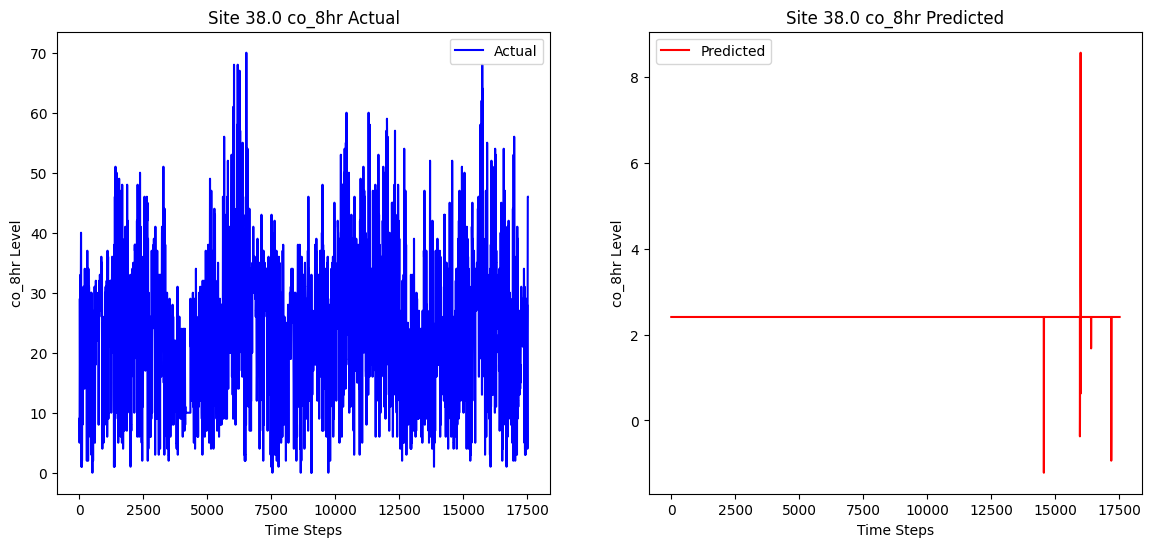

Site 41.0 co_8hr MSE: 198.83112823427825


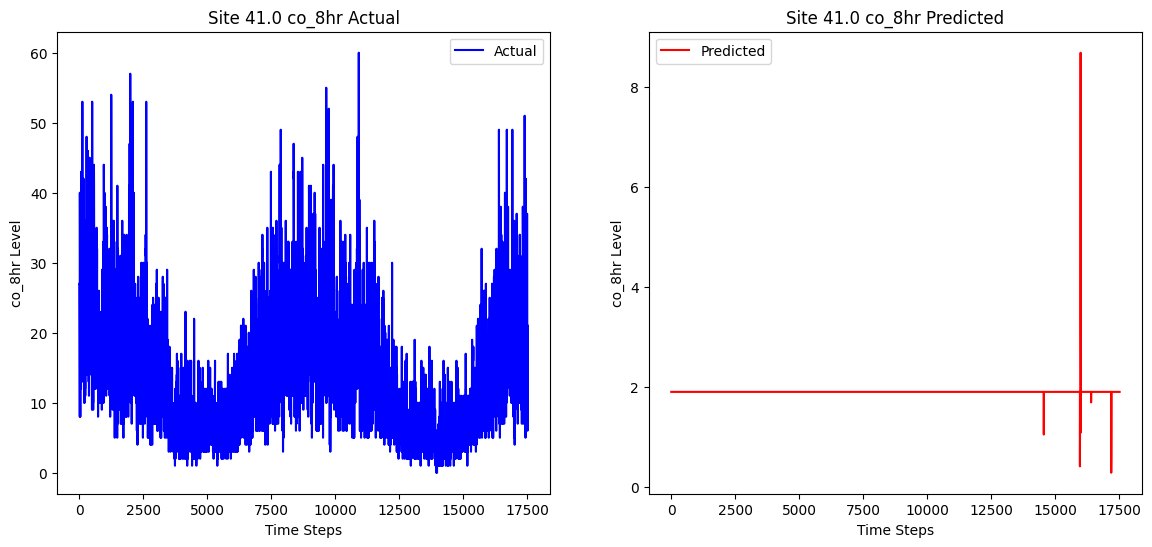

Site 69.0 co_8hr MSE: 1128.9772037025143


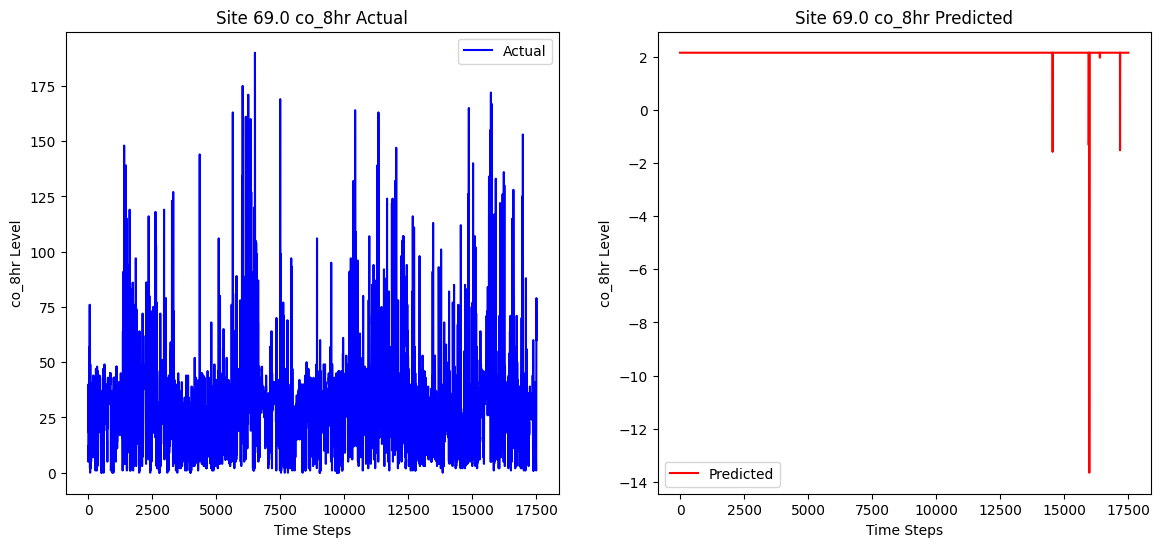

Site 72.0 co_8hr MSE: 83.53638966228583


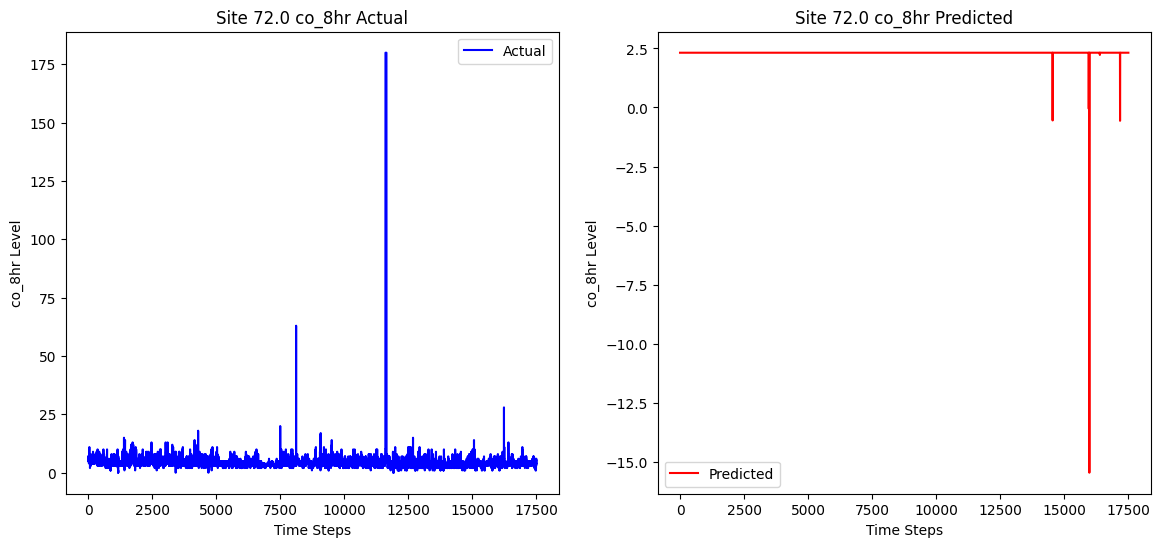

Site 83.0 co_8hr MSE: 84.58044250030142


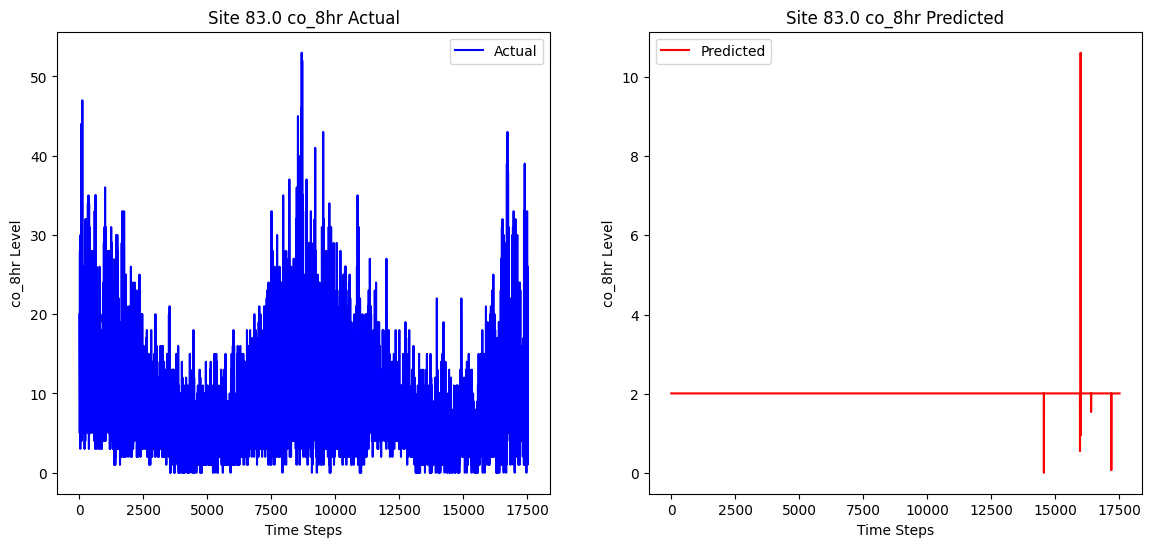

IndexError at Site 25.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 26.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 27.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 28.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 29.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 30.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 31.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 32.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 33.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 34.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 35.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 36.0 for pm2.5_avg: inde

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Get model predictions
predictions = model.predict(X)

# Ensure the shape of y is (samples, timesteps, rows, cols, channels)
# Original shape of y is (samples, 1, 5, 5, 7), adjust to (samples, 1, 5, 5, 7)
y = np.transpose(y, (0, 1, 4, 2, 3))

# Define pollutant names
pollutants = list(file_paths.keys())

# Define site positions
site_positions = {
 25.0: (4, 3),
 26.0: (3, 3),
 27.0: (2, 2),
 28.0: (1, 1),
 29.0: (2, 1),
 30.0: (1, 2),
 31.0: (0, 1),
 32.0: (0, 2),
 33.0: (0, 0),
 34.0: (1, 0),
 35.0: (0, 3),
 36.0: (1, 3),
 37.0: (2, 0),
 38.0: (2, 3),
 41.0: (3, 0),
 69.0: (0, 4),
 72.0: (1, 4),
 83.0: (3, 1)}

# Calculate MSE for each station and visualize
mse_results = {pollutant: [] for pollutant in pollutants}

# Iterate over pollutants and specified site positions
for pollutant_idx, pollutant in enumerate(pollutants):
    for site_id, (row_idx, col_idx) in site_positions.items():
        try:
            actual = y[:, 0, row_idx, col_idx, pollutant_idx]
            predicted = predictions[:, 0, row_idx, col_idx, pollutant_idx]
            mse = mean_squared_error(actual, predicted)
            mse_results[pollutant].append(mse)
            print(f"Site {site_id} {pollutant} MSE: {mse}")

            # Visualization
            plt.figure(figsize=(14, 6))

            # Show actual data on the left
            plt.subplot(1, 2, 1)
            plt.plot(actual, label='Actual', color='blue')
            plt.xlabel('Time Steps')
            plt.ylabel(f'{pollutant} Level')
            plt.title(f'Site {site_id} {pollutant} Actual')
            plt.legend()

            # Show predicted data on the right
            plt.subplot(1, 2, 2)
            plt.plot(predicted, label='Predicted', color='red')
            plt.xlabel('Time Steps')
            plt.ylabel(f'{pollutant} Level')
            plt.title(f'Site {site_id} {pollutant} Predicted')
            plt.legend()

            plt.show()

        except IndexError as e:
            print(f"IndexError at Site {site_id} for {pollutant}: {e}")

# Unified format to display MSE for all sites
for pollutant, mse_list in mse_results.items():
    print(f"\nMSE for {pollutant}:")
    for site_id, mse in zip(site_positions.keys(), mse_list):
        print(f"Site {site_id}: {mse}")


In [5]:
predictions.shape


(17516, 1, 5, 5, 7)

In [6]:
y.shape

(17516, 1, 7, 5, 5)

Site 25.0 o3 MSE: 882.3830830942213


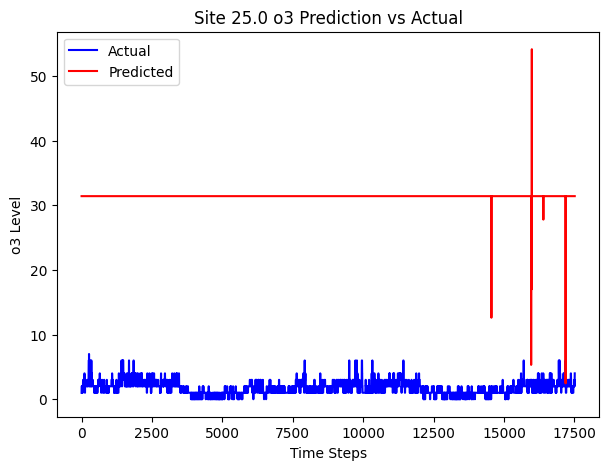

Site 26.0 o3 MSE: 502.7408484182417


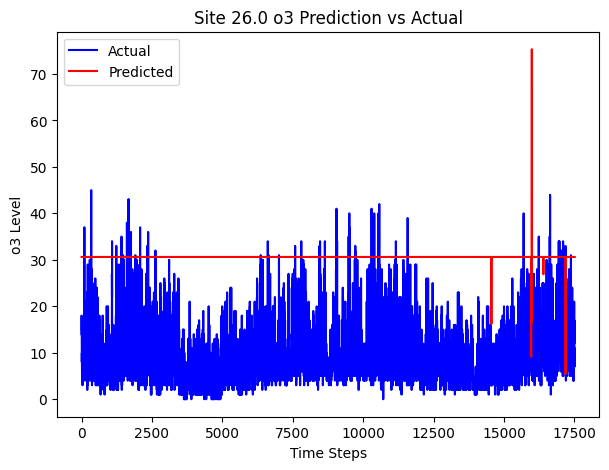

Site 27.0 o3 MSE: 239.89950017030506


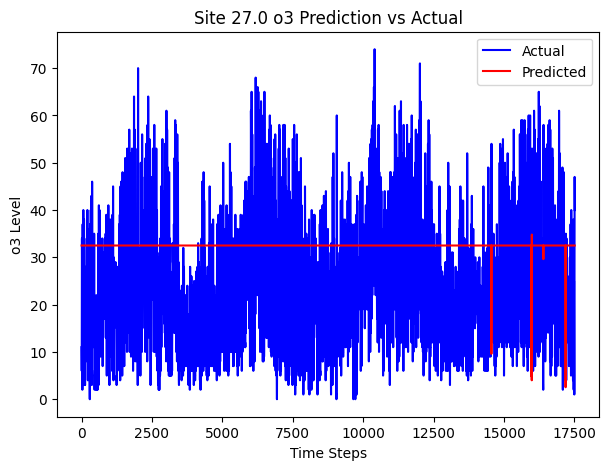

Site 28.0 o3 MSE: 449.6444596164202


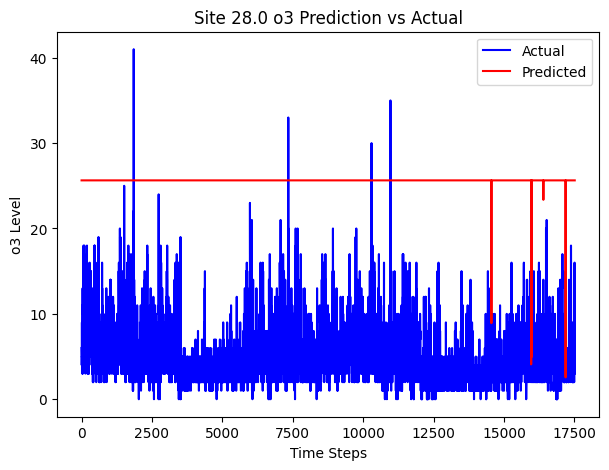

Site 29.0 o3 MSE: 167.2635864772037


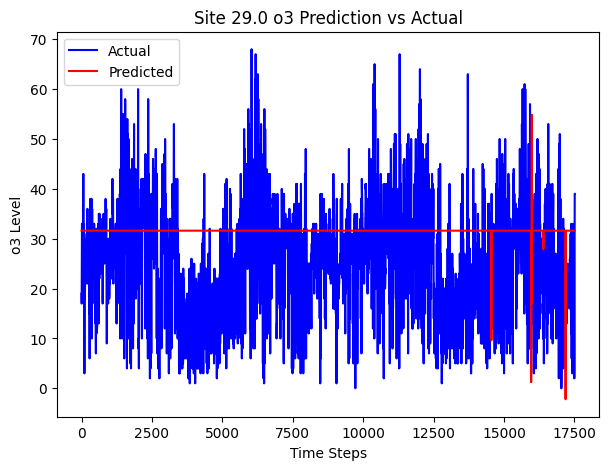

Site 30.0 o3 MSE: 623.240417397355


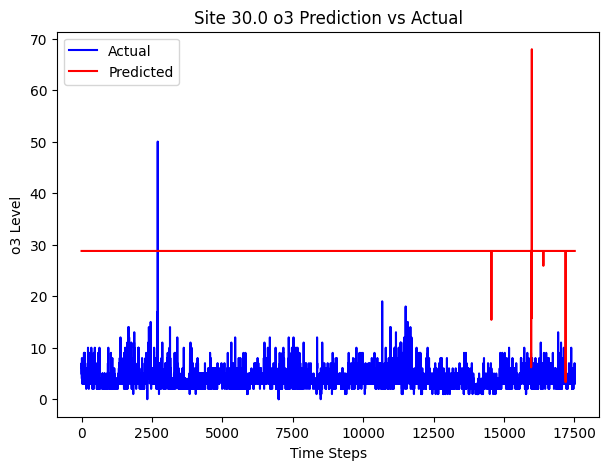

Site 31.0 o3 MSE: 354.27225464903756


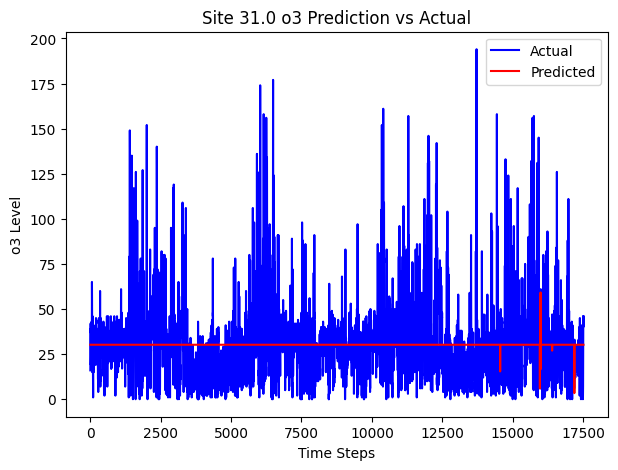

Site 32.0 o3 MSE: 776.5169568171136


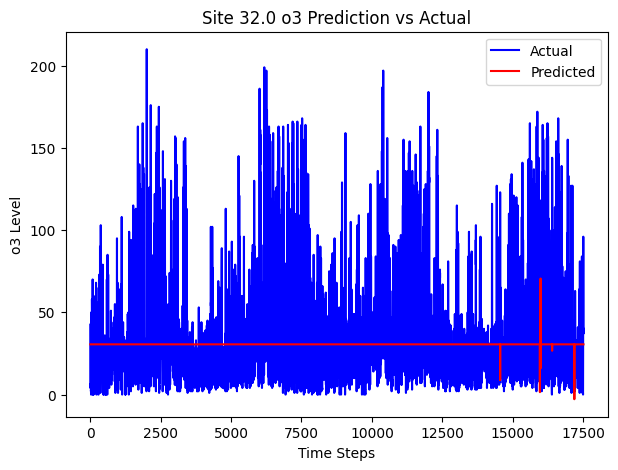

Site 33.0 o3 MSE: 439.3024568381083


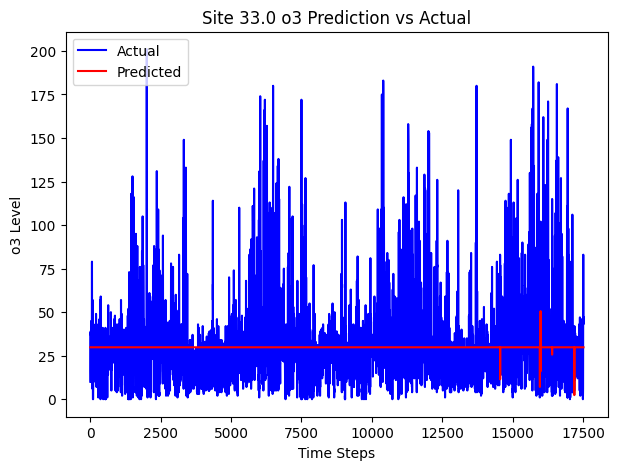

Site 34.0 o3 MSE: 771.4463670698982


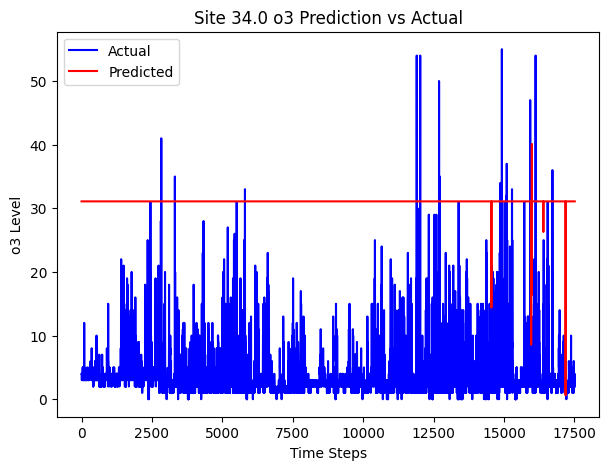

Site 35.0 o3 MSE: 439.8600457183377


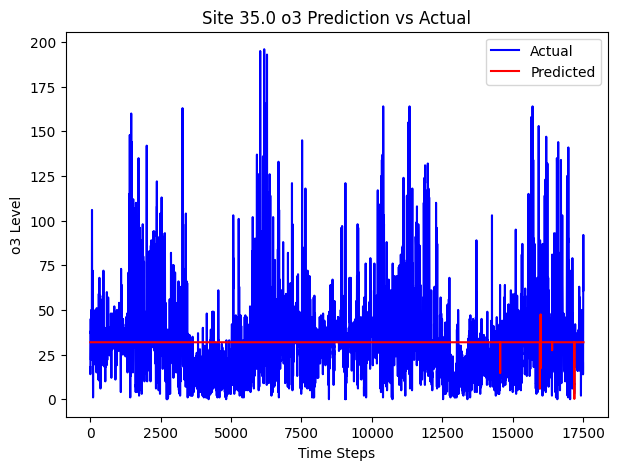

Site 36.0 o3 MSE: 658.0916827998674


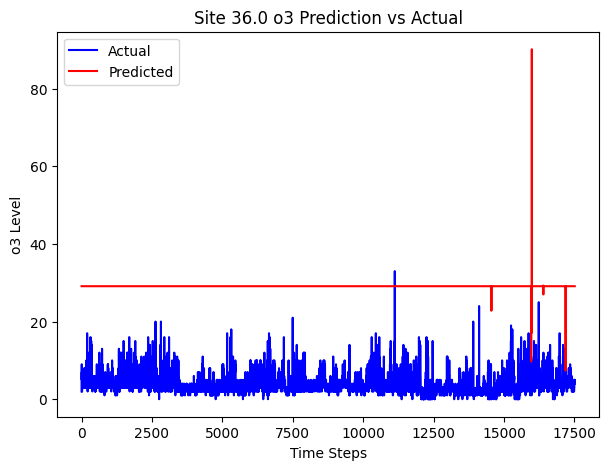

Site 37.0 o3 MSE: 201.72529635780805


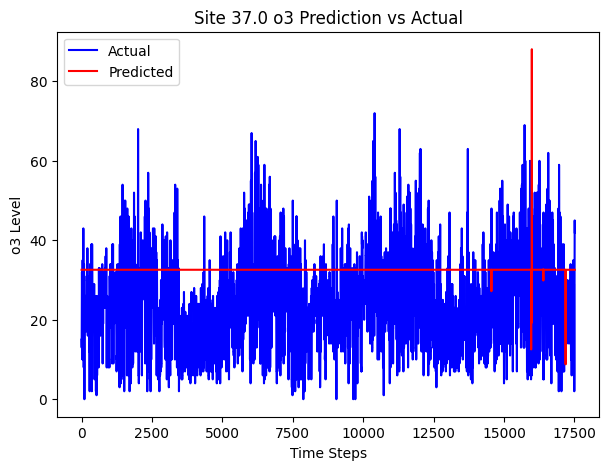

Site 38.0 o3 MSE: 142.13522817457928


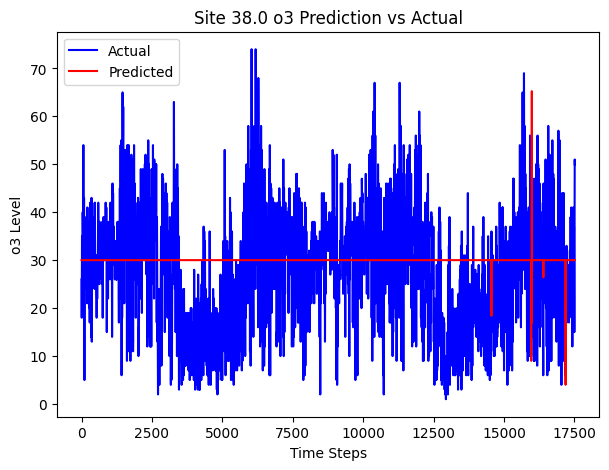

Site 41.0 o3 MSE: 420.2034998871146


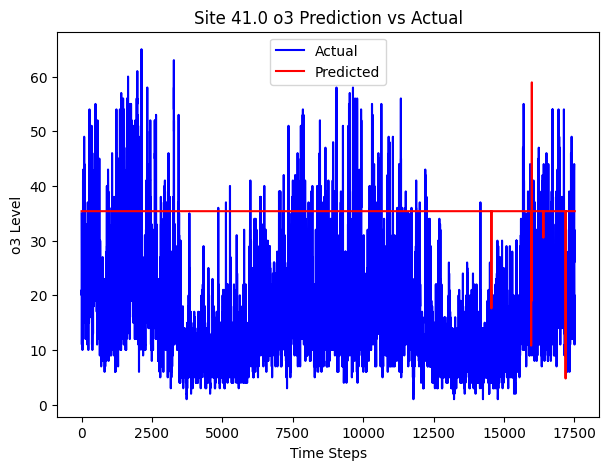

Site 69.0 o3 MSE: 439.6458873073106


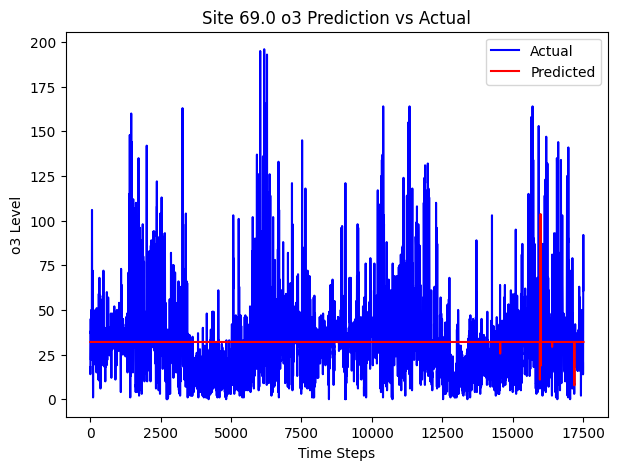

Site 72.0 o3 MSE: 784.2727567414812


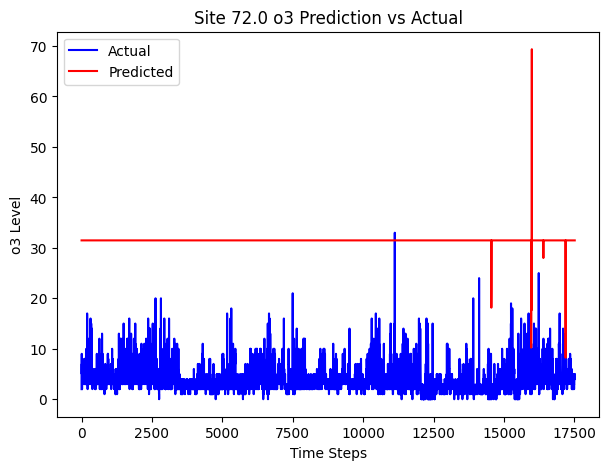

Site 83.0 o3 MSE: 546.8286172586634


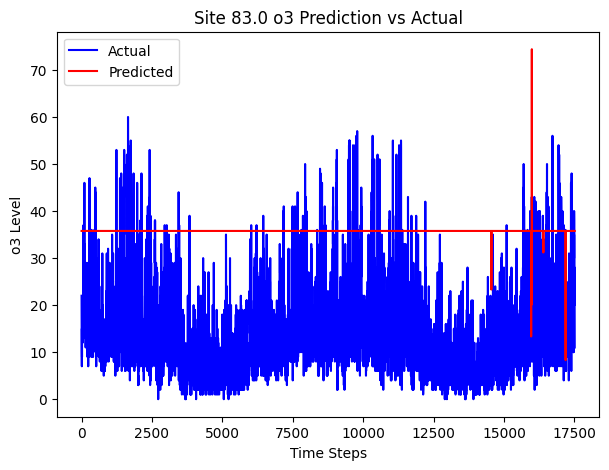

Site 25.0 so2 MSE: 9.95043605793131


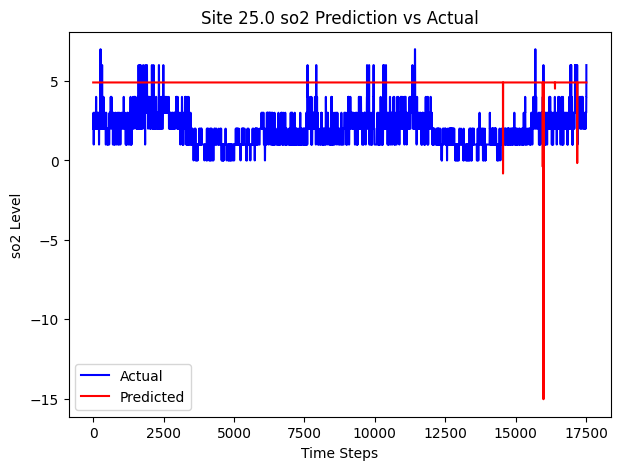

Site 26.0 so2 MSE: 69.48252338323621


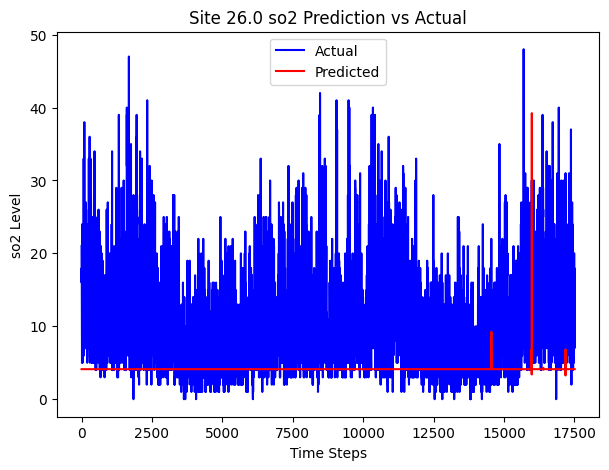

Site 27.0 so2 MSE: 625.8703310764604


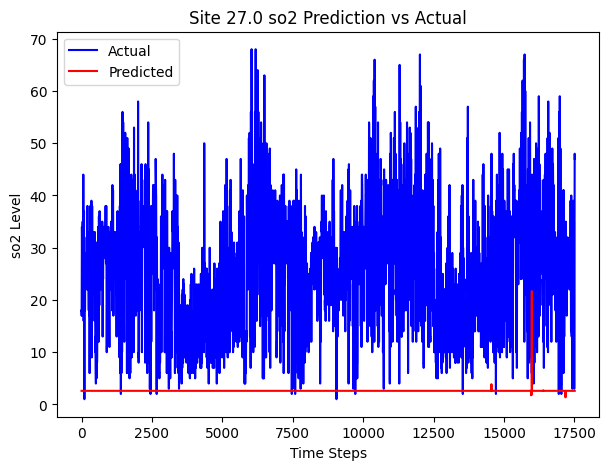

Site 28.0 so2 MSE: 3.989997245276099


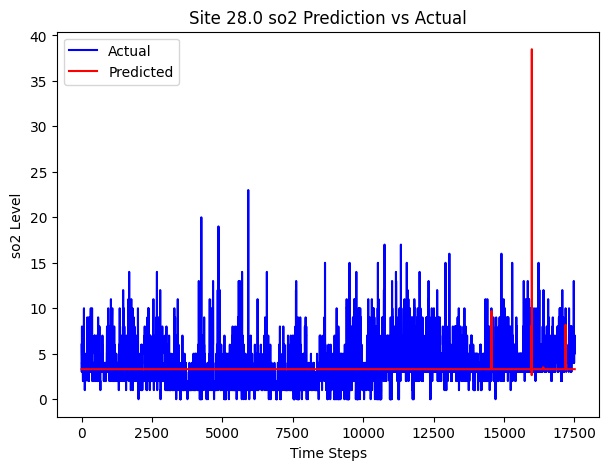

Site 29.0 so2 MSE: 434.11269935915783


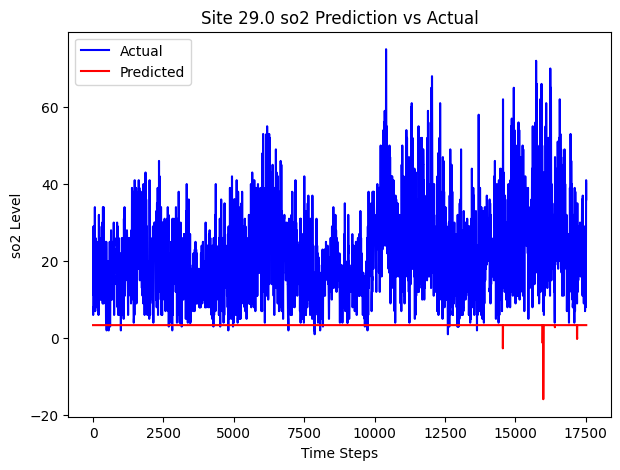

Site 30.0 so2 MSE: 5.960160945817089


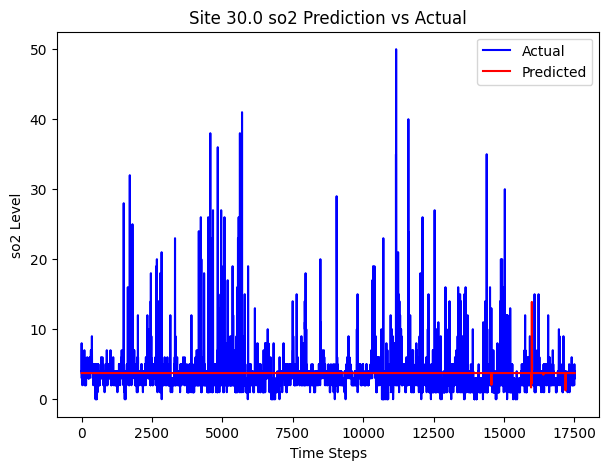

Site 31.0 so2 MSE: 900.9902718025642


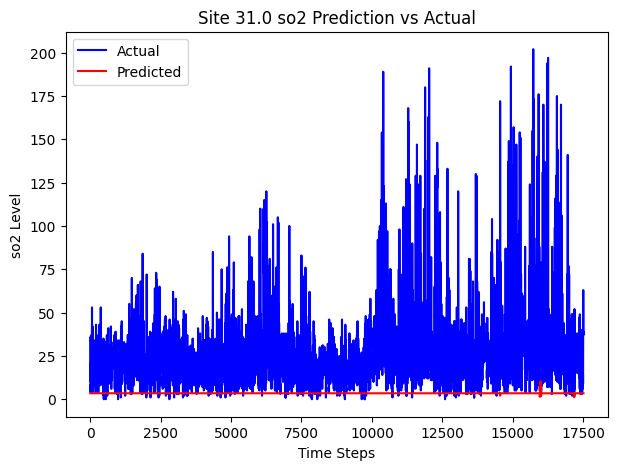

Site 32.0 so2 MSE: 1163.8286980257242


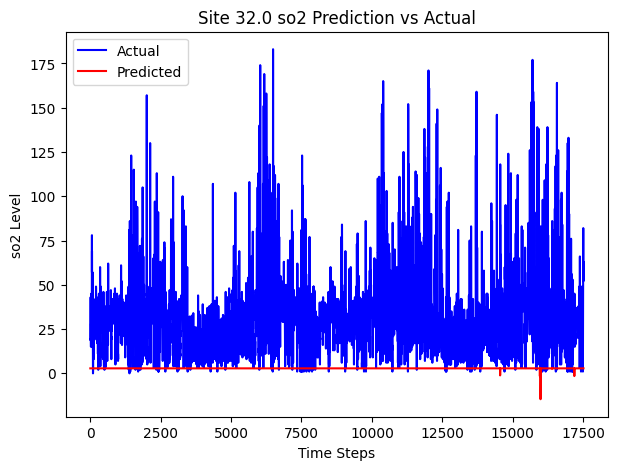

Site 33.0 so2 MSE: 1154.3371900080153


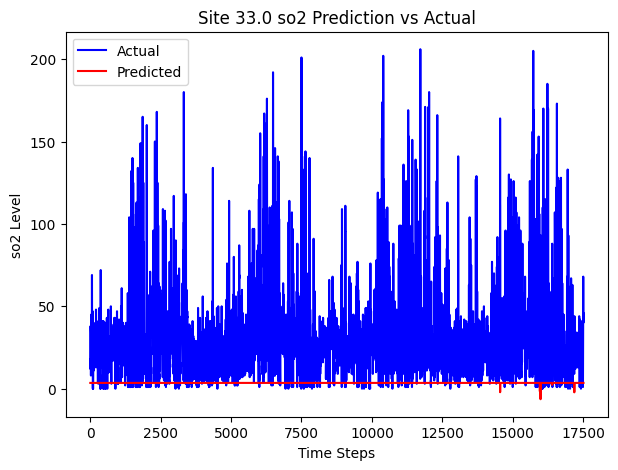

Site 34.0 so2 MSE: 6.4023410561068905


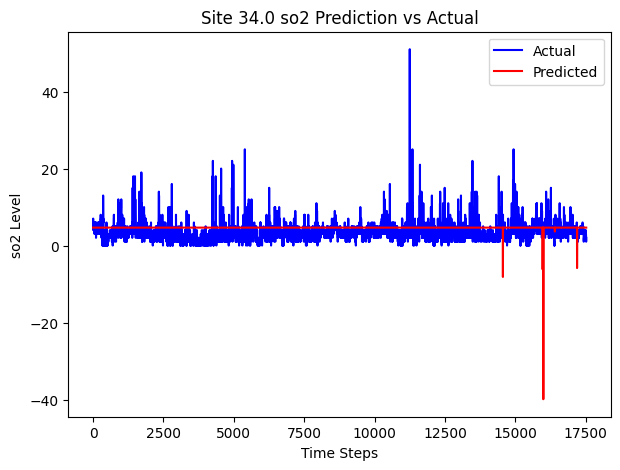

Site 35.0 so2 MSE: 1360.1117498546798


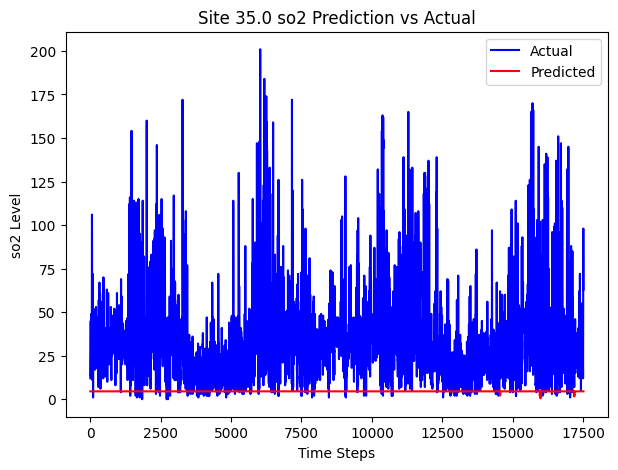

Site 36.0 so2 MSE: 4.7263683396829315


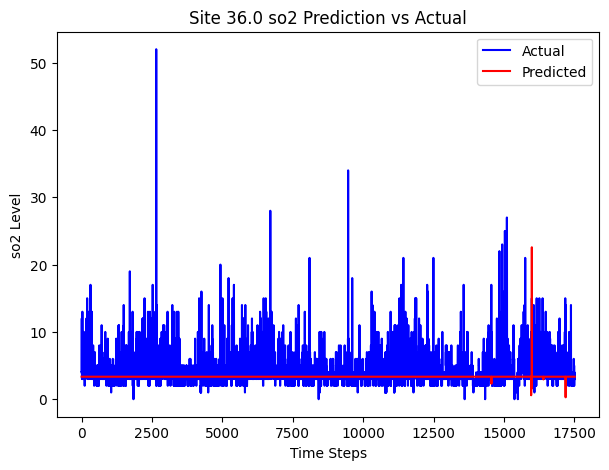

Site 37.0 so2 MSE: 502.2823161352012


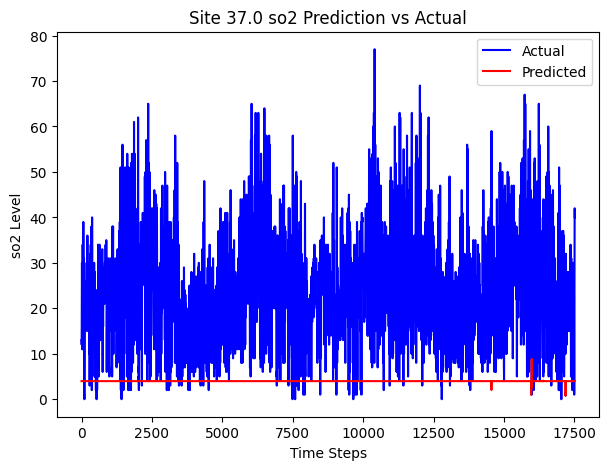

Site 38.0 so2 MSE: 711.7829137516951


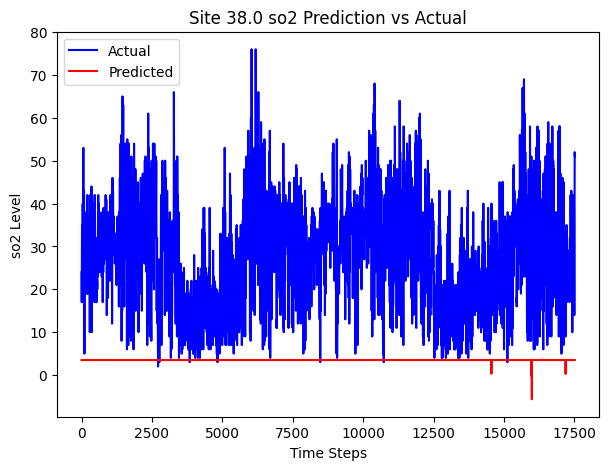

Site 41.0 so2 MSE: 412.1291681923635


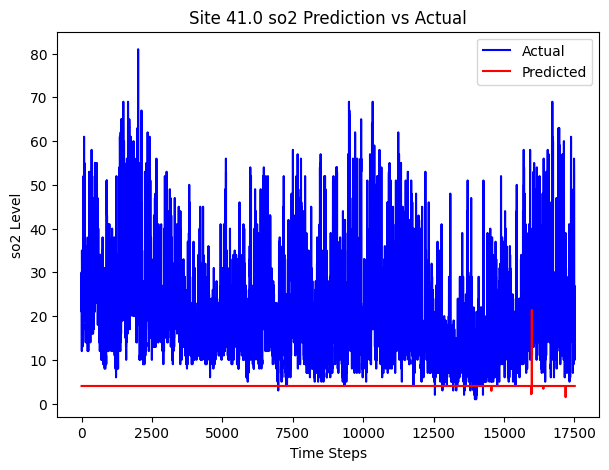

Site 69.0 so2 MSE: 1464.385641762863


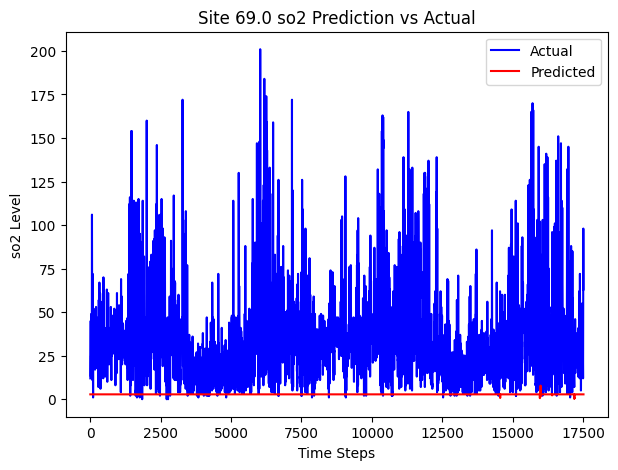

Site 72.0 so2 MSE: 5.657389316347783


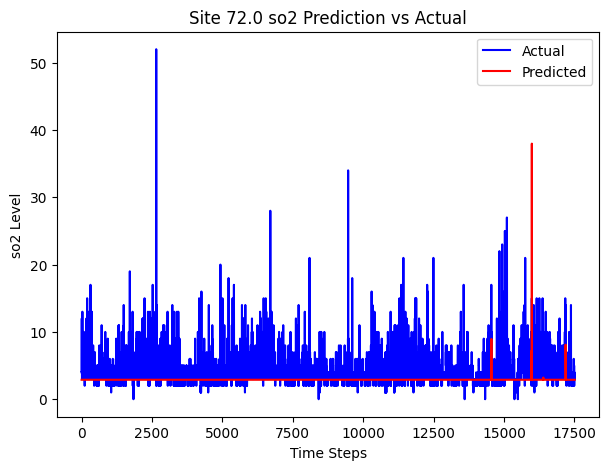

Site 83.0 so2 MSE: 85.82558969155357


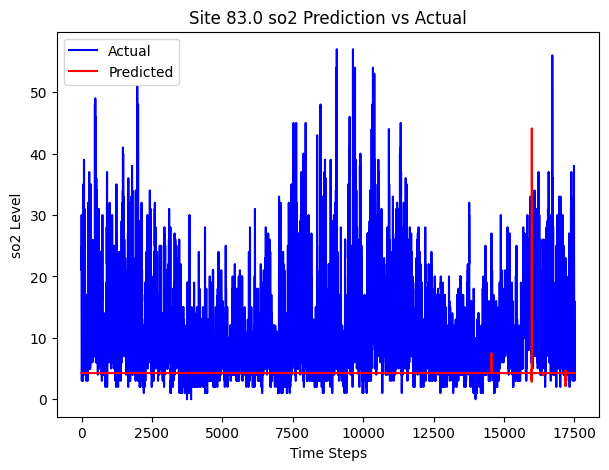

Site 25.0 o3_8hr MSE: 547.8901070886595


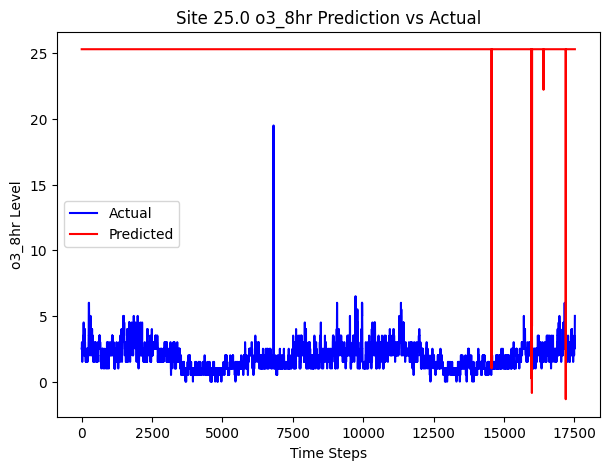

Site 26.0 o3_8hr MSE: 205.3369998732618


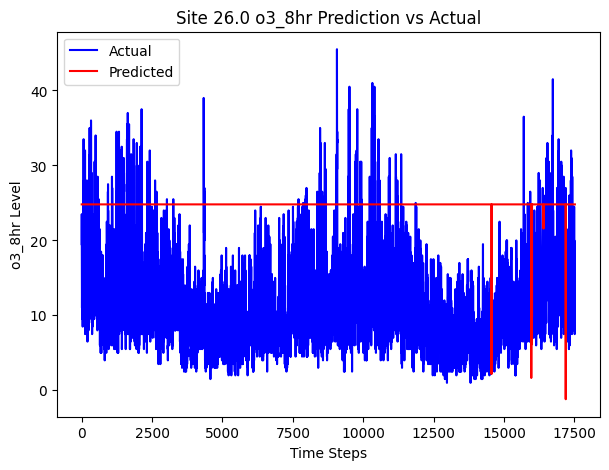

Site 27.0 o3_8hr MSE: 117.1396518288091


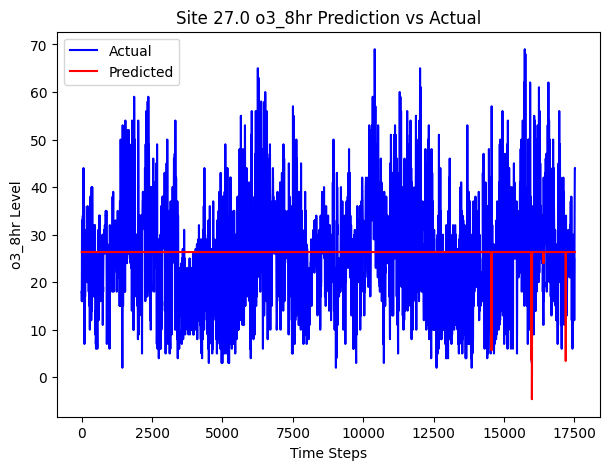

Site 28.0 o3_8hr MSE: 309.8273279616253


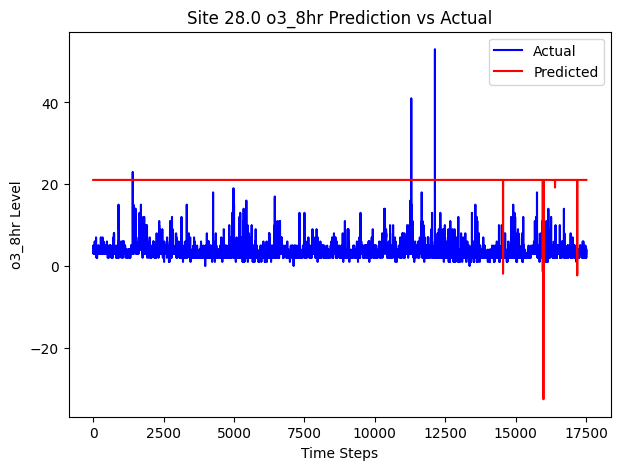

Site 29.0 o3_8hr MSE: 167.68609431942076


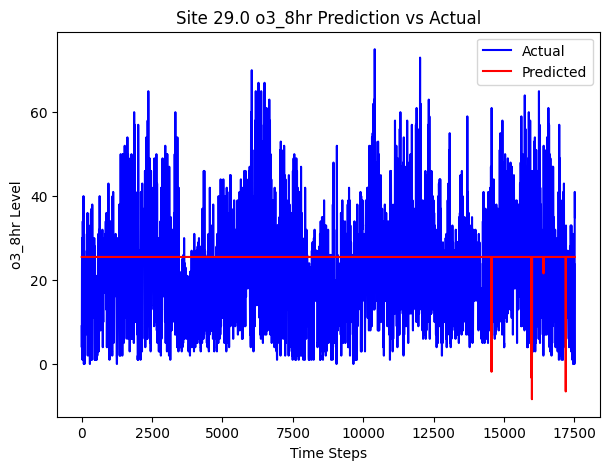

Site 30.0 o3_8hr MSE: 384.8568642514765


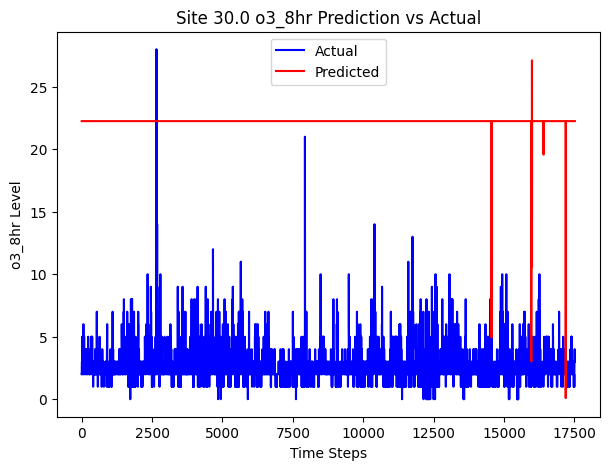

Site 31.0 o3_8hr MSE: 659.6312911752234


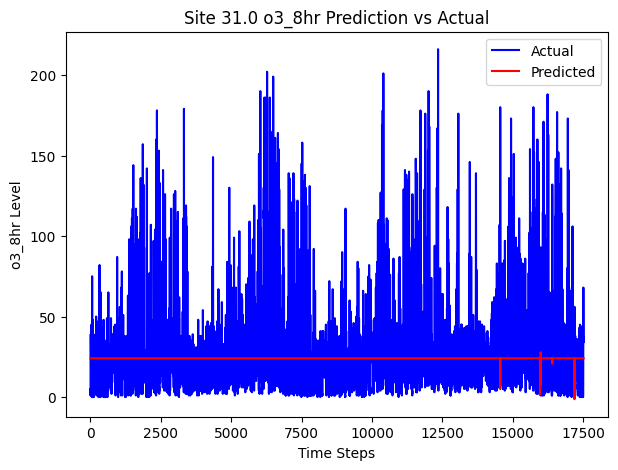

Site 32.0 o3_8hr MSE: 462.0957729854287


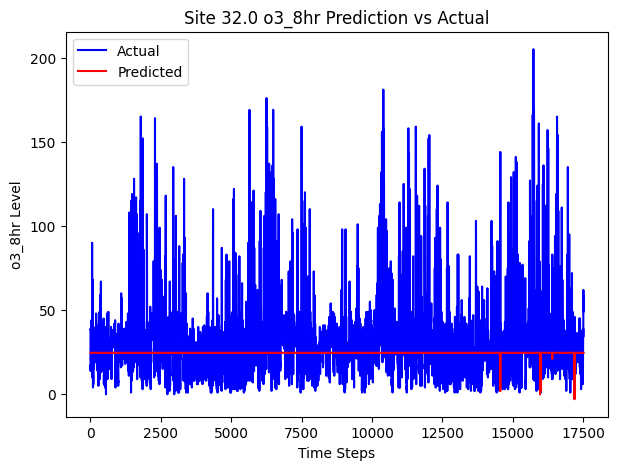

Site 33.0 o3_8hr MSE: 507.59264210550447


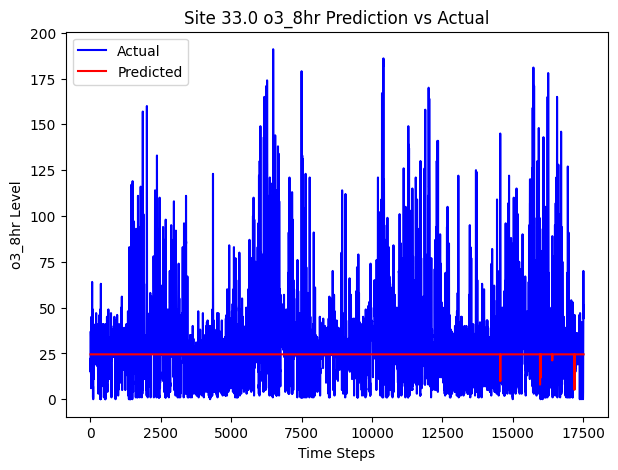

Site 34.0 o3_8hr MSE: 532.8302436240969


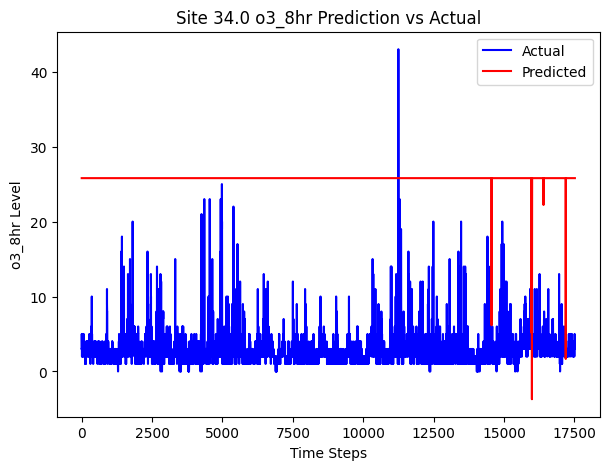

Site 35.0 o3_8hr MSE: 407.730864518457


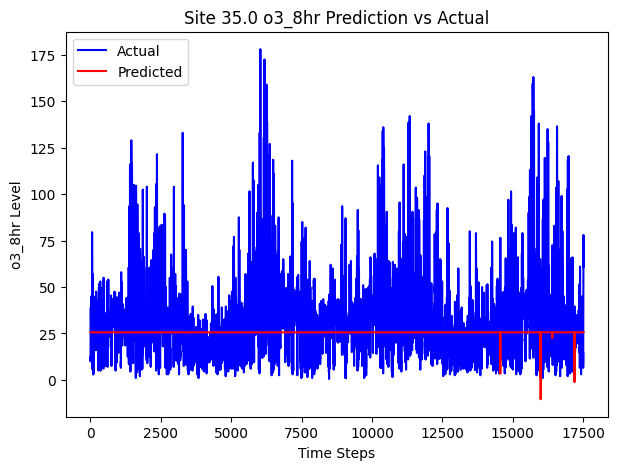

Site 36.0 o3_8hr MSE: 331.01111355468674


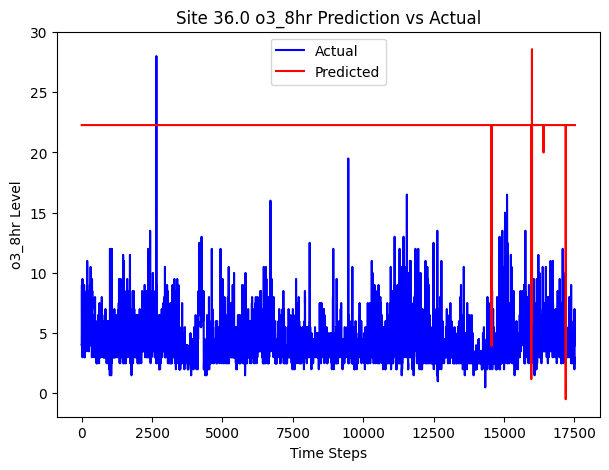

Site 37.0 o3_8hr MSE: 141.43513423702473


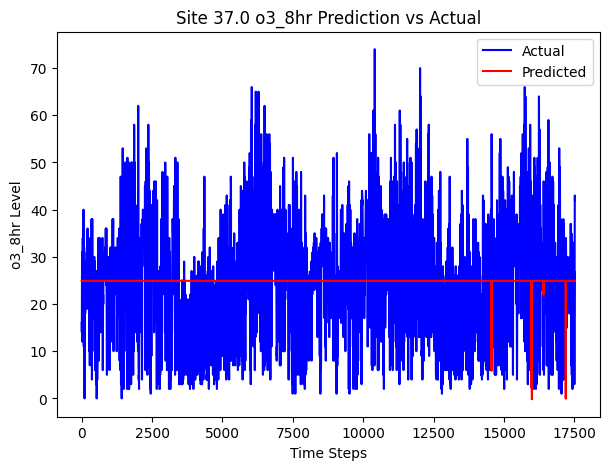

Site 38.0 o3_8hr MSE: 116.63033599923837


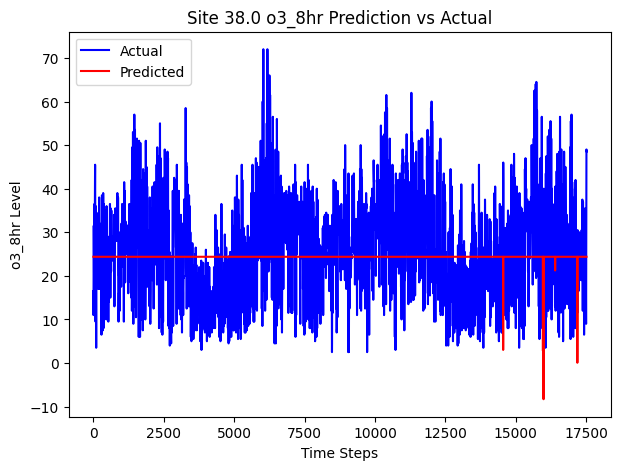

Site 41.0 o3_8hr MSE: 232.85710044510424


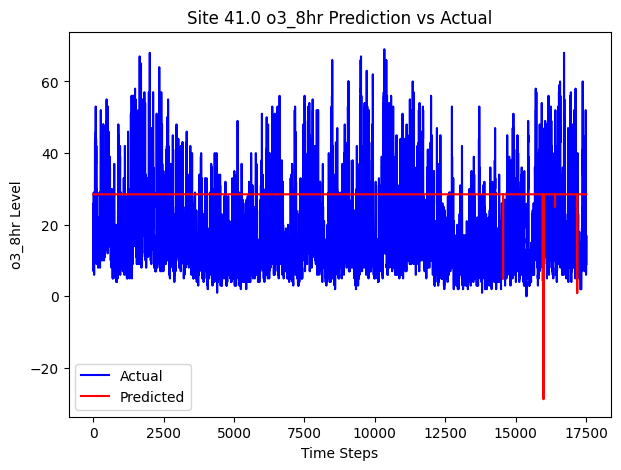

Site 69.0 o3_8hr MSE: 438.4439569004851


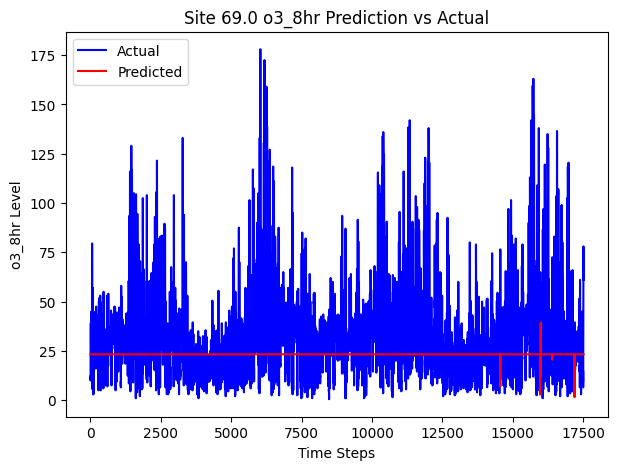

Site 72.0 o3_8hr MSE: 383.1148759588865


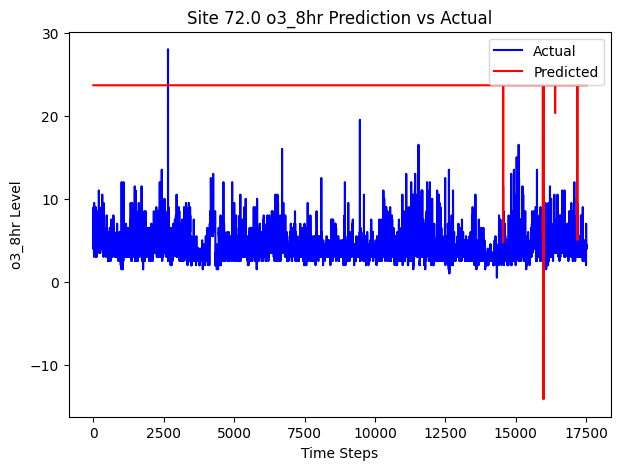

Site 83.0 o3_8hr MSE: 197.5465321837897


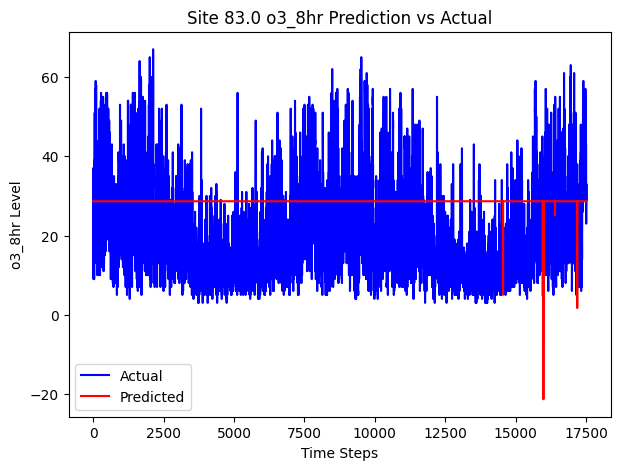

Site 25.0 no2 MSE: 161.95280530840236


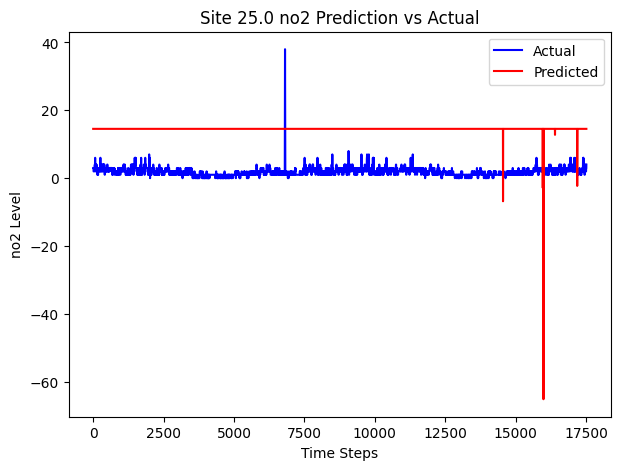

Site 26.0 no2 MSE: 63.08608021857058


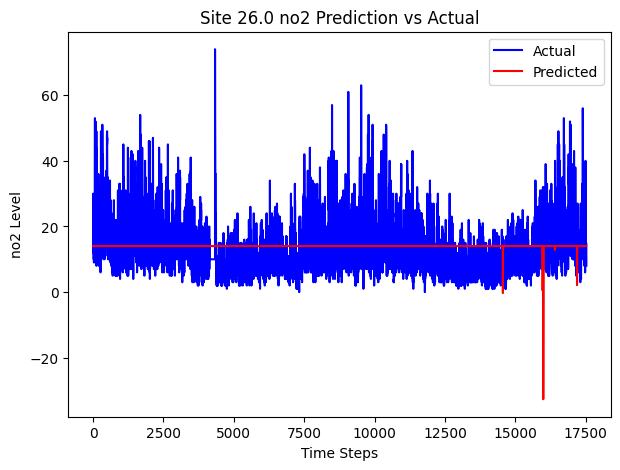

Site 27.0 no2 MSE: 331.63759953031916


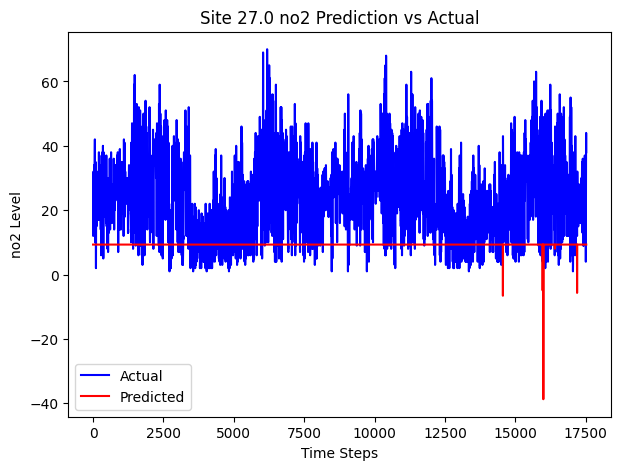

Site 28.0 no2 MSE: 73.50099354676864


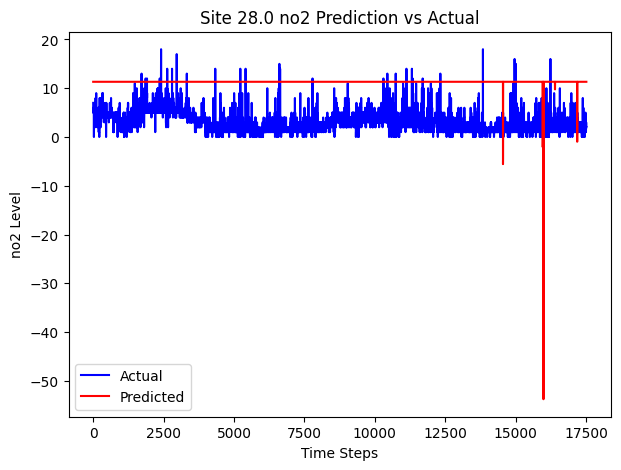

Site 29.0 no2 MSE: 204.42020392431434


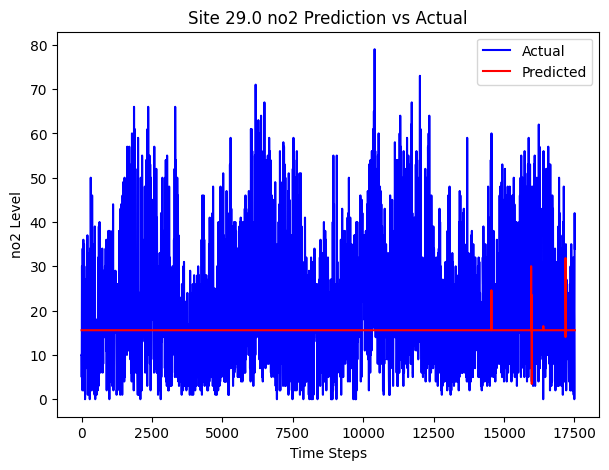

Site 30.0 no2 MSE: 287.74386475298945


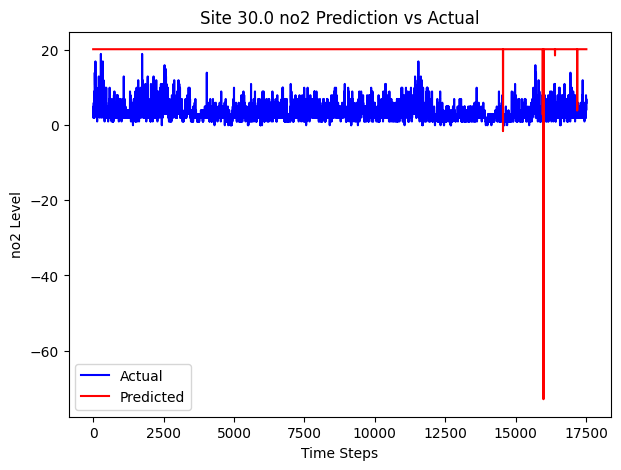

Site 31.0 no2 MSE: 812.9986186296626


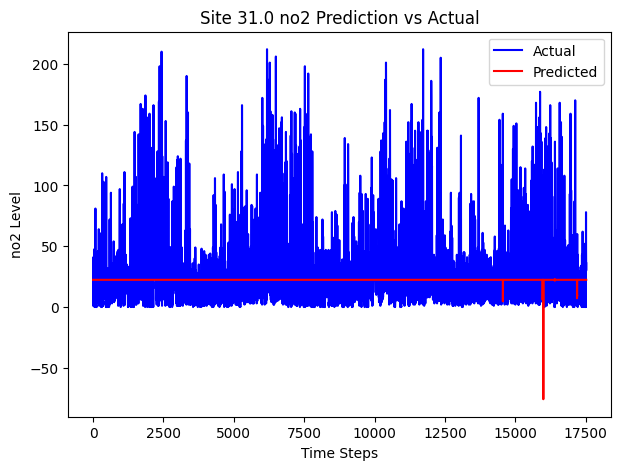

Site 32.0 no2 MSE: 522.4593265370812


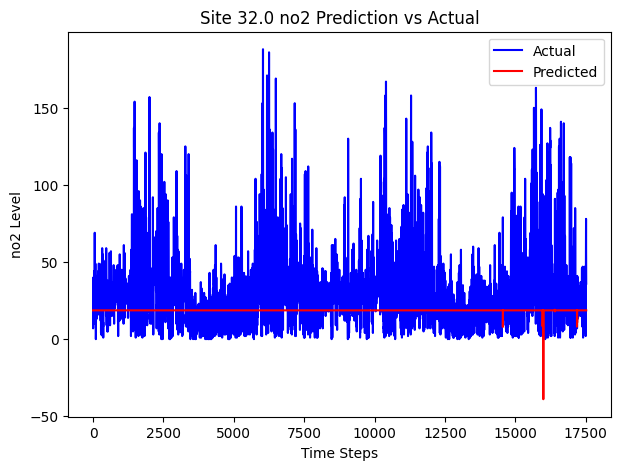

Site 33.0 no2 MSE: 612.107570329309


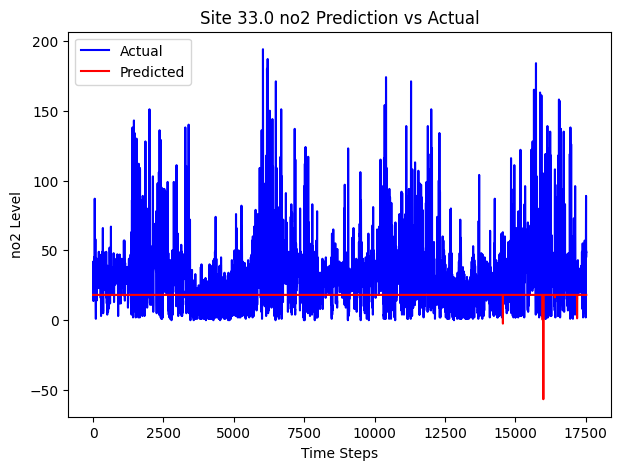

Site 34.0 no2 MSE: 110.99566127606073


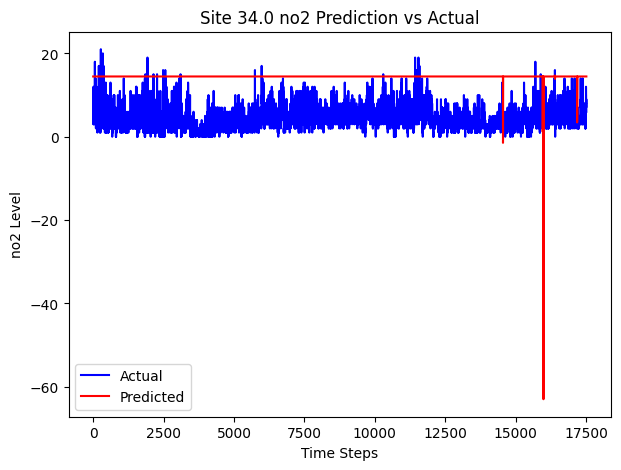

Site 35.0 no2 MSE: 662.1893693720157


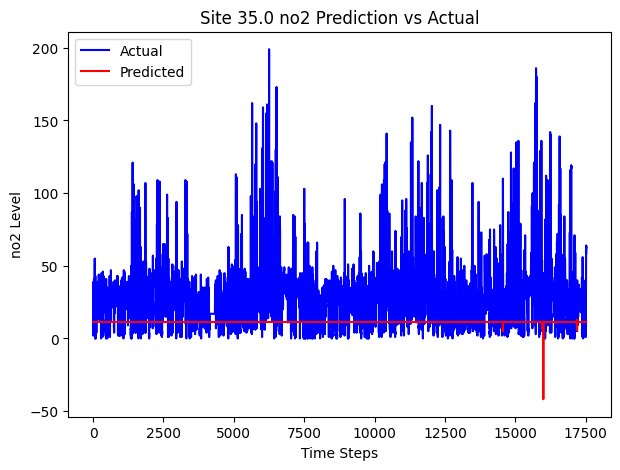

Site 36.0 no2 MSE: 160.77171139760694


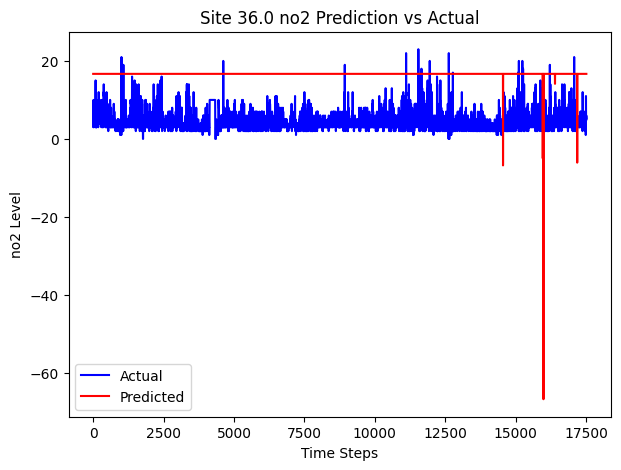

Site 37.0 no2 MSE: 271.41544397681315


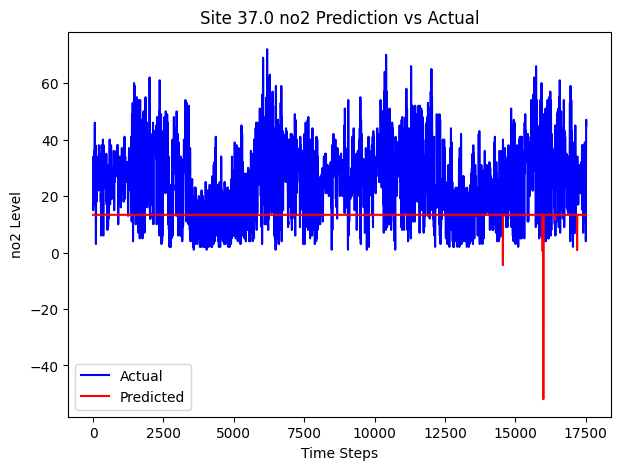

Site 38.0 no2 MSE: 288.8502535029651


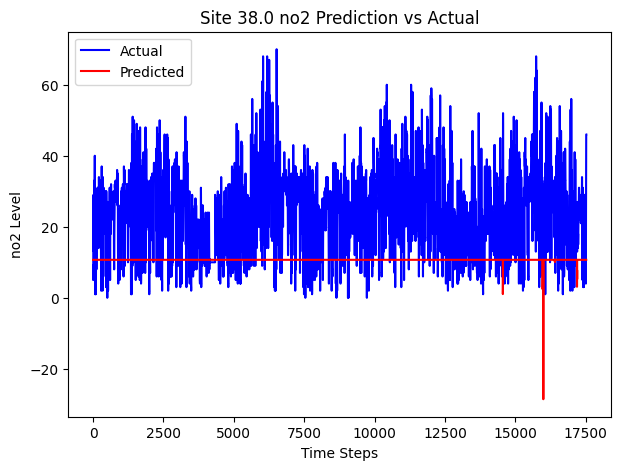

Site 41.0 no2 MSE: 46.79687764347787


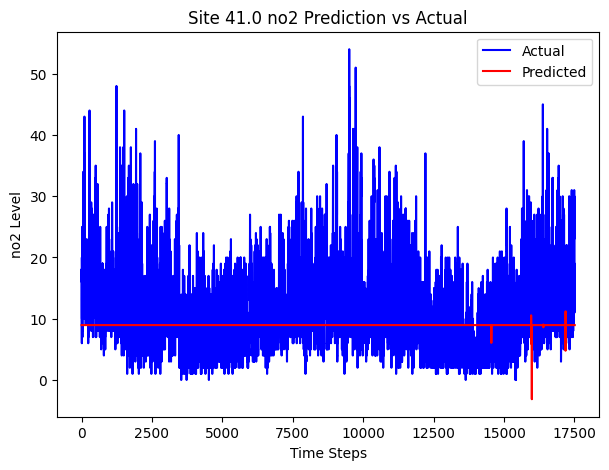

Site 69.0 no2 MSE: 633.1988038819021


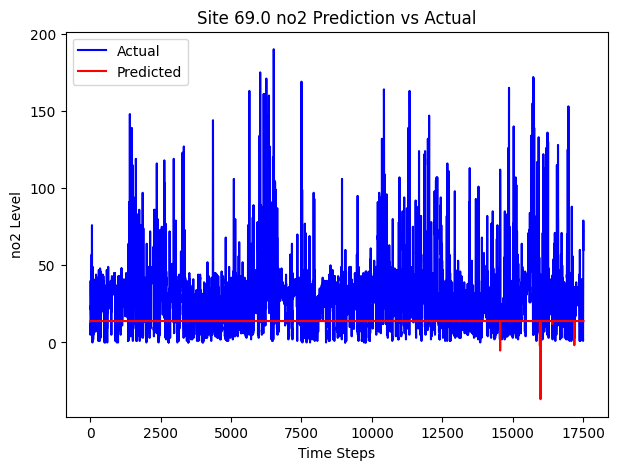

Site 72.0 no2 MSE: 104.15831254044562


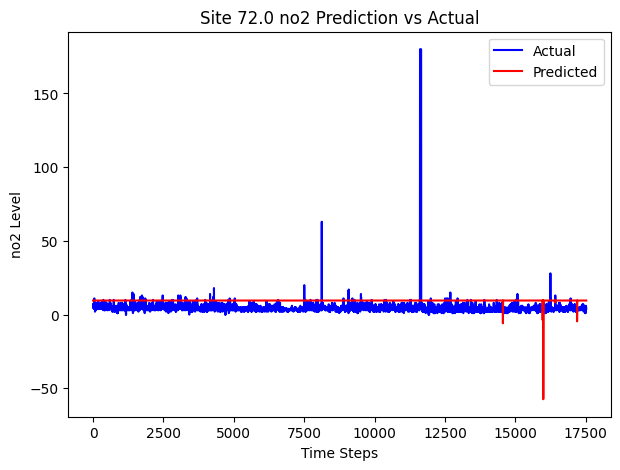

Site 83.0 no2 MSE: 126.25618241788139


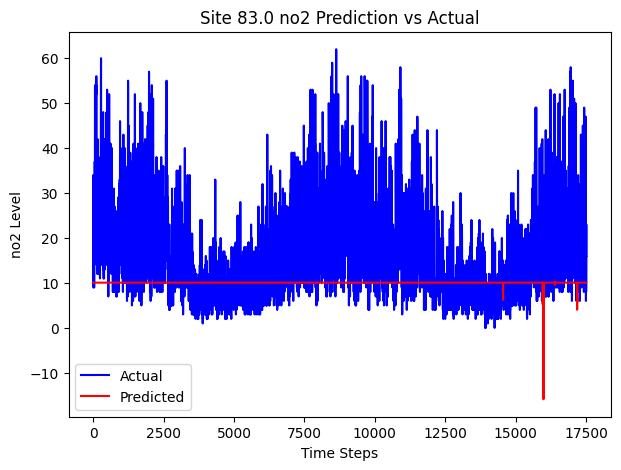

Site 25.0 co_8hr MSE: 1.6052850942110821


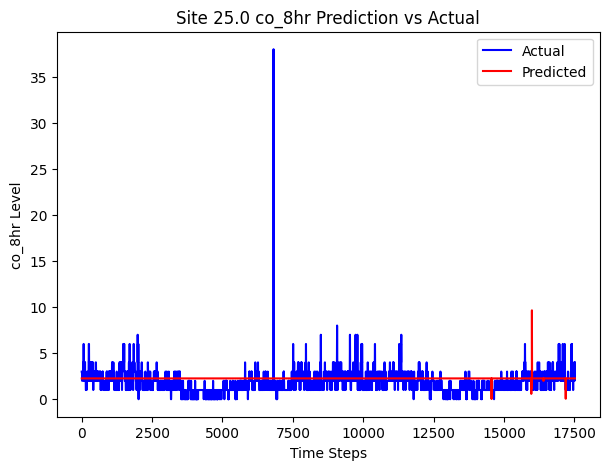

Site 26.0 co_8hr MSE: 189.4699290808519


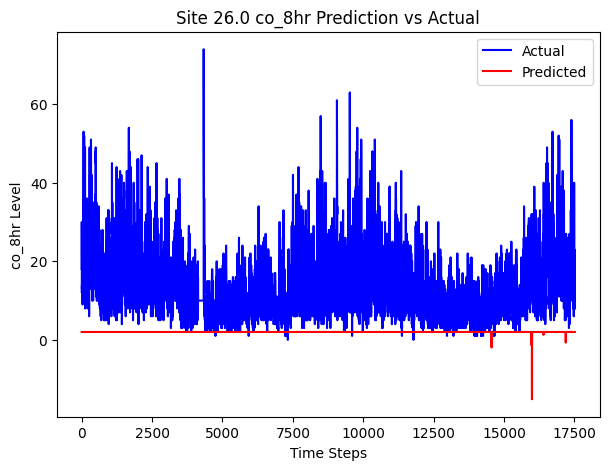

Site 27.0 co_8hr MSE: 599.4108584537995


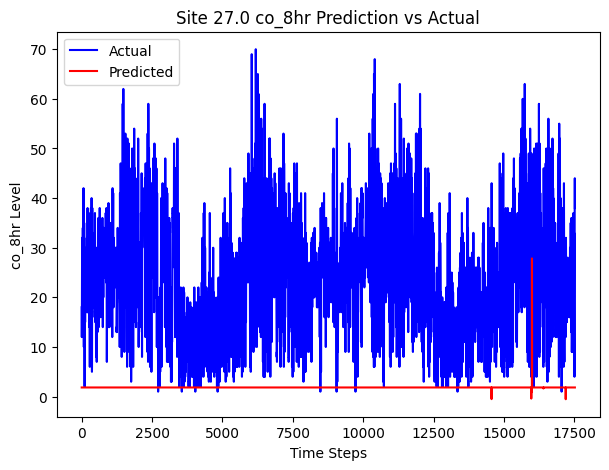

Site 28.0 co_8hr MSE: 1.2472724843499072


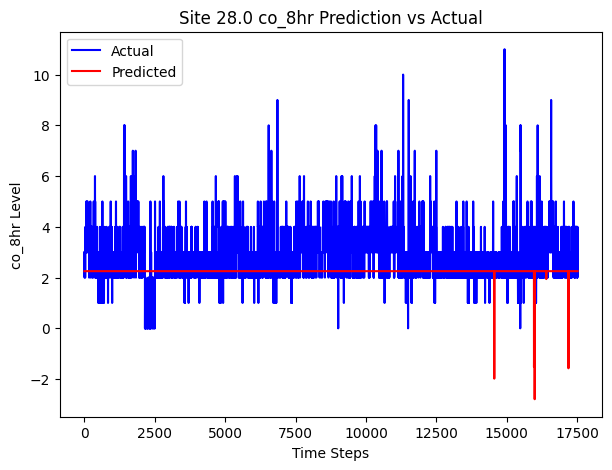

Site 29.0 co_8hr MSE: 577.6913492419498


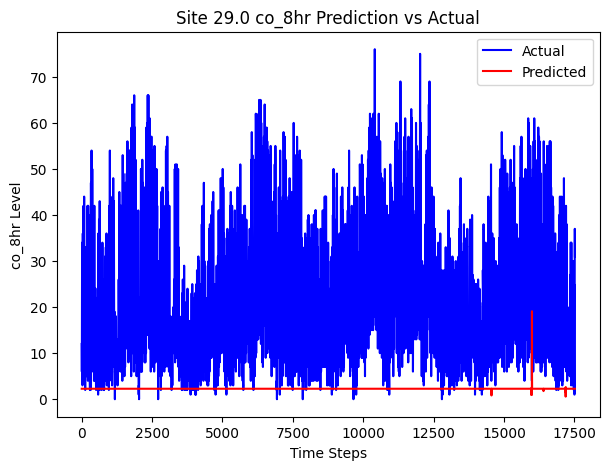

Site 30.0 co_8hr MSE: 3.7348375212220093


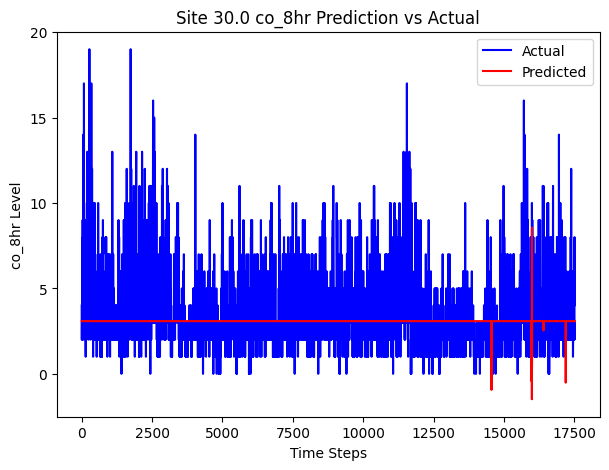

Site 31.0 co_8hr MSE: 1506.2721722041135


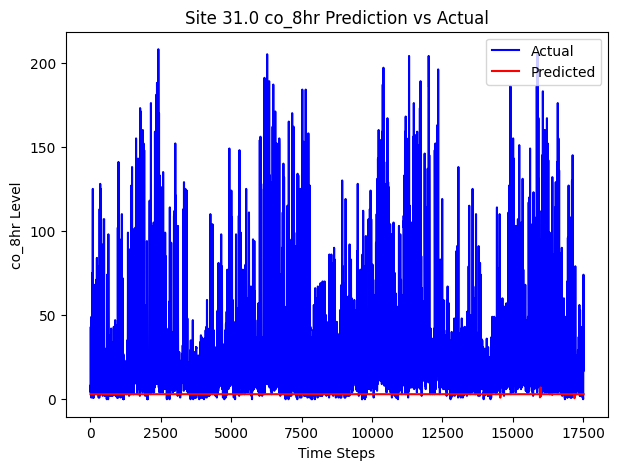

Site 32.0 co_8hr MSE: 1114.2067588117864


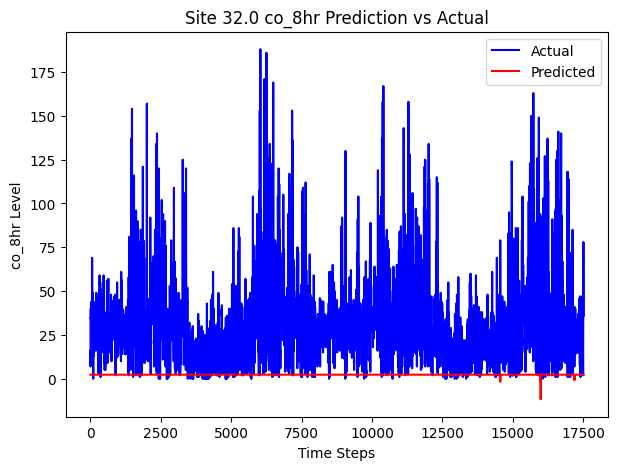

Site 33.0 co_8hr MSE: 1718.4704742045378


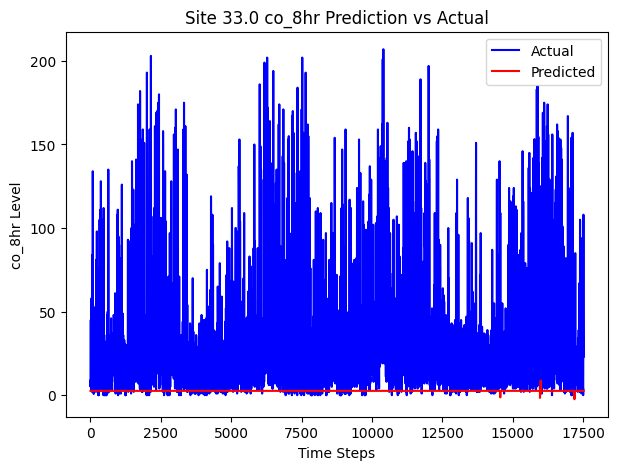

Site 34.0 co_8hr MSE: 2.783674600731415


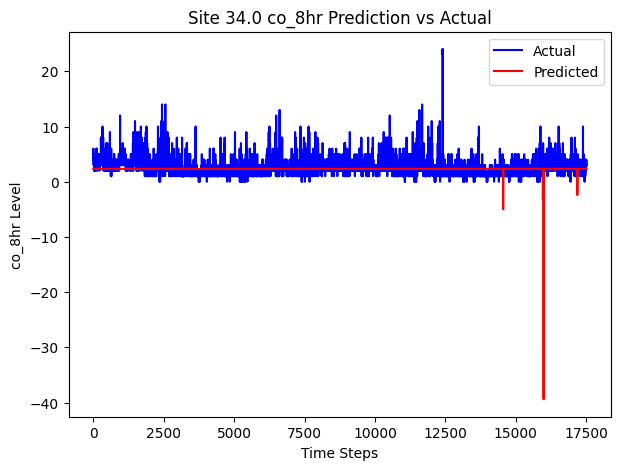

Site 35.0 co_8hr MSE: 1047.5572762376737


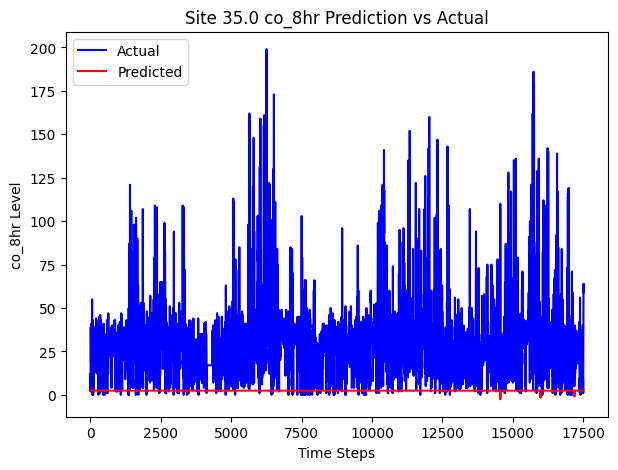

Site 36.0 co_8hr MSE: 6.104113286799695


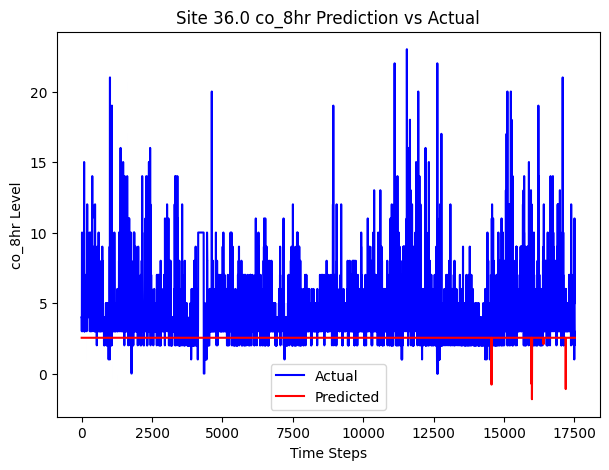

Site 37.0 co_8hr MSE: 579.3274344559275


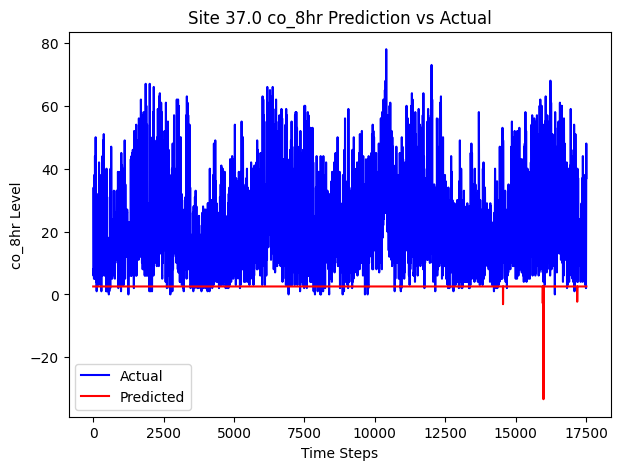

Site 38.0 co_8hr MSE: 572.2832712066668


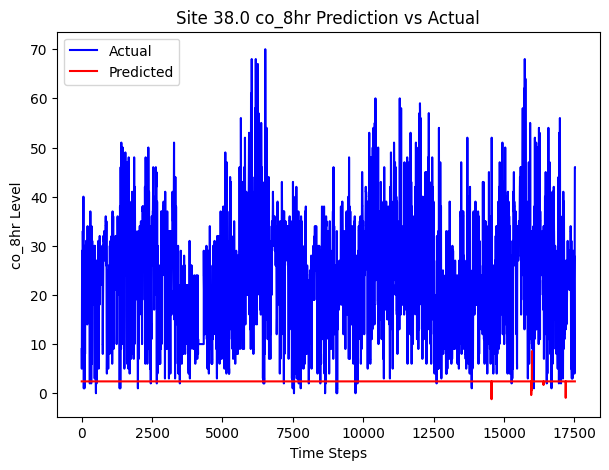

Site 41.0 co_8hr MSE: 198.83112823427825


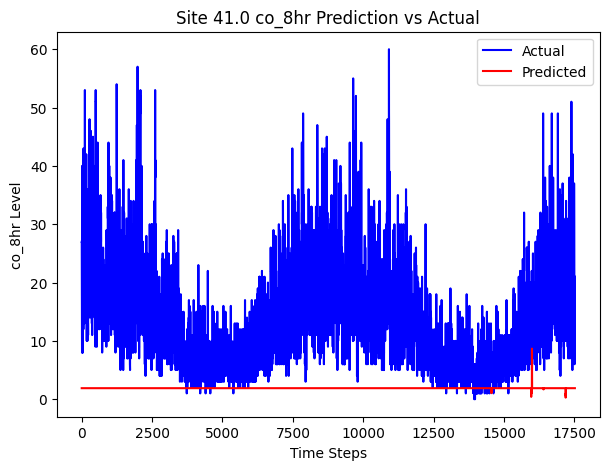

Site 69.0 co_8hr MSE: 1128.9772037025143


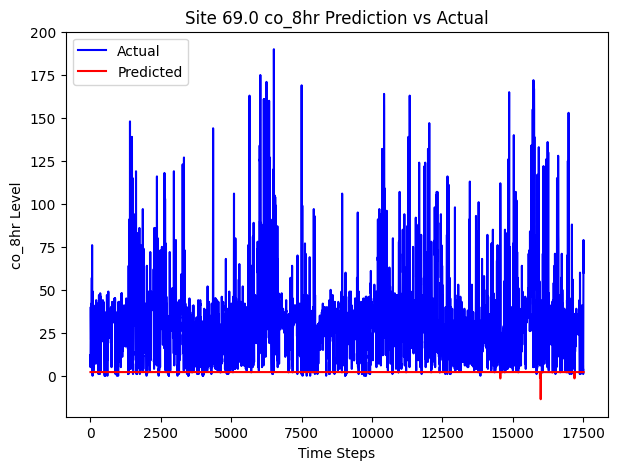

Site 72.0 co_8hr MSE: 83.53638966228583


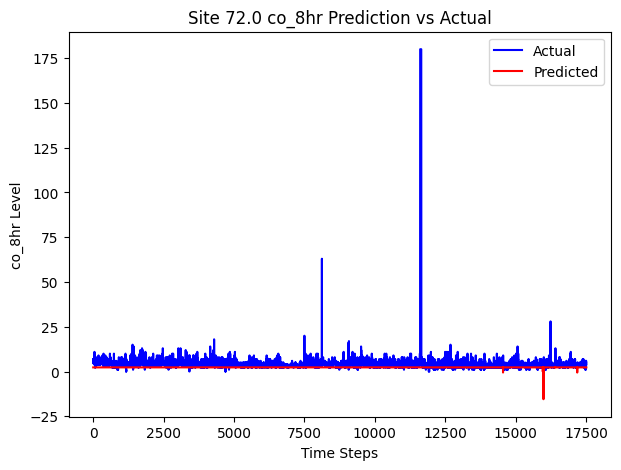

Site 83.0 co_8hr MSE: 84.58044250030142


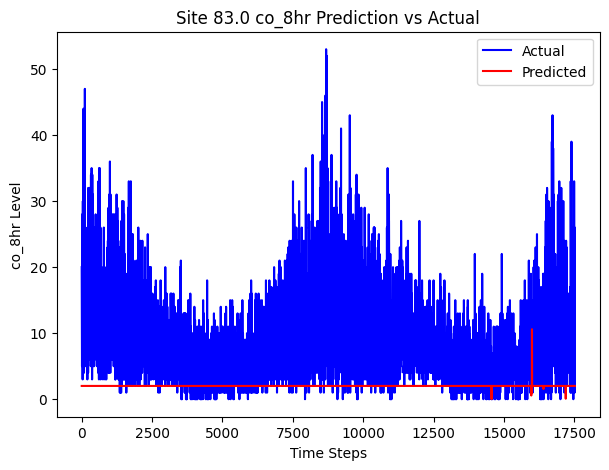

IndexError at Site 25.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 26.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 27.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 28.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 29.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 30.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 31.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 32.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 33.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 34.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 35.0 for pm2.5_avg: index 5 is out of bounds for axis 4 with size 5
IndexError at Site 36.0 for pm2.5_avg: inde

In [7]:
# Calculate MSE for each station and visualize
mse_results = {pollutant: [] for pollutant in pollutants}

# Iterate over pollutants and specified site positions
for pollutant_idx, pollutant in enumerate(pollutants):
    for site_id, (row_idx, col_idx) in site_positions.items():
        try:
            actual = y[:, 0, row_idx, col_idx, pollutant_idx]
            predicted = predictions[:, 0, row_idx, col_idx, pollutant_idx]
            mse = mean_squared_error(actual, predicted)
            mse_results[pollutant].append(mse)
            print(f"Site {site_id} {pollutant} MSE: {mse}")

            # Visualization in one plot
            plt.figure(figsize=(7, 5))
            plt.plot(actual, label='Actual', color='blue')
            plt.plot(predicted, label='Predicted', color='red')
            plt.xlabel('Time Steps')
            plt.ylabel(f'{pollutant} Level')
            plt.title(f'Site {site_id} {pollutant} Prediction vs Actual')
            plt.legend()
            plt.show()

        except IndexError as e:
            print(f"IndexError at Site {site_id} for {pollutant}: {e}")

# Unified format to display MSE for all sites
for pollutant, mse_list in mse_results.items():
    print(f"\nMSE for {pollutant}:")
    for site_id, mse in zip(site_positions.keys(), mse_list):
        print(f"Site {site_id}: {mse}")

In [8]:
# 計算並顯示每種污染物的總體 MSE
overall_mse = {pollutant: np.mean(mse_list) for pollutant, mse_list in mse_results.items()}

for pollutant, mse in overall_mse.items():
    print(f"Overall MSE for {pollutant}: {mse}")

Overall MSE for o3: 491.08183026628143
Overall MSE for so2: 495.656988111371
Overall MSE for o3_8hr: 341.3142727228433
Overall MSE for no2: 304.1410932659214
Overall MSE for co_8hr: 523.1161039435555
Overall MSE for pm2.5_avg: nan
Overall MSE for pm10_avg: nan


/opt/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
